# Zebrafish Swimming Models SENSITIVITY TESTING (Figures 9 - 10)


## Sensitivity testing

This block can let you simulate at single combination of sigmaD, sigmaL, sigmaP and sigmaW. Don't forget to change the name of the output files.

In [ ]:

import pandas as pd
#from Beat_and_glide_with_sigmas import * # for sensitivity testing where the parameters of single neurons does not have to be printed
from Beat_and_glide_with_sigmas_output_parametersP import * # for sensitivity testing where the parameters of single neurons have to be printed
from datetime import datetime

# Declare duration of simulation and discretization time
TIME_END = 10000 # 10000 
DT = 0.1

for p in range(0,10):
    %matplotlib inline
    
    ((VLMN, VRMN), (VLdI6, VRdI6), (VLV0v, VRV0v), (VLV2a, VRV2a), (VLV1, VRV1),(VLMuscle, VRMuscle), Time, (L_MN, R_MN), (L_dI6, R_dI6), (L_V0v, R_V0v), (L_V2a, R_V2a), (L_V1, R_V1))=  connectome_beat_glide(rand=datetime.now(), 
                    stim0=2.89, sigma_LR = 0.1, sigmaD=0.0, sigmaL = 0.0, sigmaP = 0.03, sigmaW = 0.0, tmax=TIME_END, dt=DT, E_glu=0, E_gly=-70, cv=0.80, 
                    nMN=15, ndI6=15, nV0v=15, nV2a=15, nV1=15, nMuscle=15, R_str=1.0) 
    
    cell_names = ['MN', 'dI6','V0v', 'V2a', 'V1', 'Muscle']

    nMN = len(VLMN[:,0])
    ndI6 = len(VLdI6[:,0])
    nV0v = len(VLV0v[:,0])
    nV2a = len(VLV2a[:,0])
    nV1 = len(VLV1[:,0])
    nMuscle = len(VLMuscle[:,0])
    num_cells = [nMN, ndI6, nV0v, nV2a, nV1, nMuscle]

    Vdata_list =[VLMN, VRMN, VLdI6, VRdI6, VLV0v, VRV0v, VLV2a, VRV2a, VLV1, VRV1, VLMuscle, VRMuscle]

    Sim_data = pd.DataFrame(index=Time)

    for i in range(0, len(cell_names)):
        for j in range(0, num_cells[i]):
            header_name = 'Left_' + cell_names[i] + str(j)
            #Sim_data = pd.DataFrame(header_name, data_list[i,j])
            Sim_data.insert(len(Sim_data.columns), column = header_name, value = Vdata_list[i*2][j]) # insert a new column
        for k in range(0, num_cells[i]):
            header_name = 'Right_' + cell_names[i] + str(k)
            Sim_data.insert(len(Sim_data.columns), column = header_name, value = Vdata_list[i*2+1][k]) # insert a new column

    #Save to a data file. Change the name based upon your preference
    Sim_data.to_csv("Beat_and_glide_SigmaP_0pt03_" + str(p) + ".csv")

    ### Comment out from here to BELOW if the neuron parameters do not have to be printed
    Parameter_index = ['a', 'b','c','d', 'vmax', 'vr', 'vt', 'k','C']
    
    Sim_parameters = pd.DataFrame({'L_MN0' : L_MN[0].return_parameters(), 'L_MN1' : L_MN[1].return_parameters(), 'L_MN2' : L_MN[2].return_parameters(),
                                   'L_MN3' : L_MN[3].return_parameters(), 'L_MN4' : L_MN[4].return_parameters(), 'L_MN5' : L_MN[5].return_parameters(), 
                                   'L_MN6' : L_MN[6].return_parameters(), 'L_MN7' : L_MN[7].return_parameters(), 'L_MN8' : L_MN[8].return_parameters(),
                                   'L_MN9' : L_MN[9].return_parameters(), 'L_MN10' : L_MN[10].return_parameters(), 'L_MN11' : L_MN[11].return_parameters(),
                                   'L_MN12' : L_MN[12].return_parameters(), 'L_MN13' : L_MN[13].return_parameters(), 'L_MN14' : L_MN[14].return_parameters(),
                                   'R_MN0' : R_MN[0].return_parameters(), 'R_MN1' : R_MN[1].return_parameters(), 'R_MN2' : R_MN[2].return_parameters(),
                                   'R_MN3' : R_MN[3].return_parameters(), 'R_MN4' : R_MN[4].return_parameters(), 'R_MN5' : R_MN[5].return_parameters(),
                                   'R_MN6' : R_MN[6].return_parameters(), 'R_MN7' : R_MN[7].return_parameters(), 'R_MN8' : R_MN[8].return_parameters(),
                                   'R_MN9' : R_MN[9].return_parameters(), 'R_MN10' : R_MN[10].return_parameters(), 'R_MN11' : R_MN[11].return_parameters(),
                                   'R_MN12' : R_MN[12].return_parameters(), 'R_MN13' : R_MN[13].return_parameters(), 'R_MN14' : R_MN[14].return_parameters(),
                                   'L_dI60' : L_dI6[0].return_parameters(), 'L_dI61' : L_dI6[1].return_parameters(), 'L_dI62' : L_dI6[2].return_parameters(),
                                   'L_dI63' : L_dI6[3].return_parameters(), 'L_dI64' : L_dI6[4].return_parameters(), 'L_dI65' : L_dI6[5].return_parameters(), 
                                   'L_dI66' : L_dI6[6].return_parameters(), 'L_dI67' : L_dI6[7].return_parameters(), 'L_dI68' : L_dI6[8].return_parameters(),
                                   'L_dI69' : L_dI6[9].return_parameters(), 'L_dI610' : L_dI6[10].return_parameters(), 'L_dI611' : L_dI6[11].return_parameters(),
                                   'L_dI612' : L_dI6[12].return_parameters(), 'L_dI613' : L_dI6[13].return_parameters(), 'L_dI614' : L_dI6[14].return_parameters(),
                                   'R_dI60' : R_dI6[0].return_parameters(), 'R_dI61' : R_dI6[1].return_parameters(), 'R_dI62' : R_dI6[2].return_parameters(),
                                   'R_dI63' : R_dI6[3].return_parameters(), 'R_dI64' : R_dI6[4].return_parameters(), 'R_dI65' : R_dI6[5].return_parameters(),
                                   'R_dI66' : R_dI6[6].return_parameters(), 'R_dI67' : R_dI6[7].return_parameters(), 'R_dI68' : R_dI6[8].return_parameters(),
                                   'R_dI69' : R_dI6[9].return_parameters(), 'R_dI610' : R_dI6[10].return_parameters(), 'R_dI611' : R_dI6[11].return_parameters(),
                                   'R_dI612' : R_dI6[12].return_parameters(), 'R_dI613' : R_dI6[13].return_parameters(), 'R_dI614' : R_dI6[14].return_parameters(),
                                   'L_V0v0' : L_V0v[0].return_parameters(), 'L_V0v1' : L_V0v[1].return_parameters(), 'L_V0v2' : L_V0v[2].return_parameters(),
                                   'L_V0v3' : L_V0v[3].return_parameters(), 'L_V0v4' : L_V0v[4].return_parameters(), 'L_V0v5' : L_V0v[5].return_parameters(), 
                                   'L_V0v6' : L_V0v[6].return_parameters(), 'L_V0v7' : L_V0v[7].return_parameters(), 'L_V0v8' : L_V0v[8].return_parameters(),
                                   'L_V0v9' : L_V0v[9].return_parameters(), 'L_V0v10' : L_V0v[10].return_parameters(), 'L_V0v11' : L_V0v[11].return_parameters(),
                                   'L_V0v12' : L_V0v[12].return_parameters(), 'L_V0v13' : L_V0v[13].return_parameters(),'L_V0v14' : L_V0v[14].return_parameters(),
                                   'R_V0v0' : R_V0v[0].return_parameters(),
                                   'R_V0v1' : R_V0v[1].return_parameters(), 'R_V0v2' : R_V0v[2].return_parameters(),'R_V0v3' : R_V0v[3].return_parameters(), 
                                   'R_V0v4' : R_V0v[4].return_parameters(), 'R_V0v5' : R_V0v[5].return_parameters(), 'R_V0v6' : R_V0v[6].return_parameters(), 
                                   'R_V0v7' : R_V0v[7].return_parameters(), 'R_V0v8' : R_V0v[8].return_parameters(),'R_V0v9' : R_V0v[9].return_parameters(),
                                   'R_V0v10' : R_V0v[10].return_parameters(), 'R_V0v11' : R_V0v[11].return_parameters(), 'R_V0v12' : R_V0v[12].return_parameters(),
                                   'R_V0v13' : R_V0v[13].return_parameters(), 'R_V0v14' : R_V0v[14].return_parameters(),
                                   'L_V2a0' : L_V2a[0].return_parameters(), 'L_V2a1' : L_V2a[1].return_parameters(),
                                   'L_V2a2' : L_V2a[2].return_parameters(),'L_V2a3' : L_V2a[3].return_parameters(), 'L_V2a4' : L_V2a[4].return_parameters(), 
                                   'L_V2a5' : L_V2a[5].return_parameters(), 'L_V2a6' : L_V2a[6].return_parameters(), 'L_V2a7' : L_V2a[7].return_parameters(), 
                                   'L_V2a8' : L_V2a[8].return_parameters(),'L_V2a9' : L_V2a[9].return_parameters(), 'L_V2a10' : L_V2a[10].return_parameters(),
                                   'L_V2a11' : L_V2a[11].return_parameters(), 'L_V2a12' : L_V2a[12].return_parameters(), 'L_V2a13' : L_V2a[13].return_parameters(),
                                   'L_V2a14' : L_V2a[14].return_parameters(),
                                   'R_V2a0' : R_V2a[0].return_parameters(), 'R_V2a1' : R_V2a[1].return_parameters(),
                                   'R_V2a2' : R_V2a[2].return_parameters(),'R_V2a3' : R_V2a[3].return_parameters(), 'R_V2a4' : R_V2a[4].return_parameters(),
                                   'R_V2a5' : R_V2a[5].return_parameters(), 'R_V2a6' : R_V2a[6].return_parameters(), 'R_V2a7' : R_V2a[7].return_parameters(),
                                   'R_V2a8' : R_V2a[8].return_parameters(),'R_V2a9' : R_V2a[9].return_parameters(), 'R_V2a10' : R_V2a[10].return_parameters(),
                                   'R_V2a11' : R_V2a[11].return_parameters(), 'R_V2a12' : R_V2a[12].return_parameters(), 'R_V2a13' : R_V2a[13].return_parameters(),
                                   'R_V2a14' : R_V2a[14].return_parameters(),'L_V10' : L_V1[0].return_parameters(), 'L_V11' : L_V1[1].return_parameters(),
                                   'L_V12' : L_V1[2].return_parameters(),'L_V13' : L_V1[3].return_parameters(), 'L_V14' : L_V1[4].return_parameters(),
                                   'L_V15' : L_V1[5].return_parameters(), 'L_V16' : L_V1[6].return_parameters(), 'L_V17' : L_V1[7].return_parameters(),
                                   'L_V18' : L_V1[8].return_parameters(),'L_V19' : L_V1[9].return_parameters(), 'L_V110' : L_V1[10].return_parameters(), 
                                   'L_V111' : L_V1[11].return_parameters(), 'L_V112' : L_V1[12].return_parameters(), 'L_V113' : L_V1[13].return_parameters(),
                                   'L_V114' : L_V1[14].return_parameters(),'R_V10' : R_V1[0].return_parameters(), 
                                   'R_V11' : R_V1[1].return_parameters(), 'R_V12' : R_V1[2].return_parameters(),'R_V13' : R_V1[3].return_parameters(), 
                                   'R_V14' : R_V1[4].return_parameters(), 'R_V15' : R_V1[5].return_parameters(), 'R_V16' : R_V1[6].return_parameters(),
                                   'R_V17' : R_V1[7].return_parameters(), 'R_V18' : R_V1[8].return_parameters(),'R_V19' : R_V1[9].return_parameters(), 
                                   'R_V110' : R_V1[10].return_parameters(), 'R_V111' : R_V1[11].return_parameters(),'R_V112' : R_V1[12].return_parameters(),
                                   'R_V113' : R_V1[13].return_parameters(), 'R_V114' : R_V1[14].return_parameters()},
                                      index=Parameter_index)
    
    Sim_parameters.to_csv("Beat_and_glide_Sim_data_Sensitivity_testing_SigmaP_0pt03_" + str(p) + "_parameters.csv")
     ### End of parameter printing block
    
    %matplotlib notebook
    %matplotlib notebook

    mywriter = animation.FFMpegWriter()
    nMuscle = 15
    dt = 0.1
    nmax = int(TIME_END/dt)
    ani = angles_(Time,nMuscle,nmax,VRMuscle,VLMuscle,dt)
    
    ani.save("./Beat_and_glide_SigmaP_0pt03_" + str(p) + ".mp4")#, fps=30)#, extra_args=['-vcodec', 'libx264'])
    



### Mega loop

This block allows you to simulate at a number of weight values (defined in the weights list)

In [ ]:

import pandas as pd
from Beat_and_glide_with_sigmas import * # for sensitivity testing where the parameters of single neurons does not have to be printed
#from Beat_and_glide_with_sigmas_output_parametersP import * # for sensitivity testing where the parameters of single neurons have to be printed
from datetime import datetime

TIME_END = 10000 
DT = 0.1

weights=[0.01, 0.02, 0.03, 0.04, 0.05]

for j in weights:
    
    for p in range(0,10):
        %matplotlib inline

        ((VLMN, VRMN), (VLdI6, VRdI6), (VLV0v, VRV0v), (VLV2a, VRV2a),
           (VLV1, VRV1),(VLMuscle, VRMuscle), Time) = connectome_beat_glide(rand=datetime.now(), stim0=2.88, sigmaD=0, sigmaL = 0, sigmaP = j, sigmaW = 0.0,
                                                             tmax=TIME_END, dt=DT, E_glu=0, E_gly=-70, cv=0.80,
                                                             nMN=15, ndI6=15, nV0v=15, nV2a=15, nV1=15, nMuscle=15, 
                                                             R_str=1.0) 

    cell_names = ['MN', 'dI6','V0v', 'V2a', 'V1', 'Muscle']

    #Determine the number of cells of each population
    nMN = len(VLMN[:,0])
    ndI6 = len(VLdI6[:,0])
    nV0v = len(VLV0v[:,0])
    nV2a = len(VLV2a[:,0])
    nV1 = len(VLV1[:,0])
    nMuscle = len(VLMuscle[:,0])
    num_cells = [nMN, ndI6, nV0v, nV2a, nV1, nMuscle]

    Vdata_list =[VLMN, VRMN, VLdI6, VRdI6, VLV0v, VRV0v, VLV2a, VRV2a, VLV1, VRV1, VLMuscle, VRMuscle]

    Sim_data = pd.DataFrame(index=Time)

    for i in range(0, len(cell_names)):
        for j in range(0, num_cells[i]):
            header_name = 'Left_' + cell_names[i] + str(j)
            #Sim_data = pd.DataFrame(header_name, data_list[i,j])
            Sim_data.insert(len(Sim_data.columns), column = header_name, value = Vdata_list[i*2][j]) # insert a new column
        for k in range(0, num_cells[i]):
            header_name = 'Right_' + cell_names[i] + str(k)
            Sim_data.insert(len(Sim_data.columns), column = header_name, value = Vdata_list[i*2+1][k]) # insert a new column

        #Save to a data file. Change the name based upon your preference
        Sim_data.to_csv("Beat_and_glide_Sim_data_Sensitivity_testing_SigmaP_0pt" + str(int(j*100)) + "_" + str(p) + ".csv")

    '''
    ### Comment out from here to BELOW if the neuron parameters do not have to be printed
    Parameter_index = ['a', 'b','c','d', 'vmax', 'vr', 'vt', 'k','C']
    
    Sim_parameters = pd.DataFrame({'L_MN0' : L_MN[0].return_parameters(), 'L_MN1' : L_MN[1].return_parameters(), 'L_MN2' : L_MN[2].return_parameters(),
                                   'L_MN3' : L_MN[3].return_parameters(), 'L_MN4' : L_MN[4].return_parameters(), 'L_MN5' : L_MN[5].return_parameters(), 
                                   'L_MN6' : L_MN[6].return_parameters(), 'L_MN7' : L_MN[7].return_parameters(), 'L_MN8' : L_MN[8].return_parameters(),
                                   'L_MN9' : L_MN[9].return_parameters(), 'L_MN10' : L_MN[10].return_parameters(), 'L_MN11' : L_MN[11].return_parameters(),
                                   'L_MN12' : L_MN[12].return_parameters(), 'L_MN13' : L_MN[13].return_parameters(), 'L_MN14' : L_MN[14].return_parameters(),
                                   'R_MN0' : R_MN[0].return_parameters(), 'R_MN1' : R_MN[1].return_parameters(), 'R_MN2' : R_MN[2].return_parameters(),
                                   'R_MN3' : R_MN[3].return_parameters(), 'R_MN4' : R_MN[4].return_parameters(), 'R_MN5' : R_MN[5].return_parameters(),
                                   'R_MN6' : R_MN[6].return_parameters(), 'R_MN7' : R_MN[7].return_parameters(), 'R_MN8' : R_MN[8].return_parameters(),
                                   'R_MN9' : R_MN[9].return_parameters(), 'R_MN10' : R_MN[10].return_parameters(), 'R_MN11' : R_MN[11].return_parameters(),
                                   'R_MN12' : R_MN[12].return_parameters(), 'R_MN13' : R_MN[13].return_parameters(), 'R_MN14' : R_MN[14].return_parameters(),
                                   'L_dI60' : L_dI6[0].return_parameters(), 'L_dI61' : L_dI6[1].return_parameters(), 'L_dI62' : L_dI6[2].return_parameters(),
                                   'L_dI63' : L_dI6[3].return_parameters(), 'L_dI64' : L_dI6[4].return_parameters(), 'L_dI65' : L_dI6[5].return_parameters(), 
                                   'L_dI66' : L_dI6[6].return_parameters(), 'L_dI67' : L_dI6[7].return_parameters(), 'L_dI68' : L_dI6[8].return_parameters(),
                                   'L_dI69' : L_dI6[9].return_parameters(), 'L_dI610' : L_dI6[10].return_parameters(), 'L_dI611' : L_dI6[11].return_parameters(),
                                   'L_dI612' : L_dI6[12].return_parameters(), 'L_dI613' : L_dI6[13].return_parameters(), 'L_dI614' : L_dI6[14].return_parameters(),
                                   'R_dI60' : R_dI6[0].return_parameters(), 'R_dI61' : R_dI6[1].return_parameters(), 'R_dI62' : R_dI6[2].return_parameters(),
                                   'R_dI63' : R_dI6[3].return_parameters(), 'R_dI64' : R_dI6[4].return_parameters(), 'R_dI65' : R_dI6[5].return_parameters(),
                                   'R_dI66' : R_dI6[6].return_parameters(), 'R_dI67' : R_dI6[7].return_parameters(), 'R_dI68' : R_dI6[8].return_parameters(),
                                   'R_dI69' : R_dI6[9].return_parameters(), 'R_dI610' : R_dI6[10].return_parameters(), 'R_dI611' : R_dI6[11].return_parameters(),
                                   'R_dI612' : R_dI6[12].return_parameters(), 'R_dI613' : R_dI6[13].return_parameters(), 'R_dI614' : R_dI6[14].return_parameters(),
                                   'L_V0v0' : L_V0v[0].return_parameters(), 'L_V0v1' : L_V0v[1].return_parameters(), 'L_V0v2' : L_V0v[2].return_parameters(),
                                   'L_V0v3' : L_V0v[3].return_parameters(), 'L_V0v4' : L_V0v[4].return_parameters(), 'L_V0v5' : L_V0v[5].return_parameters(), 
                                   'L_V0v6' : L_V0v[6].return_parameters(), 'L_V0v7' : L_V0v[7].return_parameters(), 'L_V0v8' : L_V0v[8].return_parameters(),
                                   'L_V0v9' : L_V0v[9].return_parameters(), 'L_V0v10' : L_V0v[10].return_parameters(), 'L_V0v11' : L_V0v[11].return_parameters(),
                                   'L_V0v12' : L_V0v[12].return_parameters(), 'L_V0v13' : L_V0v[13].return_parameters(),'L_V0v14' : L_V0v[14].return_parameters(),
                                   'R_V0v0' : R_V0v[0].return_parameters(),
                                   'R_V0v1' : R_V0v[1].return_parameters(), 'R_V0v2' : R_V0v[2].return_parameters(),'R_V0v3' : R_V0v[3].return_parameters(), 
                                   'R_V0v4' : R_V0v[4].return_parameters(), 'R_V0v5' : R_V0v[5].return_parameters(), 'R_V0v6' : R_V0v[6].return_parameters(), 
                                   'R_V0v7' : R_V0v[7].return_parameters(), 'R_V0v8' : R_V0v[8].return_parameters(),'R_V0v9' : R_V0v[9].return_parameters(),
                                   'R_V0v10' : R_V0v[10].return_parameters(), 'R_V0v11' : R_V0v[11].return_parameters(), 'R_V0v12' : R_V0v[12].return_parameters(),
                                   'R_V0v13' : R_V0v[13].return_parameters(), 'R_V0v14' : R_V0v[14].return_parameters(),
                                   'L_V2a0' : L_V2a[0].return_parameters(), 'L_V2a1' : L_V2a[1].return_parameters(),
                                   'L_V2a2' : L_V2a[2].return_parameters(),'L_V2a3' : L_V2a[3].return_parameters(), 'L_V2a4' : L_V2a[4].return_parameters(), 
                                   'L_V2a5' : L_V2a[5].return_parameters(), 'L_V2a6' : L_V2a[6].return_parameters(), 'L_V2a7' : L_V2a[7].return_parameters(), 
                                   'L_V2a8' : L_V2a[8].return_parameters(),'L_V2a9' : L_V2a[9].return_parameters(), 'L_V2a10' : L_V2a[10].return_parameters(),
                                   'L_V2a11' : L_V2a[11].return_parameters(), 'L_V2a12' : L_V2a[12].return_parameters(), 'L_V2a13' : L_V2a[13].return_parameters(),
                                   'L_V2a14' : L_V2a[14].return_parameters(),
                                   'R_V2a0' : R_V2a[0].return_parameters(), 'R_V2a1' : R_V2a[1].return_parameters(),
                                   'R_V2a2' : R_V2a[2].return_parameters(),'R_V2a3' : R_V2a[3].return_parameters(), 'R_V2a4' : R_V2a[4].return_parameters(),
                                   'R_V2a5' : R_V2a[5].return_parameters(), 'R_V2a6' : R_V2a[6].return_parameters(), 'R_V2a7' : R_V2a[7].return_parameters(),
                                   'R_V2a8' : R_V2a[8].return_parameters(),'R_V2a9' : R_V2a[9].return_parameters(), 'R_V2a10' : R_V2a[10].return_parameters(),
                                   'R_V2a11' : R_V2a[11].return_parameters(), 'R_V2a12' : R_V2a[12].return_parameters(), 'R_V2a13' : R_V2a[13].return_parameters(),
                                   'R_V2a14' : R_V2a[14].return_parameters(),'L_V10' : L_V1[0].return_parameters(), 'L_V11' : L_V1[1].return_parameters(),
                                   'L_V12' : L_V1[2].return_parameters(),'L_V13' : L_V1[3].return_parameters(), 'L_V14' : L_V1[4].return_parameters(),
                                   'L_V15' : L_V1[5].return_parameters(), 'L_V16' : L_V1[6].return_parameters(), 'L_V17' : L_V1[7].return_parameters(),
                                   'L_V18' : L_V1[8].return_parameters(),'L_V19' : L_V1[9].return_parameters(), 'L_V110' : L_V1[10].return_parameters(), 
                                   'L_V111' : L_V1[11].return_parameters(), 'L_V112' : L_V1[12].return_parameters(), 'L_V113' : L_V1[13].return_parameters(),
                                   'L_V114' : L_V1[14].return_parameters(),'R_V10' : R_V1[0].return_parameters(), 
                                   'R_V11' : R_V1[1].return_parameters(), 'R_V12' : R_V1[2].return_parameters(),'R_V13' : R_V1[3].return_parameters(), 
                                   'R_V14' : R_V1[4].return_parameters(), 'R_V15' : R_V1[5].return_parameters(), 'R_V16' : R_V1[6].return_parameters(),
                                   'R_V17' : R_V1[7].return_parameters(), 'R_V18' : R_V1[8].return_parameters(),'R_V19' : R_V1[9].return_parameters(), 
                                   'R_V110' : R_V1[10].return_parameters(), 'R_V111' : R_V1[11].return_parameters(),'R_V112' : R_V1[12].return_parameters(),
                                   'R_V113' : R_V1[13].return_parameters(), 'R_V114' : R_V1[14].return_parameters()},
                                      index=Parameter_index)
    
     Sim_parameters.to_csv("Beat_and_glide_Sim_data_Sensitivity_testing_SigmaP_0pt03_" + str(p) + "_parameters.csv")
     ### End of parameter printing block
     '''
    
        %matplotlib notebook
        %matplotlib notebook

        mywriter = animation.FFMpegWriter()
        nMuscle = 15
        dt = 0.1
        nmax = int(TIME_END/dt)
        ani = angles_(Time,nMuscle,nmax,VRMuscle,VLMuscle,dt)

        ani.save("./Beat_and_glide_Sim_data_Sensitivity_testing_SigmaP_0pt" + str(int(j*100)) + "_" + str(p) + ".mp4")#, fps=30)#, extra_args=['-vcodec', 'libx264'])

## Loop to save BnG sensitivity analysis results into a .json file

This block takes the files listed in file_names and analyzes these files in terms of calculating autocorrelations to estimate tail beat frequency, left-right cross-correlolagrams, start and end times of swimming episodes to calculate episode durations and inter-episode intervals.  The output of this analysis is placed into .json files. 

C:\Users\tuanm\OneDrive - University of Ottawa\Tuan Desktop backup\PROJECTS\Modelling Zebrafish swimming CPG\Izhi CPG 2expsyn work for bioRXiv - Annotated\For submission\Beat_and_glide\Analysis_tools.py:32: RuntimeWarning: invalid value encountered in true_divide
  return result/np.max(result)
C:\Users\tuanm\anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
C:\Users\tuanm\OneDrive - University of Ottawa\Tuan Desktop backup\PROJECTS\Modelling Zebrafish swimming CPG\Izhi CPG 2expsyn work for bioRXiv - Annotated\For submission\Beat_and_glide\Analysis_tools.py:28: RuntimeWarning: invalid value encountered in true_divide
  return result/np.max(result)
C:\Users\tuanm\OneDrive - University of Ottawa\Tuan Desktop backup\PROJECTS\Modelling Zebrafish swimming CPG\Izhi CPG 2expsyn work for bioRXiv - Annotated\For submission\Beat_and_glide\Analysis_tools.py:32: RuntimeW

C:\Users\tuanm\OneDrive - University of Ottawa\Tuan Desktop backup\PROJECTS\Modelling Zebrafish swimming CPG\Izhi CPG 2expsyn work for bioRXiv - Annotated\For submission\Beat_and_glide\Analysis_tools.py:32: RuntimeWarning: invalid value encountered in true_divide
  return result/np.max(result)
C:\Users\tuanm\anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
C:\Users\tuanm\OneDrive - University of Ottawa\Tuan Desktop backup\PROJECTS\Modelling Zebrafish swimming CPG\Izhi CPG 2expsyn work for bioRXiv - Annotated\For submission\Beat_and_glide\Analysis_tools.py:28: RuntimeWarning: invalid value encountered in true_divide
  return result/np.max(result)
C:\Users\tuanm\OneDrive - University of Ottawa\Tuan Desktop backup\PROJECTS\Modelling Zebrafish swimming CPG\Izhi CPG 2expsyn work for bioRXiv - Annotated\For submission\Beat_and_glide\Analysis_tools.py:32: RuntimeW

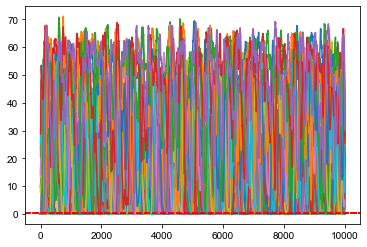

In [7]:
# Import pandas for data saving
import pandas as pd
import numpy as np
import json 
from pylab import *
from Analysis_tools import *


def cure_array(tmp_):
    tmp__ = []
    for x in tmp_:
        if len(x) == 0:
            tmp__.append(np.nan)
        else:
            tmp__.append(x[0])
    return tmp__
def BnG_pattern_analysis_Tuan(Time, VLMuscle, VRMuscle):
    DT = 0.1
    nMuscle = len(VLMuscle)
    N_ = len(Time)
    res_t_d = [(Xcorr(VLMuscle[i,:],VLMuscle[i-9,:])[0:int(150/DT)]).tolist() 
               for i in range(9, nMuscle)] # Time delay
    res_l_r = [(Xcorr_LR(VLMuscle[i,:],VRMuscle[i,:])[0:]).tolist()
               for i in range(nMuscle)] # Left/Right cross correlogram
    res_a_c = [(Xcorr(VLMuscle[i,:],VLMuscle[i,:])[int(10/DT):int(150/DT)]).tolist()
               for i in range(nMuscle)] # auto-correlation removing 10 first ms (otherwise max is at 0 ms) and up to 150 ms
    Start, End, Duration = detect_event(VLMuscle, VRMuscle, Time, Threshold=.5)
    values_t_d = [Time[0:int(150/DT)][np.where(res==np.max(res))[0]] / 9. for res in res_t_d]
    values_t_d = cure_array(values_t_d)
    values_a_c = [Time[int(10/DT):int(150/DT)][np.where(res==np.max(res))[0]] for res in res_a_c]
    values_a_c = cure_array(values_a_c)
    values_lr_min = [np.min(res[int(size(res)/2) - 200:int(size(res)/2) + 200]) for res in res_l_r ]
    num_tail_beats, interbeat_intervals, start_times, beat_times = calc_tail_beat_freq(VRMuscle, VLMuscle, nmax = len(Time), 
                                                        dt = 0.1, lower_bound = -0.5, upper_bound = 0.5, delay = 1000) #delay = 500
    inst_freq = [1000/interbeat_intervals[i] if not np.isnan(interbeat_intervals[i]) else math.nan for i in range(0, len(interbeat_intervals))]

    if Start == 'No event detected':
        iei = 'No event detected'
    else:    
        iei = [Start[i+1] - End[i] for i in range(len(End)-1)]
    dict_res_sensitivity = {}
    dict_res_sensitivity['Ipsilateral delay'] = {'Cross-correlation curve delta 9 somites' : (Time.tolist(),res_t_d),
                                                     'Computed time delay per somite (ms)': values_t_d }
    dict_res_sensitivity['Left/Right Xcorr min delay'] = {'Cross-correlation curve' : (Time.tolist(),res_l_r),
                                                          'Computed L/R min': values_lr_min}
    dict_res_sensitivity['Tail beat delay'] = {'Auto-correlation curve (10-150 ms)' : (Time.tolist(),res_a_c),
                                                     'Computed tail beat time delay (ms)': values_a_c }
    dict_res_sensitivity['Events'] = {'Start times (ms)' : Start.tolist(),
                                      'End times (ms)': End.tolist(),
                                      'Duration (ms)': Duration.tolist(),
                                      'Inter-event intervals': iei
                                     }
    dict_res_sensitivity['Average frequency'] = {'Average frequency (Hz)': 1000/np.nanmean(interbeat_intervals),
                                                 'Instantaneous frequency (Hz)': inst_freq,
                                                 'Number of tail beats': num_tail_beats,
                                                 'Interbeat intervals (ms)': interbeat_intervals,
                                                 'Start times(ms)': start_times,
                                                 'Beat times(ms)': beat_times
                                                }
    return dict_res_sensitivity

file_names = ['Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-72_0.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-72_1.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-72_2.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-72_3.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-72_4.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-70_0.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-70_1.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-70_2.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-70_3.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-70_4.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-68_0.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-68_1.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-68_2.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-68_3.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-68_4.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-66_0.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-66_1.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-66_2.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-66_3.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-66_4.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-64_0.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-64_1.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-64_2.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-64_3.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-64_4.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-62_0.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-62_1.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-62_2.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-62_3.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-62_4.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-60_0.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-60_1.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-60_2.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-60_3.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-60_4.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-58_0.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-58_1.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-58_2.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-58_3.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-58_4.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-56_0.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-56_1.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-56_2.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-56_3.csv',
              'Beat_and_glide_Sim_data_Sensitivity_testing_E_GLY_-56_4.csv']
'''    

file_names = ['Beat_and_Glide_base_0pt00_0.csv',
              'Beat_and_Glide_base_0pt00_1.csv',
              'Beat_and_Glide_base_0pt00_2.csv',
              'Beat_and_Glide_base_0pt00_3.csv',
              'Beat_and_Glide_base_0pt00_4.csv',
              'Beat_and_Glide_base_0pt00_5.csv',
              'Beat_and_Glide_base_0pt00_6.csv',
              'Beat_and_Glide_base_0pt00_7.csv',
              'Beat_and_Glide_base_0pt00_8.csv',
              'Beat_and_Glide_base_0pt00_9.csv',
              'Beat_and_glide_SigmaD_0pt10_0.csv',
              'Beat_and_glide_SigmaD_0pt10_1.csv',
              'Beat_and_glide_SigmaD_0pt10_2.csv',
              'Beat_and_glide_SigmaD_0pt10_3.csv',
              'Beat_and_glide_SigmaD_0pt10_4.csv',
              'Beat_and_glide_SigmaD_0pt10_5.csv',
              'Beat_and_glide_SigmaD_0pt10_6.csv',
              'Beat_and_glide_SigmaD_0pt10_7.csv',
              'Beat_and_glide_SigmaD_0pt10_8.csv',
              'Beat_and_glide_SigmaD_0pt10_9.csv',
              'Beat_and_glide_SigmaD_0pt20_0.csv',
              'Beat_and_glide_SigmaD_0pt20_1.csv',
              'Beat_and_glide_SigmaD_0pt20_2.csv',
              'Beat_and_glide_SigmaD_0pt20_3.csv',
              'Beat_and_glide_SigmaD_0pt20_4.csv',
              'Beat_and_glide_SigmaD_0pt20_5.csv',
              'Beat_and_glide_SigmaD_0pt20_6.csv',
              'Beat_and_glide_SigmaD_0pt20_7.csv',
              'Beat_and_glide_SigmaD_0pt20_8.csv',
              'Beat_and_glide_SigmaD_0pt20_9.csv',
              'Beat_and_glide_SigmaD_0pt30_0.csv',
              'Beat_and_glide_SigmaD_0pt30_1.csv',
              'Beat_and_glide_SigmaD_0pt30_2.csv',
              'Beat_and_glide_SigmaD_0pt30_3.csv',
              'Beat_and_glide_SigmaD_0pt30_4.csv',
              'Beat_and_glide_SigmaD_0pt30_5.csv',
              'Beat_and_glide_SigmaD_0pt30_6.csv',
              'Beat_and_glide_SigmaD_0pt30_7.csv',
              'Beat_and_glide_SigmaD_0pt30_8.csv',
              'Beat_and_glide_SigmaD_0pt30_9.csv',
              'Beat_and_glide_SigmaD_0pt40_0.csv',
              'Beat_and_glide_SigmaD_0pt40_1.csv',
              'Beat_and_glide_SigmaD_0pt40_2.csv',
              'Beat_and_glide_SigmaD_0pt40_3.csv',
              'Beat_and_glide_SigmaD_0pt40_4.csv',
              'Beat_and_glide_SigmaD_0pt40_5.csv',
              'Beat_and_glide_SigmaD_0pt40_6.csv',
              'Beat_and_glide_SigmaD_0pt40_7.csv',
              'Beat_and_glide_SigmaD_0pt40_8.csv',
              'Beat_and_glide_SigmaD_0pt40_9.csv',
              'Beat_and_glide_SigmaD_0pt50_0.csv',
              'Beat_and_glide_SigmaD_0pt50_1.csv',
              'Beat_and_glide_SigmaD_0pt50_2.csv',
              'Beat_and_glide_SigmaD_0pt50_3.csv',
              'Beat_and_glide_SigmaD_0pt50_4.csv',
              'Beat_and_glide_SigmaD_0pt50_5.csv',
              'Beat_and_glide_SigmaD_0pt50_6.csv',
              'Beat_and_glide_SigmaD_0pt50_7.csv',
              'Beat_and_glide_SigmaD_0pt50_8.csv',
              'Beat_and_glide_SigmaD_0pt50_9.csv',
              'Beat_and_Glide_SigmaL_0pt10_0.csv',
              'Beat_and_Glide_SigmaL_0pt10_1.csv',
              'Beat_and_Glide_SigmaL_0pt10_2.csv',
              'Beat_and_Glide_SigmaL_0pt10_3.csv',
              'Beat_and_Glide_SigmaL_0pt10_4.csv',
              'Beat_and_Glide_SigmaL_0pt10_5.csv',
              'Beat_and_Glide_SigmaL_0pt10_6.csv',
              'Beat_and_Glide_SigmaL_0pt10_7.csv',
              'Beat_and_Glide_SigmaL_0pt10_8.csv',
              'Beat_and_Glide_SigmaL_0pt10_9.csv',
              'Beat_and_Glide_SigmaL_0pt20_0.csv',
              'Beat_and_Glide_SigmaL_0pt20_1.csv',
              'Beat_and_Glide_SigmaL_0pt20_2.csv',
              'Beat_and_Glide_SigmaL_0pt20_3.csv',
              'Beat_and_Glide_SigmaL_0pt20_4.csv',
              'Beat_and_Glide_SigmaL_0pt20_5.csv',
              'Beat_and_Glide_SigmaL_0pt20_6.csv',
              'Beat_and_Glide_SigmaL_0pt20_7.csv',
              'Beat_and_Glide_SigmaL_0pt20_8.csv',
              'Beat_and_Glide_SigmaL_0pt20_9.csv',
              'Beat_and_Glide_SigmaL_0pt30_0.csv',
              'Beat_and_Glide_SigmaL_0pt30_1.csv',
              'Beat_and_Glide_SigmaL_0pt30_2.csv',
              'Beat_and_Glide_SigmaL_0pt30_3.csv',
              'Beat_and_Glide_SigmaL_0pt30_4.csv',
              'Beat_and_Glide_SigmaL_0pt30_5.csv',
              'Beat_and_Glide_SigmaL_0pt30_6.csv',
              'Beat_and_Glide_SigmaL_0pt30_7.csv',
              'Beat_and_Glide_SigmaL_0pt30_8.csv',
              'Beat_and_Glide_SigmaL_0pt30_9.csv',
              'Beat_and_Glide_SigmaL_0pt40_0.csv',
              'Beat_and_Glide_SigmaL_0pt40_1.csv',
              'Beat_and_Glide_SigmaL_0pt40_2.csv',
              'Beat_and_Glide_SigmaL_0pt40_3.csv',
              'Beat_and_Glide_SigmaL_0pt40_4.csv',
              'Beat_and_Glide_SigmaL_0pt40_5.csv',
              'Beat_and_Glide_SigmaL_0pt40_6.csv',
              'Beat_and_Glide_SigmaL_0pt40_7.csv',
              'Beat_and_Glide_SigmaL_0pt40_8.csv',
              'Beat_and_Glide_SigmaL_0pt40_9.csv',
              'Beat_and_Glide_SigmaL_0pt50_0.csv',
              'Beat_and_Glide_SigmaL_0pt50_1.csv',
              'Beat_and_Glide_SigmaL_0pt50_2.csv',
              'Beat_and_Glide_SigmaL_0pt50_3.csv',
              'Beat_and_Glide_SigmaL_0pt50_4.csv',
              'Beat_and_Glide_SigmaL_0pt50_5.csv',
              'Beat_and_Glide_SigmaL_0pt50_6.csv',
              'Beat_and_Glide_SigmaL_0pt50_7.csv',
              'Beat_and_Glide_SigmaL_0pt50_8.csv',
              'Beat_and_Glide_SigmaL_0pt50_9.csv',
              'Beat_and_glide_SigmaP_0pt01_0.csv',
              'Beat_and_glide_SigmaP_0pt01_1.csv',
              'Beat_and_glide_SigmaP_0pt01_2.csv',
              'Beat_and_glide_SigmaP_0pt01_3.csv',
              'Beat_and_glide_SigmaP_0pt01_4.csv',
              'Beat_and_glide_SigmaP_0pt01_5.csv',
              'Beat_and_glide_SigmaP_0pt01_6.csv',
              'Beat_and_glide_SigmaP_0pt01_7.csv',
              'Beat_and_glide_SigmaP_0pt01_8.csv',
              'Beat_and_glide_SigmaP_0pt01_9.csv',
              'Beat_and_glide_SigmaP_0pt02_0.csv',
              'Beat_and_glide_SigmaP_0pt02_1.csv',
              'Beat_and_glide_SigmaP_0pt02_2.csv',
              'Beat_and_glide_SigmaP_0pt02_3.csv',
              'Beat_and_glide_SigmaP_0pt02_4.csv',
              'Beat_and_glide_SigmaP_0pt02_5.csv',
              'Beat_and_glide_SigmaP_0pt02_6.csv',
              'Beat_and_glide_SigmaP_0pt02_7.csv',
              'Beat_and_glide_SigmaP_0pt02_8.csv',
              'Beat_and_glide_SigmaP_0pt02_9.csv',
              'Beat_and_glide_SigmaP_0pt03_0.csv',
              'Beat_and_glide_SigmaP_0pt03_1.csv',
              'Beat_and_glide_SigmaP_0pt03_2.csv',
              'Beat_and_glide_SigmaP_0pt03_3.csv',
              'Beat_and_glide_SigmaP_0pt03_4.csv',
              'Beat_and_glide_SigmaP_0pt03_5.csv',
              'Beat_and_glide_SigmaP_0pt03_6.csv',
              'Beat_and_glide_SigmaP_0pt03_7.csv',
              'Beat_and_glide_SigmaP_0pt03_8.csv',
              'Beat_and_glide_SigmaP_0pt03_9.csv',
              'Beat_and_glide_SigmaP_0pt04_0.csv',
              'Beat_and_glide_SigmaP_0pt04_1.csv',
              'Beat_and_glide_SigmaP_0pt04_2.csv',
              'Beat_and_glide_SigmaP_0pt04_3.csv',
              'Beat_and_glide_SigmaP_0pt04_4.csv',
              'Beat_and_glide_SigmaP_0pt04_5.csv',
              'Beat_and_glide_SigmaP_0pt04_6.csv',
              'Beat_and_glide_SigmaP_0pt04_7.csv',
              'Beat_and_glide_SigmaP_0pt04_8.csv',
              'Beat_and_glide_SigmaP_0pt04_9.csv',
              'Beat_and_glide_SigmaP_0pt05_0.csv',
              'Beat_and_glide_SigmaP_0pt05_1.csv',
              'Beat_and_glide_SigmaP_0pt05_2.csv',
              'Beat_and_glide_SigmaP_0pt05_3.csv',
              'Beat_and_glide_SigmaP_0pt05_4.csv',
              'Beat_and_glide_SigmaP_0pt05_5.csv',
              'Beat_and_glide_SigmaP_0pt05_6.csv',
              'Beat_and_glide_SigmaP_0pt05_7.csv',
              'Beat_and_glide_SigmaP_0pt05_8.csv',
              'Beat_and_glide_SigmaP_0pt05_9.csv',
              'Beat_and_glide_SigmaW_0pt10_0.csv',
              'Beat_and_glide_SigmaW_0pt10_1.csv',
              'Beat_and_glide_SigmaW_0pt10_2.csv',
              'Beat_and_glide_SigmaW_0pt10_3.csv',
              'Beat_and_glide_SigmaW_0pt10_4.csv',
              'Beat_and_glide_SigmaW_0pt10_5.csv',
              'Beat_and_glide_SigmaW_0pt10_6.csv',
              'Beat_and_glide_SigmaW_0pt10_7.csv',
              'Beat_and_glide_SigmaW_0pt10_8.csv',
              'Beat_and_glide_SigmaW_0pt10_9.csv',
              'Beat_and_glide_SigmaW_0pt20_0.csv',
              'Beat_and_glide_SigmaW_0pt20_1.csv',
              'Beat_and_glide_SigmaW_0pt20_2.csv',
              'Beat_and_glide_SigmaW_0pt20_3.csv',
              'Beat_and_glide_SigmaW_0pt20_4.csv',
              'Beat_and_glide_SigmaW_0pt20_5.csv',
              'Beat_and_glide_SigmaW_0pt20_6.csv',
              'Beat_and_glide_SigmaW_0pt20_7.csv',
              'Beat_and_glide_SigmaW_0pt20_8.csv',
              'Beat_and_glide_SigmaW_0pt20_9.csv',
              'Beat_and_glide_SigmaW_0pt30_0.csv',
              'Beat_and_glide_SigmaW_0pt30_1.csv',
              'Beat_and_glide_SigmaW_0pt30_2.csv',
              'Beat_and_glide_SigmaW_0pt30_3.csv',
              'Beat_and_glide_SigmaW_0pt30_4.csv',
              'Beat_and_glide_SigmaW_0pt30_5.csv',
              'Beat_and_glide_SigmaW_0pt30_6.csv',
              'Beat_and_glide_SigmaW_0pt30_7.csv',
              'Beat_and_glide_SigmaW_0pt30_8.csv',
              'Beat_and_glide_SigmaW_0pt30_9.csv',
              'Beat_and_glide_SigmaW_0pt40_0.csv',
              'Beat_and_glide_SigmaW_0pt40_1.csv',
              'Beat_and_glide_SigmaW_0pt40_2.csv',
              'Beat_and_glide_SigmaW_0pt40_3.csv',
              'Beat_and_glide_SigmaW_0pt40_4.csv',
              'Beat_and_glide_SigmaW_0pt40_5.csv',
              'Beat_and_glide_SigmaW_0pt40_6.csv',
              'Beat_and_glide_SigmaW_0pt40_7.csv',
              'Beat_and_glide_SigmaW_0pt40_8.csv',
              'Beat_and_glide_SigmaW_0pt40_9.csv',
              'Beat_and_glide_SigmaW_0pt50_0.csv',
              'Beat_and_glide_SigmaW_0pt50_1.csv',
              'Beat_and_glide_SigmaW_0pt50_2.csv',
              'Beat_and_glide_SigmaW_0pt50_3.csv',
              'Beat_and_glide_SigmaW_0pt50_4.csv',
              'Beat_and_glide_SigmaW_0pt50_5.csv',
              'Beat_and_glide_SigmaW_0pt50_6.csv',
              'Beat_and_glide_SigmaW_0pt50_7.csv',
              #'Beat_and_glide_SigmaW_0pt50_8.csv',
              'Beat_and_glide_SigmaW_0pt50_9.csv']
'''

for names in file_names:
    
    read_data = pd.read_csv(names)
    read_data

    data_top = list(read_data.columns.values.tolist())
    data_top
    
    MN_index = []
    dI6_index = [] 
    V0v_index = []  
    V2a_index = [] 
    V1_index = []
    Muscle_index = []

    for i in range(0, len(data_top)):
        if (data_top[i].find('MN') != -1):
            MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
            nMN = max(MN_index) + 1
        if (data_top[i].find('dI6') != -1):
            dI6_index.append(int(data_top[i][data_top[i].find('dI6')+3:data_top[i].find('dI6')+5]))
            ndI6 = max(dI6_index) + 1
        if (data_top[i].find('V0v') != -1):
            V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
            nV0v = max(V0v_index) + 1
        if (data_top[i].find('V2a') != -1):
            V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
            nV2a = max(V2a_index) + 1
        if (data_top[i].find('V1') != -1):
            V1_index.append(int(data_top[i][data_top[i].find('V1')+2:data_top[i].find('V1')+4]))
            nV1 = max(V1_index) + 1
        if (data_top[i].find('Muscle') != -1):
            Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
            nMuscle = max(Muscle_index) + 1

    read_sim = np.ascontiguousarray(read_data)
    read_sim = np.transpose(read_sim)
    read_sim
    Time = read_sim[0]
    next_start = 1
    next_end = next_start + nMN
    VLMN = read_sim[1:next_end]
    next_start = next_end
    next_end = next_start + nMN
    VRMN = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + ndI6
    VLdI6 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + ndI6
    VRdI6 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV0v
    VLV0v = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV0v
    VRV0v = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV2a
    VLV2a = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV2a
    VRV2a = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV1
    VLV1 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV1
    VRV1 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nMuscle
    VLMuscle = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nMuscle
    VRMuscle = read_sim[next_start:next_end]
    TIME_END = Time[-1]
    TIME_END

    
   # Build results if not done yet
    results = dict()
    results = BnG_pattern_analysis_Tuan(Time, VLMuscle, VRMuscle)
    
    all_durations = results['Events']['Duration (ms)']
    
    all_inter_events = results['Events']['Inter-event intervals']
    
    all_tail_beat_delays = results['Tail beat delay']['Computed tail beat time delay (ms)']
    
    all_LR_mins = results['Left/Right Xcorr min delay']['Computed L/R min']
    
    all_average_frequency = results['Average frequency']['Average frequency (Hz)']
    
    #analysis_file = 'Analysis_' + names[:-3] + 'json' 
    analysis_file = 'Analysis_' + names.replace('_Sim_data','').replace('csv','json')
    
    my_json = json.dumps(results)
    f = open(analysis_file,"w")
    f.write(my_json)
    f.close()
    

In [ ]:
analysis_file

## Analyzing and plotting results for SigmaD (Figure 9A-D)

This block will take pre-analyzed simulations (in .json files) and plot the results as well as calculate averages and standard deviations at different weights, run ANOVA and t-tests.  The .json files must have a particular structure as set by the block of code that analyzes simulations (see above in this notebook.  This block analyzes for SigmaD (because it outputs a file called SigmaD.png) but can really be used for any type of sensitivity testing. You just have to change the name of the output file

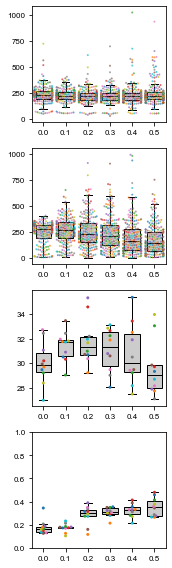

DURATIONS
F_onewayResult(statistic=2.4958036815101505, pvalue=0.02932310337465375)
dfs_durations =1253
EPISODE DURATIONS T-TESTS
Durations t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=1.6472719548841426, pvalue=0.10029740337438488)
Durations t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=1.999928535593876, pvalue=0.046188808249792775)
Durations t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=1.8184171275579883, pvalue=0.06972990220746828)
Durations t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=0.7443149404781692, pvalue=0.4571031877548387)
Durations t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-0.8295983204046448, pvalue=0.40722838076854595)
Durations t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=0.46986203290780004, pvalue=0.6387135368097803)
Durations t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=0.2579261847640594, pvalue=0.79659424

'\nDURATIONS\nF_onewayResult(statistic=2.4958036815101505, pvalue=0.02932310337465375)\ndfs_durations =1253\nEPISODE DURATIONS T-TESTS\nDurations t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=1.6472719548841426, pvalue=0.10029740337438488)\nDurations t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=1.999928535593876, pvalue=0.046188808249792775)\nDurations t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=1.8184171275579883, pvalue=0.06972990220746828)\nDurations t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=0.7443149404781692, pvalue=0.4571031877548387)\nDurations t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-0.8295983204046448, pvalue=0.40722838076854595)\nDurations t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=0.46986203290780004, pvalue=0.6387135368097803)\nDurations t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=0.2579261847640594, pval

In [2]:
# Import pandas for data saving
import pandas as pd
import numpy as np
import json
import csv
import scipy.stats as stats
from pylab import *
from Analysis_tools import *
import seaborn as sns

%matplotlib inline

SMALL_SIZE = 10
FONT_STYLE = 'bold'
# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

dt = 0.1

cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

LINELENGTH = 0.5
LINEWIDTH = 1

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

MARKER_SIZE = 3

FONT_STYLE = 'bold'

#fig, axes = plt.subplots(4, 1, figsize=(3.5, 8))

fig, axes = plt.subplots(4, 1, figsize=(2.5, 8))

file_names = ['./JSONs/Analysis_Beat_and_Glide_base_0pt00_0.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_1.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_2.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_3.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_4.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_5.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_6.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_7.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_8.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_9.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt10_0.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt10_1.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt10_2.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt10_3.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt10_4.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt10_5.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt10_6.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt10_7.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt10_8.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt10_9.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt20_0.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt20_1.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt20_2.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt20_3.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt20_4.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt20_5.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt20_6.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt20_7.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt20_8.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt20_9.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt30_0.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt30_1.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt30_2.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt30_3.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt30_4.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt30_5.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt30_6.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt30_7.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt30_8.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt30_9.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt40_0.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt40_1.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt40_2.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt40_3.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt40_4.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt40_5.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt40_6.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt40_7.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt40_8.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt40_9.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt50_0.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt50_1.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt50_2.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt50_3.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt50_4.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt50_5.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt50_6.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt50_7.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt50_8.json',
              './JSONs/Analysis_Beat_and_glide_SigmaD_0pt50_9.json']


somite_index = 9
i = 0

durations_dict=dict()
inter_events_dict = dict()
tail_beat_delays_dict = dict()
LR_mins_dict = dict()
average_frequency_dict = dict()
all_weights=[]

durations_df = pd.DataFrame(columns = ["Durations", "Weight", "Sim_index"])
inter_events_df = pd.DataFrame(columns = ["Inter_events", "Weight", "Sim_index"])
tail_beat_delays_df = pd.DataFrame(columns = ["Tail_beat_delays", "Weight", "Sim_index"])
average_frequency_df =  pd.DataFrame(columns = ["Average_frequency", "Weight", "Sim_index"])
LR_mins_df = pd.DataFrame(columns = ["LR_mins", "Weight", "Sim_index"])

for names in file_names:
    
    i=i+1
    
    f = open(names,)
    results = json.load(f)

    sim_index = names[names.find('.j')-1:names.find('.j')]
    
    all_durations = results['Events']['Duration (ms)']
    
    all_inter_events = results['Events']['Inter-event intervals']
    
    all_tail_beat_delays = results['Tail beat delay']['Computed tail beat time delay (ms)']
    
    all_average_frequency = results['Average frequency']['Average frequency (Hz)']
        
    all_LR_mins = results['Left/Right Xcorr min delay']['Computed L/R min']
    
    weight_str = names[names.find('pt')-1:names.find('pt')+4]
    weight = int(weight_str[0]) + int(weight_str[3:5])/100
        
    if weight not in all_weights:
        all_weights.append(weight)
        durations_dict[str(weight)] = []
        inter_events_dict[str(weight)] = []
        tail_beat_delays_dict[str(weight)] = []
        average_frequency_dict[str(weight)] = []
        LR_mins_dict[str(weight)] = []

    tail_beat_delays_to_add = all_tail_beat_delays[somite_index]
    average_frequency_to_add = all_average_frequency
    LR_mins_to_add = all_LR_mins[somite_index]
    
    durations_dict[str(weight)].extend(all_durations[1:])
    inter_events_dict[str(weight)].extend(all_inter_events)
    tail_beat_delays_dict[str(weight)].append(tail_beat_delays_to_add)
    average_frequency_dict[str(weight)].append(average_frequency_to_add)
    if LR_mins_to_add < 1.1:
        LR_mins_dict[str(weight)].append(LR_mins_to_add)
    
    temp_durations = list(zip(all_durations[1:], [weight for i in range(1, len(all_durations))], [sim_index for i in range(1, len(all_durations))]))
    temp_durations_df = pd.DataFrame(temp_durations, columns = ["Durations", "Weight", "Sim_index"]) 
    durations_df = durations_df.append(temp_durations_df)    
        
    temp_inter_events = list(zip(all_inter_events, [weight for i in range(0, len(all_inter_events))], [sim_index for i in range(0, len(all_inter_events))]))
    temp_inter_events_df = pd.DataFrame(temp_inter_events, columns = ["Inter_events", "Weight", "Sim_index"]) 
    inter_events_df = inter_events_df.append(temp_inter_events_df)  

    temp_tail_beat_delays = list(zip([tail_beat_delays_to_add], [weight] , [sim_index]))
    temp_tail_beat_delays_df = pd.DataFrame(temp_tail_beat_delays, columns = ["Tail_beat_delays", "Weight", "Sim_index"]) 
    tail_beat_delays_df = tail_beat_delays_df.append(temp_tail_beat_delays_df)
    
    temp_average_frequency = list(zip([average_frequency_to_add], [weight] , [sim_index]))
    temp_average_frequency_df = pd.DataFrame(temp_average_frequency, columns = ["Average_frequency", "Weight", "Sim_index"]) 
    average_frequency_df = average_frequency_df.append(temp_average_frequency_df)   
    
    if LR_mins_to_add < 1.1:
        temp_LR_mins = list(zip([LR_mins_to_add], [weight], [sim_index]))
        temp_LR_mins_df = pd.DataFrame(temp_LR_mins, columns = ["LR_mins", "Weight", "Sim_index"]) 
        LR_mins_df = LR_mins_df.append(temp_LR_mins_df)    
 
sns.swarmplot(ax=axes[0], x="Weight", y="Durations", data=durations_df, hue = "Sim_index", size = MARKER_SIZE-1, alpha = 0.7)
sns.swarmplot(ax=axes[1], x="Weight", y="Inter_events", data=inter_events_df, hue = "Sim_index", size = MARKER_SIZE-1, alpha = 0.7)
#sns.swarmplot(ax=axes[2], x="Weight", y="Tail_beat_delays", data=tail_beat_delays_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)
sns.swarmplot(ax=axes[2], x="Weight", y="Average_frequency", data=average_frequency_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)
sns.swarmplot(ax=axes[3], x="Weight", y="LR_mins", data=LR_mins_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)

WIDTH = 0.7
COLOR = '0.8'
LINEWIDTH = 1

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

sns.boxplot(ax=axes[0], x="Weight", y="Durations", data=durations_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[1], x="Weight", y="Inter_events", data=inter_events_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
#sns.boxplot(ax=axes[2], x="Weight", y="Tail_beat_delays", data=tail_beat_delays_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[2], x="Weight", y="Average_frequency", data=average_frequency_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[3], x="Weight", y="LR_mins", data=LR_mins_df, width = WIDTH, color=COLOR, linewidth = LINEWIDTH, showfliers = False, **PROPS)

#axes[0].axhspan(160., 200, facecolor='xkcd:light blue', alpha=0.5)
#axes[1].axhspan(360, 420, facecolor='xkcd:light blue', alpha=0.5)
#axes[2].axhspan(27, 30.3, facecolor='xkcd:light blue', alpha=0.5)
#axes[3].axhspan(0.19414659927532016, 0.2321524787383282, facecolor='xkcd:light blue', alpha=0.5)


axes[3].set_ylim(0, 1)

for ax in axes:
    ax.set_ylabel("")
    ax.legend([],[], frameon=False)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()): 
        item.set_fontsize(SMALL_SIZE)
    ax.set_xlabel('')
        
plt.tight_layout()

plt.savefig("SigmaD.png", dpi=1000)

plt.show()

# STATISTICAL TESTING

df_durations=[]
df_inter_events=[]
df_tail_beat_delays=[]
df_LR_mins=[]
df_average_frequency = []

dfs_durations = 0
dfs_inter_events=0
dfs_tail_beat_delays = 0
dfs_LR_mins = 0
dfs_average_frequency = 0

for i in all_weights:
    df_durations.append(durations_dict[str(i)])
    df_inter_events.append(inter_events_dict[str(i)])
    df_tail_beat_delays.append(tail_beat_delays_dict[str(i)])
    df_LR_mins.append(LR_mins_dict[str(i)])
    df_average_frequency.append(average_frequency_dict[str(i)])

    
#test durations
print("DURATIONS")
print(stats.f_oneway(*df_durations))

for i in range(0, len(all_weights)):
    dfs_durations = dfs_durations + sum(len(df_durations[i]))

dfs_durations = dfs_durations - len(df_durations)
print("dfs_durations =" + str(dfs_durations))

print("EPISODE DURATIONS T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("Durations t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(durations_dict[str(all_weights[i])], durations_dict[str(all_weights[j])])))

print("\n")        

print("INTER-EPISODE INTERVALS")
print(stats.f_oneway(*df_inter_events))

for i in range(0, len(all_weights)):
    dfs_inter_events = dfs_inter_events + sum(len(df_inter_events[i]))

dfs_inter_events = dfs_inter_events - len(df_inter_events)

print("dfs_inter_events =" + str(dfs_inter_events))

print("INTER-EPISODE INTERVALS T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("inter_events t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(inter_events_dict[str(all_weights[i])], inter_events_dict[str(all_weights[j])])))
print("\n")
        
print("TIME DELAY AT PEAK AUTOCORRELATION")
print(stats.f_oneway(*df_tail_beat_delays))

for i in range(0, len(all_weights)):
    dfs_tail_beat_delays = dfs_tail_beat_delays + sum(len(df_tail_beat_delays[i]))

dfs_tail_beat_delays = dfs_tail_beat_delays - len(df_tail_beat_delays)

print("dfs_tail_beat_delays =" + str(dfs_tail_beat_delays))

print("TIME DELAY T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("tail_beat_delays t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(tail_beat_delays_dict[str(all_weights[i])], tail_beat_delays_dict[str(all_weights[j])])))

print("\n")
        
print("AVERAGE FREQUENCY")
print(stats.f_oneway(*df_average_frequency))

for i in range(0, len(all_weights)):
    dfs_average_frequency = dfs_average_frequency + sum(len(df_average_frequency[i]))

dfs_average_frequency = dfs_average_frequency - len(df_average_frequency)

print("dfs_average_frequency =" + str(dfs_average_frequency))

print("AVERAGE FREQUENCY T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("average_frequency t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(average_frequency_dict[str(all_weights[i])], average_frequency_dict[str(all_weights[j])])))

print("\n")           
            
print("MINIMUM OF LEFT-RIGHT CROSS-CORRELATION")
print(stats.f_oneway(*df_LR_mins))

for i in range(0, len(all_weights)):
    dfs_LR_mins = dfs_LR_mins + sum(len(df_LR_mins[i]))

dfs_LR_mins = dfs_LR_mins - len(df_LR_mins)

print("dfs_LR_mins =" + str(dfs_LR_mins))

print("MINIMUM OF LEFT-RIGHT CROSS-CORRELATION T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("LR_mins t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(LR_mins_dict[str(all_weights[i])], LR_mins_dict[str(all_weights[j])])))

            
'''
DURATIONS
F_onewayResult(statistic=2.4958036815101505, pvalue=0.02932310337465375)
dfs_durations =1253
EPISODE DURATIONS T-TESTS
Durations t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=1.6472719548841426, pvalue=0.10029740337438488)
Durations t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=1.999928535593876, pvalue=0.046188808249792775)
Durations t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=1.8184171275579883, pvalue=0.06972990220746828)
Durations t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=0.7443149404781692, pvalue=0.4571031877548387)
Durations t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-0.8295983204046448, pvalue=0.40722838076854595)
Durations t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=0.46986203290780004, pvalue=0.6387135368097803)
Durations t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=0.2579261847640594, pvalue=0.7965942423830674)
Durations t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=-0.6980857718635275, pvalue=0.48551357139509754)
Durations t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=-2.2916224098235953, pvalue=0.022415754685524963)
Durations t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=-0.199731826285162, pvalue=0.8417895857662061)
Durations t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=-1.0602495179154012, pvalue=0.2896433392147229)
Durations t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=-2.5986258108839175, pvalue=0.009683645552235054)
Durations t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=-0.8974689717021601, pvalue=0.3699697646321185)
Durations t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=-2.4685425334968927, pvalue=0.0139455303910108)
Durations t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=-1.4871865512184321, pvalue=0.13766743605956436)


INTER-EPISODE INTERVALS
F_onewayResult(statistic=11.232401053257918, pvalue=1.3021224250099225e-10)
dfs_inter_events =1253
INTER-EPISODE INTERVALS T-TESTS
inter_events t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=-1.570208284751148, pvalue=0.11716733196763089)
inter_events t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=-1.2346346127599683, pvalue=0.21769677958268874)
inter_events t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=0.44284572631475994, pvalue=0.6581108759402925)
inter_events t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=2.6828044919921874, pvalue=0.007589684092582279)
inter_events t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=5.427463667816944, pvalue=9.591108204275608e-08)
inter_events t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=0.11635918998888313, pvalue=0.9074271624148836)
inter_events t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=1.6983083875059362, pvalue=0.09021386374955828)
inter_events t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=3.7789740961073135, pvalue=0.00018047492015305875)
inter_events t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=6.482028901431323, pvalue=2.513122360925089e-10)
inter_events t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=1.4392482419791324, pvalue=0.15084506870144304)
inter_events t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=3.3675169314752664, pvalue=0.0008287456040709666)
inter_events t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=5.72671588555715, pvalue=1.9336125730776728e-08)
inter_events t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=1.9874205854072686, pvalue=0.04750826608339472)
inter_events t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=4.20204403950285, pvalue=3.204511209067863e-05)
inter_events t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=1.9481859924688572, pvalue=0.05201539638862556)


TIME DELAY AT PEAK AUTOCORRELATION
F_onewayResult(statistic=0.21565909538741543, pvalue=0.9543717351627746)
dfs_tail_beat_delays =54
TIME DELAY T-TESTS
tail_beat_delays t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=0.27249528048436394, pvalue=0.7883425835184205)
tail_beat_delays t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=-0.1984804891211452, pvalue=0.8448936729129972)
tail_beat_delays t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=0.3618944166347684, pvalue=0.7216445170608649)
tail_beat_delays t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-0.3205410242391433, pvalue=0.7522495862854122)
tail_beat_delays t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-0.3691411012992985, pvalue=0.7163290727816669)
tail_beat_delays t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-0.5053523155126908, pvalue=0.6194432116152224)
tail_beat_delays t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=0.08902592787225143, pvalue=0.9300443710836849)
tail_beat_delays t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=-0.663362700578024, pvalue=0.5155049308396966)
tail_beat_delays t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=-0.7136952842645077, pvalue=0.4845676225503739)
tail_beat_delays t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=0.6089180469071714, pvalue=0.5501872523698097)
tail_beat_delays t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=-0.11768056469147477, pvalue=0.9076239877486146)
tail_beat_delays t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=-0.17141076178586653, pvalue=0.8658130649001704)
tail_beat_delays t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=-0.7824051649626437, pvalue=0.4441482084625398)
tail_beat_delays t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=-0.8334582607615161, pvalue=0.41550963644010774)
tail_beat_delays t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=-0.05949965135574003, pvalue=0.9532097565871612)


AVERAGE FREQUENCY
F_onewayResult(statistic=1.8745864929731066, pvalue=0.11406340084440084)
dfs_average_frequency =54

MINIMUM OF LEFT-RIGHT CROSS-CORRELATION
F_onewayResult(statistic=14.511251700857953, pvalue=5.255327274849767e-09)
dfs_LR_mins =54
MINIMUM OF LEFT-RIGHT CROSS-CORRELATION T-TESTS
LR_mins t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=0.20328836960459282, pvalue=0.8411900635372705)
LR_mins t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=-3.107928576764219, pvalue=0.006073052650720966)
LR_mins t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=-5.412366308691007, pvalue=3.836935810202283e-05)
LR_mins t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-5.318019800290355, pvalue=4.688988117980163e-05)
LR_mins t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-5.390817799577685, pvalue=4.0164102590016814e-05)
LR_mins t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-3.7335216719563724, pvalue=0.0015207602344082924)
LR_mins t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=-7.647829904486264, pvalue=4.625052336737882e-07)
LR_mins t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=-6.8888451860635715, pvalue=1.9234794554203257e-06)
LR_mins t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=-6.4316654688139625, pvalue=4.712876170015478e-06)
LR_mins t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=-0.9099799886444857, pvalue=0.37485780231193166)
LR_mins t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=-1.271105834454532, pvalue=0.21987251935628638)
LR_mins t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=-1.9208689998657626, pvalue=0.07073179796057937)
LR_mins t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=-0.6178755785797294, pvalue=0.5443963552264472)
LR_mins t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=-1.5207264174820376, pvalue=0.14570062272308718)
LR_mins t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=-0.9441977694295798, pvalue=0.35757095860580457)
'''


## Analyzing and plotting results for SigmaL (Figure 9E-H)

This block will take pre-analyzed simulations (in .json files) and plot the results as well as calculate averages and standard deviations at different weights, run ANOVA and t-tests.  The .json files must have a particular structure as set by the block of code that analyzes simulations (see above in this notebook).  This block analyzes for SigmaP (because it outputs a file called SigmaL.png) but can really be used for any type of sensitivity testing. You just have to change the name of the output file

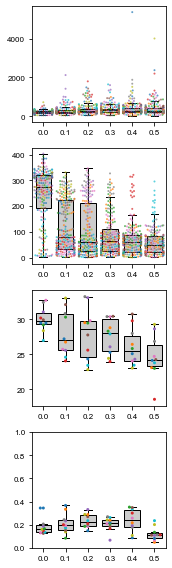

DURATIONS
F_onewayResult(statistic=8.725559523918054, pvalue=3.8060038676017614e-08)
dfs_durations =1253
EPISODE DURATIONS T-TESTS
Durations t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=-3.643574737659808, pvalue=0.00030164341099852404)
Durations t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=-6.21051759695685, pvalue=1.3303493663765442e-09)
Durations t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=-6.881423979257071, pvalue=2.1889917806396784e-11)
Durations t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-4.878396466361565, pvalue=1.5386888200105814e-06)
Durations t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-5.331322323097084, pvalue=1.6375533792319495e-07)
Durations t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-3.0517283027787663, pvalue=0.0024159372826090854)
Durations t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=-3.057681398062755

'\nDURATIONS\nF_onewayResult(statistic=8.725559523918054, pvalue=3.8060038676017614e-08)\ndfs_durations =1253\nEPISODE DURATIONS T-TESTS\nDurations t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=-3.643574737659808, pvalue=0.00030164341099852404)\nDurations t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=-6.21051759695685, pvalue=1.3303493663765442e-09)\nDurations t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=-6.881423979257071, pvalue=2.1889917806396784e-11)\nDurations t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-4.878396466361565, pvalue=1.5386888200105814e-06)\nDurations t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-5.331322323097084, pvalue=1.6375533792319495e-07)\nDurations t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-3.0517283027787663, pvalue=0.0024159372826090854)\nDurations t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=-3.05

In [3]:
# Import pandas for data saving
import pandas as pd
import numpy as np
import json
import csv
import scipy.stats as stats
from pylab import *
from Analysis_tools import *
import seaborn as sns

%matplotlib inline

SMALL_SIZE = 10
FONT_STYLE = 'bold'
# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

dt = 0.1

cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

LINELENGTH = 0.5
LINEWIDTH = 1

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

MARKER_SIZE = 3

FONT_STYLE = 'bold'

fig, axes = plt.subplots(4, 1, figsize=(2.5, 8))

file_names = ['./JSONs/Analysis_Beat_and_Glide_base_0pt00_0.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_0.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_2.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_3.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_4.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_5.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_6.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_7.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_8.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_9.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt10_0.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt10_1.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt10_2.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt10_3.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt10_4.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt10_5.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt10_6.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt10_7.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt10_8.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt10_9.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt20_0.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt20_1.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt20_2.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt20_3.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt20_4.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt20_5.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt20_6.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt20_7.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt20_8.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt20_9.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt30_0.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt30_1.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt30_2.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt30_3.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt30_4.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt30_5.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt30_6.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt30_7.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt30_8.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt30_9.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt40_0.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt40_1.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt40_2.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt40_3.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt40_4.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt40_5.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt40_6.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt40_7.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt40_8.json',
              './JSONs/Analysis_Beat_and_glide_sigmaL_0pt40_9.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt50_0.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt50_1.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt50_2.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt50_3.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt50_4.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt50_5.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt50_6.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt50_7.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt50_8.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaL_0pt50_9.json']

somite_index = 9
i = 0

durations_dict=dict()
inter_events_dict = dict()
tail_beat_delays_dict = dict()
LR_mins_dict = dict()
average_frequency_dict = dict()
all_weights=[]

durations_df = pd.DataFrame(columns = ["Durations", "Weight", "Sim_index"])
inter_events_df = pd.DataFrame(columns = ["Inter_events", "Weight", "Sim_index"])
tail_beat_delays_df = pd.DataFrame(columns = ["Tail_beat_delays", "Weight", "Sim_index"])
average_frequency_df =  pd.DataFrame(columns = ["Average_frequency", "Weight", "Sim_index"])
LR_mins_df = pd.DataFrame(columns = ["LR_mins", "Weight", "Sim_index"])

for names in file_names:
    
    i=i+1
    
    f = open(names,)
    results = json.load(f)

    sim_index = names[names.find('.j')-1:names.find('.j')]
    
    all_durations = results['Events']['Duration (ms)']
    
    all_inter_events = results['Events']['Inter-event intervals']
    
    all_tail_beat_delays = results['Tail beat delay']['Computed tail beat time delay (ms)']
    
    all_average_frequency = results['Average frequency']['Average frequency (Hz)']
        
    all_LR_mins = results['Left/Right Xcorr min delay']['Computed L/R min']
    
    weight_str = names[names.find('pt')-1:names.find('pt')+4]
    weight = int(weight_str[0]) + int(weight_str[3:5])/100
        
    if weight not in all_weights:
        all_weights.append(weight)
        durations_dict[str(weight)] = []
        inter_events_dict[str(weight)] = []
        tail_beat_delays_dict[str(weight)] = []
        average_frequency_dict[str(weight)] = []
        LR_mins_dict[str(weight)] = []

    tail_beat_delays_to_add = all_tail_beat_delays[somite_index]
    average_frequency_to_add = all_average_frequency
    LR_mins_to_add = all_LR_mins[somite_index]
    
    durations_dict[str(weight)].extend(all_durations[1:])
    inter_events_dict[str(weight)].extend(all_inter_events)
    tail_beat_delays_dict[str(weight)].append(tail_beat_delays_to_add)
    average_frequency_dict[str(weight)].append(average_frequency_to_add)
    if LR_mins_to_add < 1.1:
        LR_mins_dict[str(weight)].append(LR_mins_to_add)
    
    temp_durations = list(zip(all_durations[1:], [weight for i in range(1, len(all_durations))], [sim_index for i in range(1, len(all_durations))]))
    temp_durations_df = pd.DataFrame(temp_durations, columns = ["Durations", "Weight", "Sim_index"]) 
    durations_df = durations_df.append(temp_durations_df)    
        
    temp_inter_events = list(zip(all_inter_events, [weight for i in range(0, len(all_inter_events))], [sim_index for i in range(0, len(all_inter_events))]))
    temp_inter_events_df = pd.DataFrame(temp_inter_events, columns = ["Inter_events", "Weight", "Sim_index"]) 
    inter_events_df = inter_events_df.append(temp_inter_events_df)  

    temp_tail_beat_delays = list(zip([tail_beat_delays_to_add], [weight] , [sim_index]))
    temp_tail_beat_delays_df = pd.DataFrame(temp_tail_beat_delays, columns = ["Tail_beat_delays", "Weight", "Sim_index"]) 
    tail_beat_delays_df = tail_beat_delays_df.append(temp_tail_beat_delays_df)
    
    temp_average_frequency = list(zip([average_frequency_to_add], [weight] , [sim_index]))
    temp_average_frequency_df = pd.DataFrame(temp_average_frequency, columns = ["Average_frequency", "Weight", "Sim_index"]) 
    average_frequency_df = average_frequency_df.append(temp_average_frequency_df)   
    
    if LR_mins_to_add < 1.1:
        temp_LR_mins = list(zip([LR_mins_to_add], [weight], [sim_index]))
        temp_LR_mins_df = pd.DataFrame(temp_LR_mins, columns = ["LR_mins", "Weight", "Sim_index"]) 
        LR_mins_df = LR_mins_df.append(temp_LR_mins_df)    
 
sns.swarmplot(ax=axes[0], x="Weight", y="Durations", data=durations_df, hue = "Sim_index", size = MARKER_SIZE-1, alpha = 0.7)
sns.swarmplot(ax=axes[1], x="Weight", y="Inter_events", data=inter_events_df, hue = "Sim_index", size = MARKER_SIZE-1, alpha = 0.7)
#sns.swarmplot(ax=axes[2], x="Weight", y="Tail_beat_delays", data=tail_beat_delays_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)
sns.swarmplot(ax=axes[2], x="Weight", y="Average_frequency", data=average_frequency_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)
sns.swarmplot(ax=axes[3], x="Weight", y="LR_mins", data=LR_mins_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)

WIDTH = 0.7
COLOR = '0.8'
LINEWIDTH = 1

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

sns.boxplot(ax=axes[0], x="Weight", y="Durations", data=durations_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[1], x="Weight", y="Inter_events", data=inter_events_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
#sns.boxplot(ax=axes[2], x="Weight", y="Tail_beat_delays", data=tail_beat_delays_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[2], x="Weight", y="Average_frequency", data=average_frequency_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[3], x="Weight", y="LR_mins", data=LR_mins_df, width = WIDTH, color=COLOR, linewidth = LINEWIDTH, showfliers = False, **PROPS)

#axes[0].axhspan(160., 200, facecolor='xkcd:light blue', alpha=0.5)
#axes[1].axhspan(360, 420, facecolor='xkcd:light blue', alpha=0.5)
#axes[2].axhspan(27, 30.3, facecolor='xkcd:light blue', alpha=0.5)
#axes[3].axhspan(0.19414659927532016, 0.2321524787383282, facecolor='xkcd:light blue', alpha=0.5)


axes[3].set_ylim(0, 1)

for ax in axes:
    ax.set_ylabel("")
    ax.legend([],[], frameon=False)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()): 
        item.set_fontsize(SMALL_SIZE)
    ax.set_xlabel('')
        
plt.tight_layout()

plt.savefig("SigmaL.png", dpi=1000)

plt.show()

# STATISTICAL TESTING

df_durations=[]
df_inter_events=[]
df_tail_beat_delays=[]
df_LR_mins=[]
df_average_frequency = []

dfs_durations = 0
dfs_inter_events=0
dfs_tail_beat_delays = 0
dfs_LR_mins = 0
dfs_average_frequency = 0

for i in all_weights:
    df_durations.append(durations_dict[str(i)])
    df_inter_events.append(inter_events_dict[str(i)])
    df_tail_beat_delays.append(tail_beat_delays_dict[str(i)])
    df_LR_mins.append(LR_mins_dict[str(i)])
    df_average_frequency.append(average_frequency_dict[str(i)])

    
#test durations
print("DURATIONS")
print(stats.f_oneway(*df_durations))

for i in range(0, len(all_weights)):
    dfs_durations = dfs_durations + sum(len(df_durations[i]))

dfs_durations = dfs_durations - len(df_durations)
print("dfs_durations =" + str(dfs_durations))

print("EPISODE DURATIONS T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("Durations t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(durations_dict[str(all_weights[i])], durations_dict[str(all_weights[j])])))

print("\n")        

print("INTER-EPISODE INTERVALS")
print(stats.f_oneway(*df_inter_events))

for i in range(0, len(all_weights)):
    dfs_inter_events = dfs_inter_events + sum(len(df_inter_events[i]))

dfs_inter_events = dfs_inter_events - len(df_inter_events)

print("dfs_inter_events =" + str(dfs_inter_events))

print("INTER-EPISODE INTERVALS T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("inter_events t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(inter_events_dict[str(all_weights[i])], inter_events_dict[str(all_weights[j])])))
print("\n")
        
print("TIME DELAY AT PEAK AUTOCORRELATION")
print(stats.f_oneway(*df_tail_beat_delays))

for i in range(0, len(all_weights)):
    dfs_tail_beat_delays = dfs_tail_beat_delays + sum(len(df_tail_beat_delays[i]))

dfs_tail_beat_delays = dfs_tail_beat_delays - len(df_tail_beat_delays)

print("dfs_tail_beat_delays =" + str(dfs_tail_beat_delays))

print("TIME DELAY T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("tail_beat_delays t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(tail_beat_delays_dict[str(all_weights[i])], tail_beat_delays_dict[str(all_weights[j])])))

print("\n")
        
print("AVERAGE FREQUENCY")
print(stats.f_oneway(*df_average_frequency))

for i in range(0, len(all_weights)):
    dfs_average_frequency = dfs_average_frequency + sum(len(df_average_frequency[i]))

dfs_average_frequency = dfs_average_frequency - len(df_average_frequency)

print("dfs_average_frequency =" + str(dfs_average_frequency))

print("AVERAGE FREQUENCY T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("average_frequency t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(average_frequency_dict[str(all_weights[i])], average_frequency_dict[str(all_weights[j])])))

print("\n")           
            
print("MINIMUM OF LEFT-RIGHT CROSS-CORRELATION")
print(stats.f_oneway(*df_LR_mins))

for i in range(0, len(all_weights)):
    dfs_LR_mins = dfs_LR_mins + sum(len(df_LR_mins[i]))

dfs_LR_mins = dfs_LR_mins - len(df_LR_mins)

print("dfs_LR_mins =" + str(dfs_LR_mins))

print("MINIMUM OF LEFT-RIGHT CROSS-CORRELATION T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("LR_mins t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(LR_mins_dict[str(all_weights[i])], LR_mins_dict[str(all_weights[j])])))


'''
DURATIONS
F_onewayResult(statistic=8.725559523918054, pvalue=3.8060038676017614e-08)
dfs_durations =1253
EPISODE DURATIONS T-TESTS
Durations t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=-3.643574737659808, pvalue=0.00030164341099852404)
Durations t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=-6.21051759695685, pvalue=1.3303493663765442e-09)
Durations t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=-6.881423979257071, pvalue=2.1889917806396784e-11)
Durations t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-4.878396466361565, pvalue=1.5386888200105814e-06)
Durations t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-5.331322323097084, pvalue=1.6375533792319495e-07)
Durations t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-3.0517283027787663, pvalue=0.0024159372826090854)
Durations t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=-3.0576813980627557, pvalue=0.0023638124211095924)
Durations t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=-2.9827119144727474, pvalue=0.003016247242408071)
Durations t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=-3.1920369613710577, pvalue=0.0015161589283261387)
Durations t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=0.3240077612253411, pvalue=0.7460949973890421)
Durations t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=-0.629286397684639, pvalue=0.5295154981889123)
Durations t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=-0.6666119118060356, pvalue=0.5054062963941068)
Durations t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=-0.9257924600320369, pvalue=0.3550804740634239)
Durations t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=-0.9869698797082613, pvalue=0.32423109546651074)
Durations t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=9.626327953346145e-05, pvalue=0.999923240295942)


INTER-EPISODE INTERVALS
F_onewayResult(statistic=118.05096098538311, pvalue=2.044257983252943e-102)
dfs_inter_events =1253
INTER-EPISODE INTERVALS T-TESTS
inter_events t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=12.028092152483557, pvalue=6.209138642438381e-29)
inter_events t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=12.531279257402986, pvalue=1.3504400344370793e-30)
inter_events t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=17.260086301935615, pvalue=9.862138075865521e-51)
inter_events t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=19.76610085387387, pvalue=2.085030902687421e-61)
inter_events t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=21.467808797584276, pvalue=1.8258324774402767e-68)
inter_events t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=1.3364973867369567, pvalue=0.18209185997825778)
inter_events t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=4.414690864836552, pvalue=1.2685775814546389e-05)
inter_events t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=6.499425928407198, pvalue=2.1934904102874218e-10)
inter_events t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=7.832247830489571, pvalue=3.7657551303522595e-14)
inter_events t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=2.6920731408591827, pvalue=0.0073875566576390855)
inter_events t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=4.604474824745775, pvalue=5.5401374290232915e-06)
inter_events t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=5.824880500392506, pvalue=1.1799145531480582e-08)
inter_events t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=2.221424052532422, pvalue=0.02684965679734135)
inter_events t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=3.7017533763626598, pvalue=0.000242928653830911)
inter_events t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=1.5078948973686255, pvalue=0.13235914937623303)


TIME DELAY AT PEAK AUTOCORRELATION
F_onewayResult(statistic=0.9624811617586246, pvalue=0.4489781805235674)
dfs_tail_beat_delays =54
TIME DELAY T-TESTS
tail_beat_delays t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=-0.352267981929582, pvalue=0.7287280886049119)
tail_beat_delays t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=-1.5416977288759788, pvalue=0.14054397886318323)
tail_beat_delays t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=-1.2072095958693012, pvalue=0.2429764865579791)
tail_beat_delays t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-2.158630250641477, pvalue=0.044628674320307864)
tail_beat_delays t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-1.087474728447106, pvalue=0.2911749290088399)
tail_beat_delays t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-1.208184893967418, pvalue=0.24261039337398935)
tail_beat_delays t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=-0.8657421078128396, pvalue=0.39802425965272037)
tail_beat_delays t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=-1.8328838950733444, pvalue=0.08341409728326105)
tail_beat_delays t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=-0.8426044266536606, pvalue=0.4105065625655645)
tail_beat_delays t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=0.3519715538297849, pvalue=0.7289466173643294)
tail_beat_delays t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=-0.5897952573218873, pvalue=0.5626590846328923)
tail_beat_delays t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=-0.04437152183459525, pvalue=0.9650968029499054)
tail_beat_delays t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=-0.9615794976012004, pvalue=0.3490013565741581)
tail_beat_delays t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=-0.26517739917067396, pvalue=0.7938858163681908)
tail_beat_delays t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=0.29098790349694253, pvalue=0.7743869513358603)


AVERAGE FREQUENCY
F_onewayResult(statistic=3.9571155545249455, pvalue=0.003949797322290351)
dfs_average_frequency =54
AVERAGE FREQUENCY T-TESTS
average_frequency t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=1.6746325810161595, pvalue=0.11129242101545761)
average_frequency t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=1.5768176451211784, pvalue=0.13224975447755968)
average_frequency t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=2.4680663722018994, pvalue=0.02383597880210998)
average_frequency t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=3.878266493599113, pvalue=0.0011014936747348928)
average_frequency t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=4.775611144246426, pvalue=0.00015124191376786865)
average_frequency t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=0.07028523858988596, pvalue=0.9447416216639033)
average_frequency t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=0.3247427738707438, pvalue=0.7491195488367582)
average_frequency t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=1.4605671818746637, pvalue=0.16136986982399637)
average_frequency t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=2.385398825737654, pvalue=0.028260432856210906)
average_frequency t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=0.217810195630199, pvalue=0.830027086175942)
average_frequency t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=1.2573717103831588, pvalue=0.2246889871893035)
average_frequency t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=2.127325671354787, pvalue=0.047473282792112804)
average_frequency t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=1.3176389726764846, pvalue=0.20415013739819213)
average_frequency t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=2.360319309494898, pvalue=0.0297476356051658)
average_frequency t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=1.1175437487872428, pvalue=0.2784566628984778)


MINIMUM OF LEFT-RIGHT CROSS-CORRELATION
F_onewayResult(statistic=3.162398366653683, pvalue=0.014147039144296138)
dfs_LR_mins =54
MINIMUM OF LEFT-RIGHT CROSS-CORRELATION T-TESTS
LR_mins t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=-0.44211480867065306, pvalue=0.6636722812443929)
LR_mins t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=-1.2188301409011746, pvalue=0.2386418654649052)
LR_mins t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=-0.3816563054509669, pvalue=0.707184337076159)
LR_mins t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-1.0581729458301, pvalue=0.3039713903697411)
LR_mins t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=2.3073060030134185, pvalue=0.033134295839644765)
LR_mins t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-0.6730791242415931, pvalue=0.5094470797159518)
LR_mins t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=0.136363411619499, pvalue=0.8930475555385894)
LR_mins t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=-0.6294387026626755, pvalue=0.5369698682463171)
LR_mins t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=2.7414306886653828, pvalue=0.013415293903724852)
LR_mins t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=1.0226001975918877, pvalue=0.32004478078360643)
LR_mins t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=-0.10205386937898987, pvalue=0.919842209419991)
LR_mins t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=4.338252812008011, pvalue=0.00039605848697755113)
LR_mins t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=-0.8482626648168675, pvalue=0.4074309532434802)
LR_mins t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=3.2972499860435627, pvalue=0.0040055468257908155)
LR_mins t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=3.254998718064546, pvalue=0.004396719135468829)
'''


## Analyzing and plotting results for SigmaP (Figure 10A-D)

This block will take pre-analyzed simulations (in .json files) and plot the results as well as calculate averages and standard deviations at different weights, run ANOVA and t-tests.  The .json files must have a particular structure as set by the block of code that analyzes simulations (see above in this notebook).  This block analyzes for SigmaP (because it outputs a file called SigmaP.png) but can really be used for any type of sensitivity testing. You just have to change the name of the output file

C:\Users\tuanm\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\tuanm\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


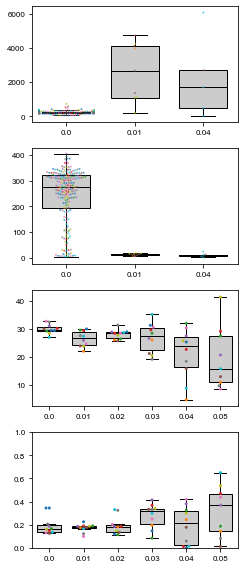

DURATIONS
F_onewayResult(statistic=143.77131880081302, pvalue=4.019811056719556e-40)
dfs_durations =211
EPISODE DURATIONS T-TESTS
Durations t-test between weight 0.0 and weight 0.01: Ttest_indResult(statistic=-20.11249499024549, pvalue=1.387048342021509e-50)
Durations t-test between weight 0.0 and weight 0.02: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.0 and weight 0.03: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.0 and weight 0.04: Ttest_indResult(statistic=-12.4251106671995, pvalue=9.883096504872062e-27)
Durations t-test between weight 0.0 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.01 and weight 0.02: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.01 and weight 0.03: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.01 and weight 0.04: Ttest_indResult(statistic=0.3810030343291562, pvalue=0.709860537580089)
Durat

'\nDURATIONS\nF_onewayResult(statistic=143.77131880081302, pvalue=4.019811056719556e-40)\ndfs_durations =211\nEPISODE DURATIONS T-TESTS\nDurations t-test between weight 0.0 and weight 0.01: Ttest_indResult(statistic=-20.11249499024549, pvalue=1.387048342021509e-50)\nDurations t-test between weight 0.0 and weight 0.02: Ttest_indResult(statistic=nan, pvalue=nan)\nDurations t-test between weight 0.0 and weight 0.03: Ttest_indResult(statistic=nan, pvalue=nan)\nDurations t-test between weight 0.0 and weight 0.04: Ttest_indResult(statistic=-12.4251106671995, pvalue=9.883096504872062e-27)\nDurations t-test between weight 0.0 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)\nDurations t-test between weight 0.01 and weight 0.02: Ttest_indResult(statistic=nan, pvalue=nan)\nDurations t-test between weight 0.01 and weight 0.03: Ttest_indResult(statistic=nan, pvalue=nan)\nDurations t-test between weight 0.01 and weight 0.04: Ttest_indResult(statistic=0.3810030343291562, pvalue=0.70986053

In [4]:
# Import pandas for data saving
import pandas as pd
import numpy as np
import json
import csv
import scipy.stats as stats
from pylab import *
from Analysis_tools import *
import seaborn as sns

%matplotlib inline

SMALL_SIZE = 10
FONT_STYLE = 'bold'
# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

dt = 0.1

cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

LINELENGTH = 0.5
LINEWIDTH = 1

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

MARKER_SIZE = 3

FONT_STYLE = 'bold'

fig, axes = plt.subplots(4, 1, figsize=(3.5, 8))

file_names = ['./JSONs/Analysis_Beat_and_Glide_base_0pt00_0.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_0.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_2.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_3.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_4.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_5.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_6.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_7.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_8.json',
              './JSONs/Analysis_Beat_and_Glide_base_0pt00_9.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt01_0.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt01_1.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt01_2.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt01_3.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt01_4.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt01_5.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt01_6.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt01_7.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt01_8.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt01_9.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt02_0.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt02_1.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt02_2.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt02_3.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt02_4.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt02_5.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt02_6.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt02_7.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt02_8.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt02_9.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt03_0.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt03_1.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt03_2.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt03_3.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt03_4.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt03_5.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt03_6.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt03_7.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt03_8.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt03_9.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt04_0.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt04_1.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt04_2.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt04_3.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt04_4.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt04_5.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt04_6.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt04_7.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt04_8.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt04_9.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt05_0.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt05_1.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt05_2.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt05_3.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt05_4.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt05_5.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt05_6.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt05_7.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt05_8.json',
              './JSONs/Analysis_Beat_and_Glide_SigmaP_0pt05_9.json']

somite_index = 9
i = 0

durations_dict=dict()
inter_events_dict = dict()
tail_beat_delays_dict = dict()
LR_mins_dict = dict()
average_frequency_dict = dict()
all_weights=[]

durations_df = pd.DataFrame(columns = ["Durations", "Weight", "Sim_index"])
inter_events_df = pd.DataFrame(columns = ["Inter_events", "Weight", "Sim_index"])
tail_beat_delays_df = pd.DataFrame(columns = ["Tail_beat_delays", "Weight", "Sim_index"])
average_frequency_df =  pd.DataFrame(columns = ["Average_frequency", "Weight", "Sim_index"])
LR_mins_df = pd.DataFrame(columns = ["LR_mins", "Weight", "Sim_index"])

for names in file_names:
    
    i=i+1
    
    f = open(names,)
    results = json.load(f)

    sim_index = names[names.find('.j')-1:names.find('.j')]
    
    all_durations = results['Events']['Duration (ms)']
    
    all_inter_events = results['Events']['Inter-event intervals']
    
    all_tail_beat_delays = results['Tail beat delay']['Computed tail beat time delay (ms)']
    
    all_average_frequency = results['Average frequency']['Average frequency (Hz)']
        
    all_LR_mins = results['Left/Right Xcorr min delay']['Computed L/R min']
    
    weight_str = names[names.find('pt')-1:names.find('pt')+4]
    weight = int(weight_str[0]) + int(weight_str[3:5])/100
        
    if weight not in all_weights:
        all_weights.append(weight)
        durations_dict[str(weight)] = []
        inter_events_dict[str(weight)] = []
        tail_beat_delays_dict[str(weight)] = []
        average_frequency_dict[str(weight)] = []
        LR_mins_dict[str(weight)] = []

    tail_beat_delays_to_add = all_tail_beat_delays[somite_index]
    average_frequency_to_add = all_average_frequency
    LR_mins_to_add = all_LR_mins[somite_index]
    
    durations_dict[str(weight)].extend(all_durations[1:])
    inter_events_dict[str(weight)].extend(all_inter_events)
    tail_beat_delays_dict[str(weight)].append(tail_beat_delays_to_add)
    average_frequency_dict[str(weight)].append(average_frequency_to_add)
    if LR_mins_to_add < 1.1:
        LR_mins_dict[str(weight)].append(LR_mins_to_add)
    
    temp_durations = list(zip(all_durations[1:], [weight for i in range(1, len(all_durations))], [sim_index for i in range(1, len(all_durations))]))
    temp_durations_df = pd.DataFrame(temp_durations, columns = ["Durations", "Weight", "Sim_index"]) 
    durations_df = durations_df.append(temp_durations_df)    
        
    temp_inter_events = list(zip(all_inter_events, [weight for i in range(0, len(all_inter_events))], [sim_index for i in range(0, len(all_inter_events))]))
    temp_inter_events_df = pd.DataFrame(temp_inter_events, columns = ["Inter_events", "Weight", "Sim_index"]) 
    inter_events_df = inter_events_df.append(temp_inter_events_df)  

    temp_tail_beat_delays = list(zip([tail_beat_delays_to_add], [weight] , [sim_index]))
    temp_tail_beat_delays_df = pd.DataFrame(temp_tail_beat_delays, columns = ["Tail_beat_delays", "Weight", "Sim_index"]) 
    tail_beat_delays_df = tail_beat_delays_df.append(temp_tail_beat_delays_df)
    
    temp_average_frequency = list(zip([average_frequency_to_add], [weight] , [sim_index]))
    temp_average_frequency_df = pd.DataFrame(temp_average_frequency, columns = ["Average_frequency", "Weight", "Sim_index"]) 
    average_frequency_df = average_frequency_df.append(temp_average_frequency_df)   
    
    if LR_mins_to_add < 1.1:
        temp_LR_mins = list(zip([LR_mins_to_add], [weight], [sim_index]))
        temp_LR_mins_df = pd.DataFrame(temp_LR_mins, columns = ["LR_mins", "Weight", "Sim_index"]) 
        LR_mins_df = LR_mins_df.append(temp_LR_mins_df)    
 
sns.swarmplot(ax=axes[0], x="Weight", y="Durations", data=durations_df, hue = "Sim_index", size = MARKER_SIZE-1, alpha = 0.7)
sns.swarmplot(ax=axes[1], x="Weight", y="Inter_events", data=inter_events_df, hue = "Sim_index", size = MARKER_SIZE-1, alpha = 0.7)
#sns.swarmplot(ax=axes[2], x="Weight", y="Tail_beat_delays", data=tail_beat_delays_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)
sns.swarmplot(ax=axes[2], x="Weight", y="Average_frequency", data=average_frequency_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)
sns.swarmplot(ax=axes[3], x="Weight", y="LR_mins", data=LR_mins_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)

WIDTH = 0.7
COLOR = '0.8'
LINEWIDTH = 1

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

sns.boxplot(ax=axes[0], x="Weight", y="Durations", data=durations_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[1], x="Weight", y="Inter_events", data=inter_events_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
#sns.boxplot(ax=axes[2], x="Weight", y="Tail_beat_delays", data=tail_beat_delays_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[2], x="Weight", y="Average_frequency", data=average_frequency_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[3], x="Weight", y="LR_mins", data=LR_mins_df, width = WIDTH, color=COLOR, linewidth = LINEWIDTH, showfliers = False, **PROPS)

#axes[0].axhspan(160., 200, facecolor='xkcd:light blue', alpha=0.5)
#axes[1].axhspan(360, 420, facecolor='xkcd:light blue', alpha=0.5)
#axes[2].axhspan(27, 30.3, facecolor='xkcd:light blue', alpha=0.5)
#axes[3].axhspan(0.19414659927532016, 0.2321524787383282, facecolor='xkcd:light blue', alpha=0.5)


axes[3].set_ylim(0, 1)

for ax in axes:
    ax.set_ylabel("")
    ax.legend([],[], frameon=False)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()): 
        item.set_fontsize(SMALL_SIZE)
    ax.set_xlabel('')
        
plt.tight_layout()

plt.savefig("SigmaP.png", dpi=1000)

plt.show()

# STATISTICAL TESTING

df_durations=[]
df_inter_events=[]
df_tail_beat_delays=[]
df_LR_mins=[]
df_average_frequency = []

dfs_durations = 0
dfs_inter_events=0
dfs_tail_beat_delays = 0
dfs_LR_mins = 0
dfs_average_frequency = 0

for i in all_weights:
    if len(durations_dict[str(i)]) > 0:
        df_durations.append(durations_dict[str(i)])
    if len(inter_events_dict[str(i)]) > 0:
        df_inter_events.append(inter_events_dict[str(i)])
    if len(tail_beat_delays_dict[str(i)]) > 0:
        df_tail_beat_delays.append(tail_beat_delays_dict[str(i)])
    if len(LR_mins_dict[str(i)]) > 0:
        df_LR_mins.append(LR_mins_dict[str(i)])
    if len(average_frequency_dict[str(i)]) > 0:
        df_average_frequency.append(average_frequency_dict[str(i)])

#test durations
print("DURATIONS")
print(stats.f_oneway(*df_durations))

for i in range(0, len(df_durations)):
    dfs_durations = dfs_durations + sum(len(df_durations[i]))

dfs_durations = dfs_durations - len(df_durations)
print("dfs_durations =" + str(dfs_durations))

print("EPISODE DURATIONS T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("Durations t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(durations_dict[str(all_weights[i])], durations_dict[str(all_weights[j])], nan_policy='omit')))

print("\n")        

print("INTER-EPISODE INTERVALS")
print(stats.f_oneway(*df_inter_events))

for i in range(0, len(df_inter_events)):
    dfs_inter_events = dfs_inter_events + sum(len(df_inter_events[i]))

dfs_inter_events = dfs_inter_events - len(df_inter_events)

print("dfs_inter_events =" + str(dfs_inter_events))

print("INTER-EPISODE INTERVALS T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("inter_events t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(inter_events_dict[str(all_weights[i])], inter_events_dict[str(all_weights[j])], nan_policy='omit')))
print("\n")
        
print("TIME DELAY AT PEAK AUTOCORRELATION")
print(stats.f_oneway(*df_tail_beat_delays))

for i in range(0, len(df_tail_beat_delays)):
    dfs_tail_beat_delays = dfs_tail_beat_delays + sum(len(df_tail_beat_delays[i]))

dfs_tail_beat_delays = dfs_tail_beat_delays - len(df_tail_beat_delays)

print("dfs_tail_beat_delays =" + str(dfs_tail_beat_delays))

print("TIME DELAY T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("tail_beat_delays t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(tail_beat_delays_dict[str(all_weights[i])], tail_beat_delays_dict[str(all_weights[j])])))

print("\n")
        
print("AVERAGE FREQUENCY")
#remove all NaN
for i,values in enumerate(all_weights):
    df_average_frequency[i] = [x for x in df_average_frequency[i] if math.isnan(x) == False]

print(stats.f_oneway(*df_average_frequency))

for i in range(0, len(df_average_frequency)):
    dfs_average_frequency = dfs_average_frequency + sum(len(df_average_frequency[i]))

dfs_average_frequency = dfs_average_frequency - len(df_average_frequency)

print("dfs_average_frequency =" + str(dfs_average_frequency))

print("AVERAGE FREQUENCY T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("average_frequency t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(average_frequency_dict[str(all_weights[i])], 
                                    average_frequency_dict[str(all_weights[j])], nan_policy = 'omit')))

print("\n")           
            
print("MINIMUM OF LEFT-RIGHT CROSS-CORRELATION")
print(stats.f_oneway(*df_LR_mins))

for i in range(0, len(df_LR_mins)):
    dfs_LR_mins = dfs_LR_mins + sum(len(df_LR_mins[i]))

dfs_LR_mins = dfs_LR_mins - len(df_LR_mins)

print("dfs_LR_mins =" + str(dfs_LR_mins))

print("MINIMUM OF LEFT-RIGHT CROSS-CORRELATION T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("LR_mins t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(LR_mins_dict[str(all_weights[i])], LR_mins_dict[str(all_weights[j])], nan_policy = 'omit')))


'''
DURATIONS
F_onewayResult(statistic=143.77131880081302, pvalue=4.019811056719556e-40)
dfs_durations =211
EPISODE DURATIONS T-TESTS
Durations t-test between weight 0.0 and weight 0.01: Ttest_indResult(statistic=-20.11249499024549, pvalue=1.387048342021509e-50)
Durations t-test between weight 0.0 and weight 0.02: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.0 and weight 0.03: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.0 and weight 0.04: Ttest_indResult(statistic=-12.4251106671995, pvalue=9.883096504872062e-27)
Durations t-test between weight 0.0 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.01 and weight 0.02: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.01 and weight 0.03: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.01 and weight 0.04: Ttest_indResult(statistic=0.3810030343291562, pvalue=0.709860537580089)
Durations t-test between weight 0.01 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.02 and weight 0.03: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.02 and weight 0.04: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.02 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.03 and weight 0.04: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.03 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)
Durations t-test between weight 0.04 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)


INTER-EPISODE INTERVALS
F_onewayResult(statistic=32.28723566176306, pvalue=5.842333395478001e-13)
dfs_inter_events =211
INTER-EPISODE INTERVALS T-TESTS
inter_events t-test between weight 0.0 and weight 0.01: Ttest_indResult(statistic=6.437187764380891, pvalue=8.327040231465892e-10)
inter_events t-test between weight 0.0 and weight 0.02: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.0 and weight 0.03: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.0 and weight 0.04: Ttest_indResult(statistic=4.840582208616039, pvalue=2.5603155462613843e-06)
inter_events t-test between weight 0.0 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.01 and weight 0.02: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.01 and weight 0.03: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.01 and weight 0.04: Ttest_indResult(statistic=0.5934560860377919, pvalue=0.563894787572033)
inter_events t-test between weight 0.01 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.02 and weight 0.03: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.02 and weight 0.04: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.02 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.03 and weight 0.04: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.03 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)
inter_events t-test between weight 0.04 and weight 0.05: Ttest_indResult(statistic=nan, pvalue=nan)


TIME DELAY AT PEAK AUTOCORRELATION
F_onewayResult(statistic=4.819231428495262, pvalue=0.001026668404983751)
dfs_tail_beat_delays =54
TIME DELAY T-TESTS
tail_beat_delays t-test between weight 0.0 and weight 0.01: Ttest_indResult(statistic=-3.1823048479077487, pvalue=0.005159248956582833)
tail_beat_delays t-test between weight 0.0 and weight 0.02: Ttest_indResult(statistic=-3.510399053279824, pvalue=0.0024983630811429747)
tail_beat_delays t-test between weight 0.0 and weight 0.03: Ttest_indResult(statistic=-3.3591995313739367, pvalue=0.003493130127122041)
tail_beat_delays t-test between weight 0.0 and weight 0.04: Ttest_indResult(statistic=-2.507479920819453, pvalue=0.021963704891873957)
tail_beat_delays t-test between weight 0.0 and weight 0.05: Ttest_indResult(statistic=-0.9901716804428121, pvalue=0.33521489759918977)
tail_beat_delays t-test between weight 0.01 and weight 0.02: Ttest_indResult(statistic=-0.726461440183425, pvalue=0.4768975236654125)
tail_beat_delays t-test between weight 0.01 and weight 0.03: Ttest_indResult(statistic=-1.505304825671614, pvalue=0.149592102043749)
tail_beat_delays t-test between weight 0.01 and weight 0.04: Ttest_indResult(statistic=-0.2888247498330569, pvalue=0.776015419298821)
tail_beat_delays t-test between weight 0.01 and weight 0.05: Ttest_indResult(statistic=2.29672544753727, pvalue=0.03385169633596771)
tail_beat_delays t-test between weight 0.02 and weight 0.03: Ttest_indResult(statistic=-1.308126416285799, pvalue=0.20729004683067015)
tail_beat_delays t-test between weight 0.02 and weight 0.04: Ttest_indResult(statistic=-0.052046168079290835, pvalue=0.9590651567882689)
tail_beat_delays t-test between weight 0.02 and weight 0.05: Ttest_indResult(statistic=2.6746754428437964, pvalue=0.015460230554740363)
tail_beat_delays t-test between weight 0.03 and weight 0.04: Ttest_indResult(statistic=0.9406507336852306, pvalue=0.35933725338258415)
tail_beat_delays t-test between weight 0.03 and weight 0.05: Ttest_indResult(statistic=2.694967330869722, pvalue=0.014809063492099876)
tail_beat_delays t-test between weight 0.04 and weight 0.05: Ttest_indResult(statistic=1.7510368514144017, pvalue=0.09696240348855649)


AVERAGE FREQUENCY
F_onewayResult(statistic=4.031391038123327, pvalue=0.0035695772177471523)
dfs_average_frequency =53
AVERAGE FREQUENCY T-TESTS
average_frequency t-test between weight 0.0 and weight 0.01: Ttest_indResult(statistic=3.423384859516051, pvalue=0.003030375224853918)
average_frequency t-test between weight 0.0 and weight 0.02: Ttest_indResult(statistic=2.4856024131985923, pvalue=0.022985132586972316)
average_frequency t-test between weight 0.0 and weight 0.03: Ttest_indResult(statistic=1.7866855531257457, pvalue=0.09084224228824658)
average_frequency t-test between weight 0.0 and weight 0.04: Ttest_indResult(statistic=3.0237737841199475, pvalue=0.007297904400224344)
average_frequency t-test between weight 0.0 and weight 0.05: Ttest_indResult(statistic=2.9262309455527507, pvalue=0.009423423442894027)
average_frequency t-test between weight 0.01 and weight 0.02: Ttest_indResult(statistic=-1.6084072735293524, pvalue=0.1251443741123278)
average_frequency t-test between weight 0.01 and weight 0.03: Ttest_indResult(statistic=-0.240929830607985, pvalue=0.8123324612118454)
average_frequency t-test between weight 0.01 and weight 0.04: Ttest_indResult(statistic=1.7591941342495776, pvalue=0.09553122812652684)
average_frequency t-test between weight 0.01 and weight 0.05: Ttest_indResult(statistic=1.881503635278118, pvalue=0.0771416821177669)
average_frequency t-test between weight 0.02 and weight 0.03: Ttest_indResult(statistic=0.6939203660563324, pvalue=0.4965907748325229)
average_frequency t-test between weight 0.02 and weight 0.04: Ttest_indResult(statistic=2.3753404279118726, pvalue=0.028848356361671438)
average_frequency t-test between weight 0.02 and weight 0.05: Ttest_indResult(statistic=2.390146333018764, pvalue=0.028692347816857717)
average_frequency t-test between weight 0.03 and weight 0.04: Ttest_indResult(statistic=1.7314591068276524, pvalue=0.10047332307382617)
average_frequency t-test between weight 0.03 and weight 0.05: Ttest_indResult(statistic=1.8573045409716524, pvalue=0.0806788054266215)
average_frequency t-test between weight 0.04 and weight 0.05: Ttest_indResult(statistic=0.32690137637695393, pvalue=0.7477330793671793)


MINIMUM OF LEFT-RIGHT CROSS-CORRELATION
F_onewayResult(statistic=2.059859689093592, pvalue=0.08509828476619612)
dfs_LR_mins =53
MINIMUM OF LEFT-RIGHT CROSS-CORRELATION T-TESTS
LR_mins t-test between weight 0.0 and weight 0.01: Ttest_indResult(statistic=0.8071693780946934, pvalue=0.43010631439279967)
LR_mins t-test between weight 0.0 and weight 0.02: Ttest_indResult(statistic=0.06677477670037585, pvalue=0.9474971126606042)
LR_mins t-test between weight 0.0 and weight 0.03: Ttest_indResult(statistic=-1.9256913872555923, pvalue=0.07008898515999935)
LR_mins t-test between weight 0.0 and weight 0.04: Ttest_indResult(statistic=0.026172072086710674, pvalue=0.9794080696185099)
LR_mins t-test between weight 0.0 and weight 0.05: Ttest_indResult(statistic=-1.673453289043384, pvalue=0.11253734393731413)
LR_mins t-test between weight 0.01 and weight 0.02: Ttest_indResult(statistic=-0.766785231713113, pvalue=0.45314951056449226)
LR_mins t-test between weight 0.01 and weight 0.03: Ttest_indResult(statistic=-2.9729282758200095, pvalue=0.008151016352372411)
LR_mins t-test between weight 0.01 and weight 0.04: Ttest_indResult(statistic=-0.40970257420244227, pvalue=0.6868587281203082)
LR_mins t-test between weight 0.01 and weight 0.05: Ttest_indResult(statistic=-2.097898660199945, pvalue=0.05116750554213504)
LR_mins t-test between weight 0.02 and weight 0.03: Ttest_indResult(statistic=-2.0336364172674295, pvalue=0.05700030569598287)
LR_mins t-test between weight 0.02 and weight 0.04: Ttest_indResult(statistic=-0.015503200223039321, pvalue=0.9878012795806134)
LR_mins t-test between weight 0.02 and weight 0.05: Ttest_indResult(statistic=-1.7204712020747117, pvalue=0.10349575584433604)
LR_mins t-test between weight 0.03 and weight 0.04: Ttest_indResult(statistic=1.356810311180206, pvalue=0.1916147151693641)
LR_mins t-test between weight 0.03 and weight 0.05: Ttest_indResult(statistic=-0.5675177822039439, pvalue=0.5777809754072548)
LR_mins t-test between weight 0.04 and weight 0.05: Ttest_indResult(statistic=-1.4389563835606602, pvalue=0.16832094750036658)
'''


## Analyzing and plotting results for SigmaW (Figure 9I-L)

This block will take pre-analyzed simulations (in .json files) and plot the results as well as calculate averages and standard deviations at different weights, run ANOVA and t-tests.  The .json files must have a particular structure as set by the block of code that analyzes simulations (see above in this notebook).  This block analyzes for SigmaW (because it outputs a file called SigmaW.png) but can really be used for any type of sensitivity testing. You just have to change the name of the output file

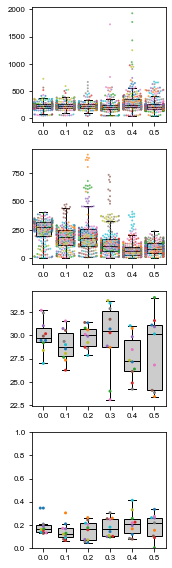

DURATIONS
F_onewayResult(statistic=13.511971671669858, pvalue=6.783773462103496e-13)
dfs_durations =1400
EPISODE DURATIONS T-TESTS
Durations t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=-0.13586308141076398, pvalue=0.8919932496430614)
Durations t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=0.21480346189748487, pvalue=0.8300273536106625)
Durations t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=0.5786926929744096, pvalue=0.5630828870177154)
Durations t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-4.485520757636786, pvalue=9.274646622478348e-06)
Durations t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-1.0499205126427953, pvalue=0.29430834058548894)
Durations t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=0.374369545171799, pvalue=0.7083093399403642)
Durations t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=0.7287919053244246, pvalue=0.46647

'\nDURATIONS\nF_onewayResult(statistic=13.511971671669858, pvalue=6.783773462103496e-13)\ndfs_durations =1400\nEPISODE DURATIONS T-TESTS\nDurations t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=-0.13586308141076398, pvalue=0.8919932496430614)\nDurations t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=0.21480346189748487, pvalue=0.8300273536106625)\nDurations t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=0.5786926929744096, pvalue=0.5630828870177154)\nDurations t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-4.485520757636786, pvalue=9.274646622478348e-06)\nDurations t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-1.0499205126427953, pvalue=0.29430834058548894)\nDurations t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=0.374369545171799, pvalue=0.7083093399403642)\nDurations t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=0.7287919053244246, p

In [5]:
# Import pandas for data saving
import pandas as pd
import numpy as np
import json
import csv
import scipy.stats as stats
from pylab import *
from Analysis_tools import *
import seaborn as sns

%matplotlib inline

SMALL_SIZE = 10
FONT_STYLE = 'bold'
# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

dt = 0.1

cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

LINELENGTH = 0.5
LINEWIDTH = 1

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

MARKER_SIZE = 3

FONT_STYLE = 'bold'

fig, axes = plt.subplots(4, 1, figsize=(2.5, 8))

file_names = ['./JSONs/Analysis_Beat_and_glide_base_0pt00_0.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_0.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_2.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_3.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_4.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_5.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_6.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_7.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_8.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_9.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt10_0.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt10_1.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt10_2.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt10_3.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt10_4.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt10_5.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt10_6.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt10_7.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt10_8.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt10_9.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt20_0.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt20_1.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt20_2.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt20_3.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt20_4.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt20_5.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt20_6.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt20_7.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt20_8.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt20_9.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt30_0.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt30_1.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt30_2.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt30_3.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt30_4.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt30_5.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt30_6.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt30_7.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt30_8.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt30_9.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt40_0.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt40_1.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt40_2.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt40_3.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt40_4.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt40_5.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt40_6.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt40_7.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt40_8.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt40_9.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt50_0.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt50_1.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt50_2.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt50_3.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt50_4.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt50_5.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt50_6.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt50_7.json',
              #'./JSONs/Analysis_Beat_and_glide_SigmaW_0pt50_8.json',
              './JSONs/Analysis_Beat_and_glide_SigmaW_0pt50_9.json']

somite_index = 9
i = 0

durations_dict=dict()
inter_events_dict = dict()
tail_beat_delays_dict = dict()
LR_mins_dict = dict()
average_frequency_dict = dict()
all_weights=[]

durations_df = pd.DataFrame(columns = ["Durations", "Weight", "Sim_index"])
inter_events_df = pd.DataFrame(columns = ["Inter_events", "Weight", "Sim_index"])
tail_beat_delays_df = pd.DataFrame(columns = ["Tail_beat_delays", "Weight", "Sim_index"])
average_frequency_df =  pd.DataFrame(columns = ["Average_frequency", "Weight", "Sim_index"])
LR_mins_df = pd.DataFrame(columns = ["LR_mins", "Weight", "Sim_index"])

for names in file_names:
    
    i=i+1
    
    f = open(names,)
    results = json.load(f)

    sim_index = names[names.find('.j')-1:names.find('.j')]
    
    all_durations = results['Events']['Duration (ms)']
    
    all_inter_events = results['Events']['Inter-event intervals']
    
    all_tail_beat_delays = results['Tail beat delay']['Computed tail beat time delay (ms)']
    
    all_average_frequency = results['Average frequency']['Average frequency (Hz)']
        
    all_LR_mins = results['Left/Right Xcorr min delay']['Computed L/R min']
    
    weight_str = names[names.find('pt')-1:names.find('pt')+4]
    weight = int(weight_str[0]) + int(weight_str[3:5])/100
        
    if weight not in all_weights:
        all_weights.append(weight)
        durations_dict[str(weight)] = []
        inter_events_dict[str(weight)] = []
        tail_beat_delays_dict[str(weight)] = []
        average_frequency_dict[str(weight)] = []
        LR_mins_dict[str(weight)] = []

    tail_beat_delays_to_add = all_tail_beat_delays[somite_index]
    average_frequency_to_add = all_average_frequency
    LR_mins_to_add = all_LR_mins[somite_index]
    
    durations_dict[str(weight)].extend(all_durations[1:])
    inter_events_dict[str(weight)].extend(all_inter_events)
    tail_beat_delays_dict[str(weight)].append(tail_beat_delays_to_add)
    average_frequency_dict[str(weight)].append(average_frequency_to_add)
    if LR_mins_to_add < 1.1:
        LR_mins_dict[str(weight)].append(LR_mins_to_add)
    
    temp_durations = list(zip(all_durations[1:], [weight for i in range(1, len(all_durations))], [sim_index for i in range(1, len(all_durations))]))
    temp_durations_df = pd.DataFrame(temp_durations, columns = ["Durations", "Weight", "Sim_index"]) 
    durations_df = durations_df.append(temp_durations_df)    
        
    temp_inter_events = list(zip(all_inter_events, [weight for i in range(0, len(all_inter_events))], [sim_index for i in range(0, len(all_inter_events))]))
    temp_inter_events_df = pd.DataFrame(temp_inter_events, columns = ["Inter_events", "Weight", "Sim_index"]) 
    inter_events_df = inter_events_df.append(temp_inter_events_df)  

    temp_tail_beat_delays = list(zip([tail_beat_delays_to_add], [weight] , [sim_index]))
    temp_tail_beat_delays_df = pd.DataFrame(temp_tail_beat_delays, columns = ["Tail_beat_delays", "Weight", "Sim_index"]) 
    tail_beat_delays_df = tail_beat_delays_df.append(temp_tail_beat_delays_df)
    
    temp_average_frequency = list(zip([average_frequency_to_add], [weight] , [sim_index]))
    temp_average_frequency_df = pd.DataFrame(temp_average_frequency, columns = ["Average_frequency", "Weight", "Sim_index"]) 
    average_frequency_df = average_frequency_df.append(temp_average_frequency_df)   
    
    if LR_mins_to_add < 1.1:
        temp_LR_mins = list(zip([LR_mins_to_add], [weight], [sim_index]))
        temp_LR_mins_df = pd.DataFrame(temp_LR_mins, columns = ["LR_mins", "Weight", "Sim_index"]) 
        LR_mins_df = LR_mins_df.append(temp_LR_mins_df)    
 
sns.swarmplot(ax=axes[0], x="Weight", y="Durations", data=durations_df, hue = "Sim_index", size = MARKER_SIZE-1, alpha = 0.7)
sns.swarmplot(ax=axes[1], x="Weight", y="Inter_events", data=inter_events_df, hue = "Sim_index", size = MARKER_SIZE-1, alpha = 0.7)
#sns.swarmplot(ax=axes[2], x="Weight", y="Tail_beat_delays", data=tail_beat_delays_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)
sns.swarmplot(ax=axes[2], x="Weight", y="Average_frequency", data=average_frequency_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)
sns.swarmplot(ax=axes[3], x="Weight", y="LR_mins", data=LR_mins_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)

WIDTH = 0.7
COLOR = '0.8'
LINEWIDTH = 1

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

sns.boxplot(ax=axes[0], x="Weight", y="Durations", data=durations_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[1], x="Weight", y="Inter_events", data=inter_events_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
#sns.boxplot(ax=axes[2], x="Weight", y="Tail_beat_delays", data=tail_beat_delays_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[2], x="Weight", y="Average_frequency", data=average_frequency_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[3], x="Weight", y="LR_mins", data=LR_mins_df, width = WIDTH, color=COLOR, linewidth = LINEWIDTH, showfliers = False, **PROPS)

#axes[0].axhspan(160., 200, facecolor='xkcd:light blue', alpha=0.5)
#axes[1].axhspan(360, 420, facecolor='xkcd:light blue', alpha=0.5)
#axes[2].axhspan(27, 30.3, facecolor='xkcd:light blue', alpha=0.5)
#axes[3].axhspan(0.19414659927532016, 0.2321524787383282, facecolor='xkcd:light blue', alpha=0.5)


axes[3].set_ylim(0, 1)

for ax in axes:
    ax.set_ylabel("")
    ax.legend([],[], frameon=False)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()): 
        item.set_fontsize(SMALL_SIZE)
    ax.set_xlabel('')
        
plt.tight_layout()

plt.savefig("SigmaW.png", dpi=1000)

plt.show()

# STATISTICAL TESTING

df_durations=[]
df_inter_events=[]
df_tail_beat_delays=[]
df_LR_mins=[]
df_average_frequency = []

dfs_durations = 0
dfs_inter_events=0
dfs_tail_beat_delays = 0
dfs_LR_mins = 0
dfs_average_frequency = 0

for i in all_weights:
    df_durations.append(durations_dict[str(i)])
    df_inter_events.append(inter_events_dict[str(i)])
    df_tail_beat_delays.append(tail_beat_delays_dict[str(i)])
    df_LR_mins.append(LR_mins_dict[str(i)])
    df_average_frequency.append(average_frequency_dict[str(i)])

    
#test durations
print("DURATIONS")
print(stats.f_oneway(*df_durations))

for i in range(0, len(all_weights)):
    dfs_durations = dfs_durations + sum(len(df_durations[i]))

dfs_durations = dfs_durations - len(df_durations)
print("dfs_durations =" + str(dfs_durations))

print("EPISODE DURATIONS T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("Durations t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(durations_dict[str(all_weights[i])], durations_dict[str(all_weights[j])])))

print("\n")        

print("INTER-EPISODE INTERVALS")
print(stats.f_oneway(*df_inter_events))

for i in range(0, len(all_weights)):
    dfs_inter_events = dfs_inter_events + sum(len(df_inter_events[i]))

dfs_inter_events = dfs_inter_events - len(df_inter_events)

print("dfs_inter_events =" + str(dfs_inter_events))

print("INTER-EPISODE INTERVALS T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("inter_events t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(inter_events_dict[str(all_weights[i])], inter_events_dict[str(all_weights[j])])))
print("\n")
        
print("TIME DELAY AT PEAK AUTOCORRELATION")
print(stats.f_oneway(*df_tail_beat_delays))

for i in range(0, len(all_weights)):
    dfs_tail_beat_delays = dfs_tail_beat_delays + sum(len(df_tail_beat_delays[i]))

dfs_tail_beat_delays = dfs_tail_beat_delays - len(df_tail_beat_delays)

print("dfs_tail_beat_delays =" + str(dfs_tail_beat_delays))

print("TIME DELAY T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("tail_beat_delays t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(tail_beat_delays_dict[str(all_weights[i])], tail_beat_delays_dict[str(all_weights[j])])))

print("\n")
        
print("AVERAGE FREQUENCY")
print(stats.f_oneway(*df_average_frequency))

for i in range(0, len(all_weights)):
    dfs_average_frequency = dfs_average_frequency + sum(len(df_average_frequency[i]))

dfs_average_frequency = dfs_average_frequency - len(df_average_frequency)

print("dfs_average_frequency =" + str(dfs_average_frequency))

print("AVERAGE FREQUENCY T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("average_frequency t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(average_frequency_dict[str(all_weights[i])], average_frequency_dict[str(all_weights[j])])))

print("\n")           
            
print("MINIMUM OF LEFT-RIGHT CROSS-CORRELATION")
print(stats.f_oneway(*df_LR_mins))

for i in range(0, len(all_weights)):
    dfs_LR_mins = dfs_LR_mins + sum(len(df_LR_mins[i]))

dfs_LR_mins = dfs_LR_mins - len(df_LR_mins)

print("dfs_LR_mins =" + str(dfs_LR_mins))

print("MINIMUM OF LEFT-RIGHT CROSS-CORRELATION T-TESTS")
for i in range (0, len(all_weights)):
    for j in range (i+1, len(all_weights)):
        print("LR_mins t-test between weight " + str(all_weights[i]) + " and weight " + str(all_weights[j]) + ": "
              + str(stats.ttest_ind(LR_mins_dict[str(all_weights[i])], LR_mins_dict[str(all_weights[j])])))

'''
DURATIONS
F_onewayResult(statistic=13.511971671669858, pvalue=6.783773462103496e-13)
dfs_durations =1400
EPISODE DURATIONS T-TESTS
Durations t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=-0.13586308141076398, pvalue=0.8919932496430614)
Durations t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=0.21480346189748487, pvalue=0.8300273536106625)
Durations t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=0.5786926929744096, pvalue=0.5630828870177154)
Durations t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-4.485520757636786, pvalue=9.274646622478348e-06)
Durations t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-1.0499205126427953, pvalue=0.29430834058548894)
Durations t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=0.374369545171799, pvalue=0.7083093399403642)
Durations t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=0.7287919053244246, pvalue=0.4664799998476642)
Durations t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=-4.755091510234297, pvalue=2.634242070859897e-06)
Durations t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=-1.0136128090511656, pvalue=0.3112688014064724)
Durations t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=0.43645419244436134, pvalue=0.6627089373336058)
Durations t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=-4.743192986915612, pvalue=2.8181935094947846e-06)
Durations t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=-1.2755841227688258, pvalue=0.20273265777567354)
Durations t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=-4.996133133874902, pvalue=8.094489147346973e-07)
Durations t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=-1.5018623495775159, pvalue=0.1337455345936513)
Durations t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=4.112235885595381, pvalue=4.57504922682709e-05)


INTER-EPISODE INTERVALS
F_onewayResult(statistic=74.5197618089822, pvalue=2.482643421853422e-69)
dfs_inter_events =1400
INTER-EPISODE INTERVALS T-TESTS
inter_events t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=6.007690326139981, pvalue=4.019798466407084e-09)
inter_events t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=1.5238805121259535, pvalue=0.12830949338134315)
inter_events t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=8.151228181772822, pvalue=3.5230724211233563e-15)
inter_events t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=17.920801001891647, pvalue=1.9580315686613066e-54)
inter_events t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=20.205051704989742, pvalue=2.2498009158997227e-65)
inter_events t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-2.708035238654797, pvalue=0.00703144885603864)
inter_events t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=3.1108451079144186, pvalue=0.0019752100628145754)
inter_events t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=11.693716308461891, pvalue=6.168532795844101e-28)
inter_events t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=12.877980575899304, pvalue=6.970873612704071e-33)
inter_events t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=4.878463691363371, pvalue=1.4690499456512644e-06)
inter_events t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=10.487506822397338, pvalue=3.373468043680266e-23)
inter_events t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=10.946380166452823, pvalue=5.389743472650823e-25)
inter_events t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=6.46305822740894, pvalue=2.436299139137736e-10)
inter_events t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=6.620564116882085, pvalue=9.008805532982811e-11)
inter_events t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=-0.7862545121551071, pvalue=0.43208790503182715)


TIME DELAY AT PEAK AUTOCORRELATION
F_onewayResult(statistic=1.0909983081980097, pvalue=0.3762268066404246)
dfs_tail_beat_delays =53
TIME DELAY T-TESTS
tail_beat_delays t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=1.7074186681013623, pvalue=0.10493439092597003)
tail_beat_delays t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=0.4972874272961824, pvalue=0.6250061153363491)
tail_beat_delays t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=0.1990360431820698, pvalue=0.8444655262306181)
tail_beat_delays t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-0.40699681790174025, pvalue=0.6888092687098613)
tail_beat_delays t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-0.017286550139286504, pvalue=0.9864092796969764)
tail_beat_delays t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-1.2828160982172112, pvalue=0.21582961527799957)
tail_beat_delays t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=-1.7315528935527784, pvalue=0.10045624539276163)
tail_beat_delays t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=-2.6297179980331817, pvalue=0.017001491122023378)
tail_beat_delays t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=-2.1644348675294607, pvalue=0.044954242765674085)
tail_beat_delays t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=-0.3348710992581758, pvalue=0.7415930953928696)
tail_beat_delays t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=-1.0128615808922194, pvalue=0.3245485590575743)
tail_beat_delays t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=-0.5827205178490655, pvalue=0.5677311743620262)
tail_beat_delays t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=-0.6824673710309701, pvalue=0.5036324506339811)
tail_beat_delays t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=-0.24626205933750056, pvalue=0.8084282489579642)
tail_beat_delays t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=0.4462438535783104, pvalue=0.6610528707619587)


AVERAGE FREQUENCY
F_onewayResult(statistic=1.2090337512003972, pvalue=0.3177308065403162)
dfs_average_frequency =53
AVERAGE FREQUENCY T-TESTS
average_frequency t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=1.9798027061136745, pvalue=0.06322504715687753)
average_frequency t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=-0.03175039678908335, pvalue=0.9750205180449915)
average_frequency t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=-0.5616137427920296, pvalue=0.581305210910814)
average_frequency t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=0.3044870440743856, pvalue=0.7642491175905108)
average_frequency t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=-0.9388588722735272, pvalue=0.36095221757269924)
average_frequency t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-1.928850250730471, pvalue=0.06967073887163995)
average_frequency t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=-1.8602464647991444, pvalue=0.07927062170575144)
average_frequency t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=-1.337484456688851, pvalue=0.19772049897795507)
average_frequency t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=-1.8400084765641291, pvalue=0.08329413752872672)
average_frequency t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=-0.5299451436508014, pvalue=0.6026263426155962)
average_frequency t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=0.32351420673252, pvalue=0.7500342925168899)
average_frequency t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=-0.9142780766934532, pvalue=0.3733567862636914)
average_frequency t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=0.7424064118022713, pvalue=0.46741956948123875)
average_frequency t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=-0.4779682622816136, pvalue=0.6387611105953492)
average_frequency t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=-1.0599358954609115, pvalue=0.30400176693430514)


MINIMUM OF LEFT-RIGHT CROSS-CORRELATION
F_onewayResult(statistic=0.8087909177104734, pvalue=0.5486187662179629)
dfs_LR_mins =53
MINIMUM OF LEFT-RIGHT CROSS-CORRELATION T-TESTS
LR_mins t-test between weight 0.0 and weight 0.1: Ttest_indResult(statistic=1.497484304601276, pvalue=0.15159817486222762)
LR_mins t-test between weight 0.0 and weight 0.2: Ttest_indResult(statistic=1.2287793399845055, pvalue=0.2349779323048582)
LR_mins t-test between weight 0.0 and weight 0.3: Ttest_indResult(statistic=0.4588998718619449, pvalue=0.6517990053496208)
LR_mins t-test between weight 0.0 and weight 0.4: Ttest_indResult(statistic=-0.28183972186301254, pvalue=0.7812811612972677)
LR_mins t-test between weight 0.0 and weight 0.5: Ttest_indResult(statistic=0.16927800350124567, pvalue=0.8675759130955746)
LR_mins t-test between weight 0.1 and weight 0.2: Ttest_indResult(statistic=-0.18604957522502796, pvalue=0.854486513691395)
LR_mins t-test between weight 0.1 and weight 0.3: Ttest_indResult(statistic=-1.0268622820875575, pvalue=0.31808772218710274)
LR_mins t-test between weight 0.1 and weight 0.4: Ttest_indResult(statistic=-1.5728096124124271, pvalue=0.13317506939052662)
LR_mins t-test between weight 0.1 and weight 0.5: Ttest_indResult(statistic=-1.0701441887608067, pvalue=0.29951388353650027)
LR_mins t-test between weight 0.2 and weight 0.3: Ttest_indResult(statistic=-0.7842010959056781, pvalue=0.4431204072073176)
LR_mins t-test between weight 0.2 and weight 0.4: Ttest_indResult(statistic=-1.347662527446911, pvalue=0.19448585688402023)
LR_mins t-test between weight 0.2 and weight 0.5: Ttest_indResult(statistic=-0.8693180786943269, pvalue=0.3967813240098542)
LR_mins t-test between weight 0.3 and weight 0.4: Ttest_indResult(statistic=-0.6812122893384334, pvalue=0.5044075809155469)
LR_mins t-test between weight 0.3 and weight 0.5: Ttest_indResult(statistic=-0.21613119047665205, pvalue=0.8314576180386176)
LR_mins t-test between weight 0.4 and weight 0.5: Ttest_indResult(statistic=0.395051431406214, pvalue=0.6977177588903893)
'''

### Statistics for base model

In [2]:
# Import pandas for data saving
import pandas as pd
import numpy as np
import json
import csv
import scipy.stats as stats
from pylab import *
from Analysis_tools import *
import seaborn as sns

%matplotlib inline

SMALL_SIZE = 10
FONT_STYLE = 'bold'
# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

dt = 0.1


file_names = ['./JSONs/Analysis_Beat_and_glide_base_0pt00_0.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_0.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_2.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_3.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_4.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_5.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_6.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_7.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_8.json',
              './JSONs/Analysis_Beat_and_glide_base_0pt00_9.json']

i = 0
somite_index = 9

durations_dict=dict()
inter_events_dict = dict()
tail_beat_delays_dict = dict()
LR_mins_dict = dict()
average_frequency_dict = dict()
all_weights=[]

durations_df = pd.DataFrame(columns = ["Durations", "Weight", "Sim_index"])
inter_events_df = pd.DataFrame(columns = ["Inter_events", "Weight", "Sim_index"])
tail_beat_delays_df = pd.DataFrame(columns = ["Tail_beat_delays", "Weight", "Sim_index"])
average_frequency_df =  pd.DataFrame(columns = ["Average_frequency", "Weight", "Sim_index"])
LR_mins_df = pd.DataFrame(columns = ["LR_mins", "Weight", "Sim_index"])

for names in file_names:
    
    i=i+1
    
    f = open(names,)
    results = json.load(f)

    sim_index = names[names.find('.j')-1:names.find('.j')]
    
    all_durations = results['Events']['Duration (ms)']
    
    all_inter_events = results['Events']['Inter-event intervals']
    
    all_tail_beat_delays = results['Tail beat delay']['Computed tail beat time delay (ms)']
    
    all_average_frequency = results['Average frequency']['Average frequency (Hz)']
        
    all_LR_mins = results['Left/Right Xcorr min delay']['Computed L/R min']
    
    weight_str = names[names.find('pt')-1:names.find('pt')+4]
    weight = int(weight_str[0]) + int(weight_str[3:5])/100
        
    if weight not in all_weights:
        all_weights.append(weight)
        durations_dict[str(weight)] = []
        inter_events_dict[str(weight)] = []
        tail_beat_delays_dict[str(weight)] = []
        average_frequency_dict[str(weight)] = []
        LR_mins_dict[str(weight)] = []

    tail_beat_delays_to_add = all_tail_beat_delays[somite_index]
    average_frequency_to_add = all_average_frequency
    LR_mins_to_add = all_LR_mins[somite_index]
    
    durations_dict[str(weight)].extend(all_durations[1:])
    inter_events_dict[str(weight)].extend(all_inter_events)
    tail_beat_delays_dict[str(weight)].append(tail_beat_delays_to_add)
    average_frequency_dict[str(weight)].append(average_frequency_to_add)
    if LR_mins_to_add < 1.1:
        LR_mins_dict[str(weight)].append(LR_mins_to_add)
    
    temp_durations = list(zip(all_durations[1:], [weight for i in range(1, len(all_durations))], [sim_index for i in range(1, len(all_durations))]))
    temp_durations_df = pd.DataFrame(temp_durations, columns = ["Durations", "Weight", "Sim_index"]) 
    durations_df = durations_df.append(temp_durations_df)    
        
    temp_inter_events = list(zip(all_inter_events, [weight for i in range(0, len(all_inter_events))], [sim_index for i in range(0, len(all_inter_events))]))
    temp_inter_events_df = pd.DataFrame(temp_inter_events, columns = ["Inter_events", "Weight", "Sim_index"]) 
    inter_events_df = inter_events_df.append(temp_inter_events_df)  

    temp_tail_beat_delays = list(zip([tail_beat_delays_to_add], [weight] , [sim_index]))
    temp_tail_beat_delays_df = pd.DataFrame(temp_tail_beat_delays, columns = ["Tail_beat_delays", "Weight", "Sim_index"]) 
    tail_beat_delays_df = tail_beat_delays_df.append(temp_tail_beat_delays_df)
    
    temp_average_frequency = list(zip([average_frequency_to_add], [weight] , [sim_index]))
    temp_average_frequency_df = pd.DataFrame(temp_average_frequency, columns = ["Average_frequency", "Weight", "Sim_index"]) 
    average_frequency_df = average_frequency_df.append(temp_average_frequency_df)   
    
    if LR_mins_to_add < 1.1:
        temp_LR_mins = list(zip([LR_mins_to_add], [weight], [sim_index]))
        temp_LR_mins_df = pd.DataFrame(temp_LR_mins, columns = ["LR_mins", "Weight", "Sim_index"]) 
        LR_mins_df = LR_mins_df.append(temp_LR_mins_df)    
 
# STATISTICAL TESTING

df_durations=[]
df_inter_events=[]
df_tail_beat_delays=[]
df_LR_mins=[]
df_average_frequency = []

dfs_durations = 0
dfs_inter_events=0
dfs_tail_beat_delays = 0
dfs_LR_mins = 0
dfs_average_frequency = 0

for i in all_weights:
    df_durations.append(durations_dict[str(i)])
    df_inter_events.append(inter_events_dict[str(i)])
    df_tail_beat_delays.append(tail_beat_delays_dict[str(i)])
    df_LR_mins.append(LR_mins_dict[str(i)])
    df_average_frequency.append(average_frequency_dict[str(i)])

#test durations
print("DURATIONS")

durations = durations_dict["0.0"]
print("Mean durations =" + str(np.mean(durations)))
print("Standard error durations =" + str(stats.sem(durations)))

print("\n")        

print("INTER-EPISODE INTERVALS")
inter_events = inter_events_dict["0.0"]
print("Mean inter-episode intervals =" + str(np.mean(inter_events)))
print("Standard inter-episode intervals =" + str(stats.sem(inter_events)))

print("\n")
                
print("AVERAGE FREQUENCY")
average_frequency = average_frequency_dict["0.0"]
print("Mean average frequency =" + str(np.mean(average_frequency)))
print("Standard error average frequency =" + str(stats.sem(average_frequency)))

print("\n")           
            


DURATIONS
Mean durations =233.83299999999988
Standard error durations =6.015085562702594


INTER-EPISODE INTERVALS
Mean inter-episode intervals =242.27000000000007
Standard inter-episode intervals =7.563694957296677


AVERAGE FREQUENCY
Mean average frequency =29.98064053235614
Standard error average frequency =0.552191366565888




## Analyzing and plotting results for E_gly (Figure 8 - figure supplement 2)

This block will take pre-analyzed simulations (in .json files) and plot the results as well as calculate averages and standard deviations at different E_gly, run ANOVA and t-tests. The .json files must have a particular structure as set by the block of code that analyzes simulations (see above in this notebook). This block analyzes for E_gly (because it outputs a file called SigmaW.png) but can really be used for any type of sensitivity testing. You just have to change the name of the output file

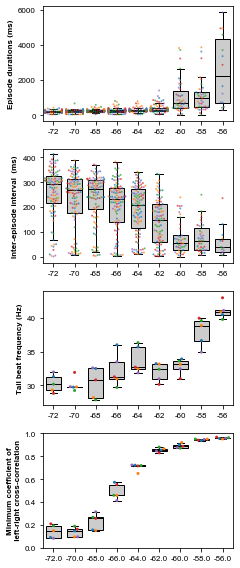

DURATIONS
F_onewayResult(statistic=74.97269762254594, pvalue=2.710497047823205e-88)
dfs_durations =681
EPISODE DURATIONS T-TESTS
Durations t-test between e_gly -72 and _e_gly -70: Ttest_indResult(statistic=-1.1751600832763416, pvalue=0.24130720314038026)
Durations t-test between e_gly -72 and _e_gly -68: Ttest_indResult(statistic=-3.933318881040046, pvalue=0.00011621998332805893)
Durations t-test between e_gly -72 and _e_gly -66: Ttest_indResult(statistic=-3.6234986995647795, pvalue=0.00036856837995113555)
Durations t-test between e_gly -72 and _e_gly -64: Ttest_indResult(statistic=-5.242809941038651, pvalue=3.9887204804875213e-07)
Durations t-test between e_gly -72 and _e_gly -62: Ttest_indResult(statistic=-7.044730860886873, pvalue=3.363489049677699e-11)
Durations t-test between e_gly -72 and _e_gly -60: Ttest_indResult(statistic=-8.66922660415316, pvalue=9.318887056914473e-15)
Durations t-test between e_gly -72 and _e_gly -58: Ttest_indResult(statistic=-9.930783607549174, pvalue=7.2

average_frequency t-test between e_gly -66 and e_gly -64: Ttest_indResult(statistic=-1.0541971554872231, pvalue=0.3225877111874345)
average_frequency t-test between e_gly -66 and e_gly -62: Ttest_indResult(statistic=0.23493799325012413, pvalue=0.8201586949424644)
average_frequency t-test between e_gly -66 and e_gly -60: Ttest_indResult(statistic=-0.4367054403053865, pvalue=0.673872060200803)
average_frequency t-test between e_gly -66 and e_gly -58: Ttest_indResult(statistic=-3.8840914711036345, pvalue=0.004647842998403328)
average_frequency t-test between e_gly -66 and e_gly -56: Ttest_indResult(statistic=-7.098909856311658, pvalue=0.00010210278399948016)
average_frequency t-test between e_gly -64 and e_gly -62: Ttest_indResult(statistic=1.6484777248169538, pvalue=0.13786655396695988)
average_frequency t-test between e_gly -64 and e_gly -60: Ttest_indResult(statistic=0.9342096221131455, pvalue=0.3775315622104427)
average_frequency t-test between e_gly -64 and e_gly -58: Ttest_indResult

'\nDURATIONS\nF_onewayResult(statistic=74.97269762254594, pvalue=2.710497047823205e-88)\ndfs_durations =681\nEPISODE DURATIONS T-TESTS\nDurations t-test between e_gly -72 and _e_gly -70: Ttest_indResult(statistic=-1.1751600832763416, pvalue=0.24130720314038026)\nDurations t-test between e_gly -72 and _e_gly -68: Ttest_indResult(statistic=-3.933318881040046, pvalue=0.00011621998332805893)\nDurations t-test between e_gly -72 and _e_gly -66: Ttest_indResult(statistic=-3.6234986995647795, pvalue=0.00036856837995113555)\nDurations t-test between e_gly -72 and _e_gly -64: Ttest_indResult(statistic=-5.242809941038651, pvalue=3.9887204804875213e-07)\nDurations t-test between e_gly -72 and _e_gly -62: Ttest_indResult(statistic=-7.044730860886873, pvalue=3.363489049677699e-11)\nDurations t-test between e_gly -72 and _e_gly -60: Ttest_indResult(statistic=-8.66922660415316, pvalue=9.318887056914473e-15)\nDurations t-test between e_gly -72 and _e_gly -58: Ttest_indResult(statistic=-9.93078360754917

In [11]:
# Import pandas for data saving
import pandas as pd
import numpy as np
import json
import csv
import scipy.stats as stats
from pylab import *
from Analysis_tools import *
import seaborn as sns

%matplotlib inline

SMALL_SIZE = 10
FONT_STYLE = 'bold'
# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

dt = 0.1

cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

LINELENGTH = 0.5
LINEWIDTH = 1

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

MARKER_SIZE = 3

FONT_STYLE = 'bold'

fig, axes = plt.subplots(4, 1, figsize=(3.5, 8))

file_names = ['./JSONs/Analysis_Beat_and_glide_E_GLY_-72_0.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-72_1.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-72_2.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-72_3.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-72_4.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-70_0.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-70_1.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-70_2.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-70_3.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-70_4.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-68_0.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-68_1.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-68_2.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-68_3.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-68_4.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-66_0.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-66_1.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-66_2.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-66_3.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-66_4.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-64_0.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-64_1.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-64_2.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-64_3.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-64_4.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-62_0.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-62_1.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-62_2.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-62_3.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-62_4.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-60_0.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-60_1.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-60_2.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-60_3.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-60_4.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-58_0.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-58_1.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-58_2.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-58_3.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-58_4.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-56_0.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-56_1.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-56_2.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-56_3.json',
              './JSONs/Analysis_Beat_and_glide_E_GLY_-56_4.json']

somite_index = 9
i = 0

durations_dict=dict()
inter_events_dict = dict()
tail_beat_delays_dict = dict()
average_frequency_dict = dict()
LR_mins_dict = dict()
all_e_gly=[]

durations_df = pd.DataFrame(columns = ["Durations", "E_GLY", "Sim_index"])
inter_events_df = pd.DataFrame(columns = ["Inter_events", "E_GLY", "Sim_index"])
tail_beat_delays_df = pd.DataFrame(columns = ["Tail_beat_delays", "E_GLY", "Sim_index"])
average_frequency_df =  pd.DataFrame(columns = ["Average_frequency", "E_GLY", "Sim_index"])
LR_mins_df = pd.DataFrame(columns = ["LR_mins", "e_gly", "Sim_index"])

for names in file_names:
    
    i=i+1
    
    f = open(names,)
    results = json.load(f)

    sim_index = names[names.find('.j')-1:names.find('.j')]
    
    all_durations = results['Events']['Duration (ms)']
    
    all_inter_events = results['Events']['Inter-event intervals']
    
    all_tail_beat_delays = results['Tail beat delay']['Computed tail beat time delay (ms)']
    
    all_average_frequency = results['Average frequency']['Average frequency (Hz)']
    
    all_LR_mins = results['Left/Right Xcorr min delay']['Computed L/R min']
    
    e_gly_str = names[names.find('.json')-5:names.find('.json')-2]
    e_gly = int(e_gly_str)
        
    if e_gly not in all_e_gly:
        all_e_gly.append(e_gly)
        durations_dict[str(e_gly)] = []
        inter_events_dict[str(e_gly)] = []
        average_frequency_dict[str(e_gly)] = []
        tail_beat_delays_dict[str(e_gly)] = []
        LR_mins_dict[str(e_gly)] = []

    tail_beat_delays_to_add = all_tail_beat_delays[somite_index]
    average_frequency_to_add = all_average_frequency
    LR_mins_to_add = all_LR_mins[somite_index]
    
    durations_dict[e_gly_str].extend(all_durations[1:])
    inter_events_dict[e_gly_str].extend(all_inter_events)
    tail_beat_delays_dict[e_gly_str].append(tail_beat_delays_to_add)
    average_frequency_dict[e_gly_str].append(average_frequency_to_add)
    if LR_mins_to_add < 1.1:
        LR_mins_dict[e_gly_str].append(LR_mins_to_add)
    
    temp_durations = list(zip(all_durations[1:], [e_gly for i in range(1, len(all_durations))], [sim_index for i in range(1, len(all_durations))]))
    temp_durations_df = pd.DataFrame(temp_durations, columns = ["Durations", "E_GLY", "Sim_index"]) 
    durations_df = durations_df.append(temp_durations_df)    
        
    temp_inter_events = list(zip(all_inter_events, [e_gly for i in range(0, len(all_inter_events))], [sim_index for i in range(0, len(all_inter_events))]))
    temp_inter_events_df = pd.DataFrame(temp_inter_events, columns = ["Inter_events", "E_GLY", "Sim_index"]) 
    inter_events_df = inter_events_df.append(temp_inter_events_df)  

    temp_tail_beat_delays = list(zip([tail_beat_delays_to_add], [e_gly] , [sim_index]))
    temp_tail_beat_delays_df = pd.DataFrame(temp_tail_beat_delays, columns = ["Tail_beat_delays", "E_GLY", "Sim_index"]) 
    tail_beat_delays_df = tail_beat_delays_df.append(temp_tail_beat_delays_df)    

    temp_average_frequency = list(zip([average_frequency_to_add], [e_gly] , [sim_index]))
    temp_average_frequency_df = pd.DataFrame(temp_average_frequency, columns = ["Average_frequency", "E_GLY", "Sim_index"]) 
    average_frequency_df = average_frequency_df.append(temp_average_frequency_df)   
    
    if LR_mins_to_add < 1.1:
        temp_LR_mins = list(zip([LR_mins_to_add], [e_gly], [sim_index]))
        temp_LR_mins_df = pd.DataFrame(temp_LR_mins, columns = ["LR_mins", "E_GLY", "Sim_index"]) 
        LR_mins_df = LR_mins_df.append(temp_LR_mins_df)    


sns.swarmplot(ax=axes[0], x="E_GLY", y="Durations", data=durations_df, hue = "Sim_index", size = MARKER_SIZE-1, alpha = 0.7)
sns.swarmplot(ax=axes[1], x="E_GLY", y="Inter_events", data=inter_events_df, hue = "Sim_index", size = MARKER_SIZE-1, alpha = 0.7)
#sns.swarmplot(ax=axes[2], x="E_GLY", y="Tail_beat_delays", data=tail_beat_delays_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)
sns.swarmplot(ax=axes[2], x="E_GLY", y="Average_frequency", data=average_frequency_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)
sns.swarmplot(ax=axes[3], x="E_GLY", y="LR_mins", data=LR_mins_df, hue = "Sim_index", size = MARKER_SIZE, alpha = 1)

WIDTH = 0.7
COLOR = '0.8'
LINEWIDTH = 1

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

sns.boxplot(ax=axes[0], x="E_GLY", y="Durations", data=durations_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[1], x="E_GLY", y="Inter_events", data=inter_events_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
#sns.boxplot(ax=axes[2], x="E_GLY", y="Tail_beat_delays", data=tail_beat_delays_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[2], x="E_GLY", y="Average_frequency", data=average_frequency_df, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False, **PROPS)
sns.boxplot(ax=axes[3], x="E_GLY", y="LR_mins", data=LR_mins_df, width = WIDTH, color=COLOR, linewidth = LINEWIDTH, showfliers = False, **PROPS)

axes[0].set_ylabel("Episode durations (ms)", fontsize = SMALL_SIZE, fontweight=FONT_STYLE)
axes[1].set_ylabel("Inter-episode interval  (ms)", fontsize = SMALL_SIZE, fontweight=FONT_STYLE)
axes[2].set_ylabel("Tail beat frequency (Hz)", fontsize = SMALL_SIZE, fontweight=FONT_STYLE)
axes[3].set_ylabel("Minimum coefficient of\n left-right cross-correlation", fontsize = SMALL_SIZE, fontweight=FONT_STYLE)

axes[3].set_ylim(0, 1)

for ax in axes:
    ax.legend([],[], frameon=False)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()): 
        item.set_fontsize(SMALL_SIZE)
    ax.set_xlabel('')
        
plt.tight_layout()
plt.savefig("E_gly.png", dpi=1000)

plt.show()
# STATISTICAL TESTING

df_durations=[]
df_inter_events=[]
df_tail_beat_delays=[]
df_LR_mins=[]
df_average_frequency = []


dfs_durations = 0
dfs_inter_events=0
dfs_tail_beat_delays = 0
dfs_LR_mins = 0
dfs_average_frequency = 0

for i in all_e_gly:
    df_durations.append(durations_dict[str(i)])
    df_inter_events.append(inter_events_dict[str(i)])
    df_tail_beat_delays.append(tail_beat_delays_dict[str(i)])
    df_LR_mins.append(LR_mins_dict[str(i)])
    df_average_frequency.append(average_frequency_dict[str(i)])

#test durations
print("DURATIONS")
print(stats.f_oneway(*df_durations))

for i in range(0, len(all_e_gly)):
    dfs_durations = dfs_durations + sum(len(df_durations[i]))

dfs_durations = dfs_durations - len(df_durations)
print("dfs_durations =" + str(dfs_durations))

print("EPISODE DURATIONS T-TESTS")
for i in range (0, len(all_e_gly)):
    for j in range (i+1, len(all_e_gly)):
        print("Durations t-test between e_gly " + str(all_e_gly[i]) + " and _e_gly " + str(all_e_gly[j]) + ": "
              + str(stats.ttest_ind(durations_dict[str(all_e_gly[i])], durations_dict[str(all_e_gly[j])])))

print("\n")        

print("INTER-EPISODE INTERVALS")
print(stats.f_oneway(*df_inter_events))

for i in range(0, len(all_e_gly)):
    dfs_inter_events = dfs_inter_events + sum(len(df_inter_events[i]))

dfs_inter_events = dfs_inter_events - len(df_inter_events)

print("dfs_inter_events =" + str(dfs_inter_events))

print("INTER-EPISODE INTERVALS T-TESTS")
for i in range (0, len(all_e_gly)):
    for j in range (i+1, len(all_e_gly)):
        print("inter_events t-test between e_gly " + str(all_e_gly[i]) + " and e_gly " + str(all_e_gly[j]) + ": "
              + str(stats.ttest_ind(inter_events_dict[str(all_e_gly[i])], inter_events_dict[str(all_e_gly[j])])))
print("\n")
        
print("TIME DELAY AT PEAK AUTOCORRELATION")
print(stats.f_oneway(*df_tail_beat_delays))

for i in range(0, len(all_e_gly)):
    dfs_tail_beat_delays = dfs_tail_beat_delays + sum(len(df_tail_beat_delays[i]))

dfs_tail_beat_delays = dfs_tail_beat_delays - len(df_tail_beat_delays)

print("dfs_tail_beat_delays =" + str(dfs_tail_beat_delays))

print("TIME DELAY T-TESTS")
for i in range (0, len(all_e_gly)):
    for j in range (i+1, len(all_e_gly)):
        print("tail_beat_delays t-test between e_gly " + str(all_e_gly[i]) + " and e_gly " + str(all_e_gly[j]) + ": "
              + str(stats.ttest_ind(tail_beat_delays_dict[str(all_e_gly[i])], tail_beat_delays_dict[str(all_e_gly[j])])))

print("\n")
    
print("AVERAGE FREQUENCY")
print(stats.f_oneway(*df_average_frequency))

for i in range(0, len(all_e_gly)):
    dfs_average_frequency = dfs_average_frequency + sum(len(df_average_frequency[i]))

dfs_average_frequency = dfs_average_frequency - len(df_average_frequency)

print("dfs_average_frequency =" + str(dfs_average_frequency))

print("AVERAGE FREQUENCY T-TESTS")
for i in range (0, len(all_e_gly)):
    for j in range (i+1, len(all_e_gly)):
        print("average_frequency t-test between e_gly " + str(all_e_gly[i]) + " and e_gly " + str(all_e_gly[j]) + ": "
              + str(stats.ttest_ind(average_frequency_dict[str(all_e_gly[i])], average_frequency_dict[str(all_e_gly[j])])))

print("\n")
    
print("MINIMUM OF LEFT-RIGHT CROSS-CORRELATION")
print(stats.f_oneway(*df_LR_mins))

for i in range(0, len(all_e_gly)):
    dfs_LR_mins = dfs_LR_mins + sum(len(df_LR_mins[i]))

dfs_LR_mins = dfs_LR_mins - len(df_LR_mins)

print("dfs_LR_mins =" + str(dfs_LR_mins))

print("MINIMUM OF LEFT-RIGHT CROSS-CORRELATION T-TESTS")
for i in range (0, len(all_e_gly)):
    for j in range (i+1, len(all_e_gly)):
        print("LR_mins t-test between e_gly " + str(all_e_gly[i]) + " and e_gly " + str(all_e_gly[j]) + ": "
              + str(stats.ttest_ind(LR_mins_dict[str(all_e_gly[i])], LR_mins_dict[str(all_e_gly[j])])))
        
'''
DURATIONS
F_onewayResult(statistic=74.97269762254594, pvalue=2.710497047823205e-88)
dfs_durations =681
EPISODE DURATIONS T-TESTS
Durations t-test between e_gly -72 and _e_gly -70: Ttest_indResult(statistic=-1.1751600832763416, pvalue=0.24130720314038026)
Durations t-test between e_gly -72 and _e_gly -68: Ttest_indResult(statistic=-3.933318881040046, pvalue=0.00011621998332805893)
Durations t-test between e_gly -72 and _e_gly -66: Ttest_indResult(statistic=-3.6234986995647795, pvalue=0.00036856837995113555)
Durations t-test between e_gly -72 and _e_gly -64: Ttest_indResult(statistic=-5.242809941038651, pvalue=3.9887204804875213e-07)
Durations t-test between e_gly -72 and _e_gly -62: Ttest_indResult(statistic=-7.044730860886873, pvalue=3.363489049677699e-11)
Durations t-test between e_gly -72 and _e_gly -60: Ttest_indResult(statistic=-8.66922660415316, pvalue=9.318887056914473e-15)
Durations t-test between e_gly -72 and _e_gly -58: Ttest_indResult(statistic=-9.930783607549174, pvalue=7.228792006981518e-18)
Durations t-test between e_gly -72 and _e_gly -56: Ttest_indResult(statistic=-12.114996145040273, pvalue=3.7145879916526446e-22)
Durations t-test between e_gly -70 and _e_gly -68: Ttest_indResult(statistic=-2.4720448553419363, pvalue=0.014273584233031671)
Durations t-test between e_gly -70 and _e_gly -66: Ttest_indResult(statistic=-2.637932907501861, pvalue=0.008987576956792082)
Durations t-test between e_gly -70 and _e_gly -64: Ttest_indResult(statistic=-4.02893622185937, pvalue=7.905045196716507e-05)
Durations t-test between e_gly -70 and _e_gly -62: Ttest_indResult(statistic=-6.440666995144641, pvalue=9.325352950354199e-10)
Durations t-test between e_gly -70 and _e_gly -60: Ttest_indResult(statistic=-8.628628809913673, pvalue=1.0434086358558338e-14)
Durations t-test between e_gly -70 and _e_gly -58: Ttest_indResult(statistic=-9.889099119637827, pvalue=7.680712336177114e-18)
Durations t-test between e_gly -70 and _e_gly -56: Ttest_indResult(statistic=-12.197235963072071, pvalue=1.5960845123851297e-22)
Durations t-test between e_gly -68 and _e_gly -66: Ttest_indResult(statistic=-0.7601055545826527, pvalue=0.4481048300199105)
Durations t-test between e_gly -68 and _e_gly -64: Ttest_indResult(statistic=-1.9544650792613854, pvalue=0.05206137160205015)
Durations t-test between e_gly -68 and _e_gly -62: Ttest_indResult(statistic=-5.136764026440574, pvalue=7.053267643354808e-07)
Durations t-test between e_gly -68 and _e_gly -60: Ttest_indResult(statistic=-8.045825913437683, pvalue=3.6393436327581326e-13)
Durations t-test between e_gly -68 and _e_gly -58: Ttest_indResult(statistic=-9.251567300921984, pvalue=4.624728327763751e-16)
Durations t-test between e_gly -68 and _e_gly -56: Ttest_indResult(statistic=-11.643038227490067, pvalue=7.585269228303572e-21)
Durations t-test between e_gly -66 and _e_gly -64: Ttest_indResult(statistic=-0.8970366781711946, pvalue=0.3707724965777387)
Durations t-test between e_gly -66 and _e_gly -62: Ttest_indResult(statistic=-4.328180336298508, pvalue=2.434489727710654e-05)
Durations t-test between e_gly -66 and _e_gly -60: Ttest_indResult(statistic=-7.968787303435953, pvalue=4.896062119261257e-13)
Durations t-test between e_gly -66 and _e_gly -58: Ttest_indResult(statistic=-9.147883518078993, pvalue=6.82028392971735e-16)
Durations t-test between e_gly -66 and _e_gly -56: Ttest_indResult(statistic=-11.70021276575896, pvalue=3.370484787313219e-21)
Durations t-test between e_gly -64 and _e_gly -62: Ttest_indResult(statistic=-3.9066980477538222, pvalue=0.00012998988662732693)
Durations t-test between e_gly -64 and _e_gly -60: Ttest_indResult(statistic=-7.8921731963261585, pvalue=7.274438883139586e-13)
Durations t-test between e_gly -64 and _e_gly -58: Ttest_indResult(statistic=-9.085613026739846, pvalue=9.299377876874605e-16)
Durations t-test between e_gly -64 and _e_gly -56: Ttest_indResult(statistic=-11.728217106611423, pvalue=2.561239767777847e-21)
Durations t-test between e_gly -62 and _e_gly -60: Ttest_indResult(statistic=-6.1414855964130695, pvalue=9.249627774850716e-09)
Durations t-test between e_gly -62 and _e_gly -58: Ttest_indResult(statistic=-7.104128795503972, pvalue=7.699207777286182e-11)
Durations t-test between e_gly -62 and _e_gly -56: Ttest_indResult(statistic=-10.195622680695164, pvalue=3.0041105927237266e-17)
Durations t-test between e_gly -60 and _e_gly -58: Ttest_indResult(statistic=-0.3351434530864832, pvalue=0.738405181075671)
Durations t-test between e_gly -60 and _e_gly -56: Ttest_indResult(statistic=-3.8801237549153114, pvalue=0.0002859811424898715)
Durations t-test between e_gly -58 and _e_gly -56: Ttest_indResult(statistic=-3.7011753827283327, pvalue=0.000526983703187059)


INTER-EPISODE INTERVALS
F_onewayResult(statistic=32.628139420163286, pvalue=1.5205243956295735e-43)
dfs_inter_events =681
INTER-EPISODE INTERVALS T-TESTS
inter_events t-test between e_gly -72 and e_gly -70: Ttest_indResult(statistic=1.8645340889154178, pvalue=0.06369015039171326)
inter_events t-test between e_gly -72 and e_gly -68: Ttest_indResult(statistic=1.6594106407920872, pvalue=0.09863227258230277)
inter_events t-test between e_gly -72 and e_gly -66: Ttest_indResult(statistic=3.6137053730118205, pvalue=0.0003818850460812607)
inter_events t-test between e_gly -72 and e_gly -64: Ttest_indResult(statistic=5.044123853643266, pvalue=1.0157225420684558e-06)
inter_events t-test between e_gly -72 and e_gly -62: Ttest_indResult(statistic=8.309284963309684, pvalue=1.836307729759707e-14)
inter_events t-test between e_gly -72 and e_gly -60: Ttest_indResult(statistic=10.832003262119661, pvalue=2.855702285636212e-20)
inter_events t-test between e_gly -72 and e_gly -58: Ttest_indResult(statistic=10.703719348541073, pvalue=7.701419357498782e-20)
inter_events t-test between e_gly -72 and e_gly -56: Ttest_indResult(statistic=7.172546973538098, pvalue=8.175965181297454e-11)
inter_events t-test between e_gly -70 and e_gly -68: Ttest_indResult(statistic=-0.2570114689797172, pvalue=0.7974354576960988)
inter_events t-test between e_gly -70 and e_gly -66: Ttest_indResult(statistic=1.6217693290856097, pvalue=0.10640484909230344)
inter_events t-test between e_gly -70 and e_gly -64: Ttest_indResult(statistic=2.9633986861855264, pvalue=0.0034043642688621483)
inter_events t-test between e_gly -70 and e_gly -62: Ttest_indResult(statistic=6.101661773059727, pvalue=5.680025874078121e-09)
inter_events t-test between e_gly -70 and e_gly -60: Ttest_indResult(statistic=8.637131310403996, pvalue=9.935212118411574e-15)
inter_events t-test between e_gly -70 and e_gly -58: Ttest_indResult(statistic=8.509701892690416, pvalue=2.3180174512911153e-14)
inter_events t-test between e_gly -70 and e_gly -56: Ttest_indResult(statistic=5.751658112605722, pvalue=7.30449984662234e-08)
inter_events t-test between e_gly -68 and e_gly -66: Ttest_indResult(statistic=1.9434102134871867, pvalue=0.05339864597586614)
inter_events t-test between e_gly -68 and e_gly -64: Ttest_indResult(statistic=3.341487370348524, pvalue=0.0009969699717877621)
inter_events t-test between e_gly -68 and e_gly -62: Ttest_indResult(statistic=6.637649926811244, pvalue=3.4262870380219833e-10)
inter_events t-test between e_gly -68 and e_gly -60: Ttest_indResult(statistic=9.561312803603533, pvalue=6.596469148752944e-17)
inter_events t-test between e_gly -68 and e_gly -58: Ttest_indResult(statistic=9.4669239733696, pvalue=1.3487707958605228e-16)
inter_events t-test between e_gly -68 and e_gly -56: Ttest_indResult(statistic=6.431909760403525, pvalue=3.4454460218702582e-09)
inter_events t-test between e_gly -66 and e_gly -64: Ttest_indResult(statistic=1.3649509546355598, pvalue=0.17379437519046328)
inter_events t-test between e_gly -66 and e_gly -62: Ttest_indResult(statistic=4.683718662519625, pvalue=5.3704005323667145e-06)
inter_events t-test between e_gly -66 and e_gly -60: Ttest_indResult(statistic=7.872934937171632, pvalue=8.34683590028327e-13)
inter_events t-test between e_gly -66 and e_gly -58: Ttest_indResult(statistic=7.790363069530417, pvalue=1.4437794818757325e-12)
inter_events t-test between e_gly -66 and e_gly -56: Ttest_indResult(statistic=5.380721234652213, pvalue=4.063521361163135e-07)
inter_events t-test between e_gly -64 and e_gly -62: Ttest_indResult(statistic=3.405575956713193, pvalue=0.0008055924781936616)
inter_events t-test between e_gly -64 and e_gly -60: Ttest_indResult(statistic=6.960805870628479, pvalue=1.1518551177148979e-10)
inter_events t-test between e_gly -64 and e_gly -58: Ttest_indResult(statistic=6.900529209589061, pvalue=1.682839023743464e-10)
inter_events t-test between e_gly -64 and e_gly -56: Ttest_indResult(statistic=4.858451150690026, pvalue=3.8048340079141516e-06)
inter_events t-test between e_gly -62 and e_gly -60: Ttest_indResult(statistic=4.255737348155833, pvalue=3.957917311798282e-05)
inter_events t-test between e_gly -62 and e_gly -58: Ttest_indResult(statistic=4.253964720628321, pvalue=4.041210699903788e-05)
inter_events t-test between e_gly -62 and e_gly -56: Ttest_indResult(statistic=3.269879957342417, pvalue=0.0014677004027553158)
inter_events t-test between e_gly -60 and e_gly -58: Ttest_indResult(statistic=0.03391663558147686, pvalue=0.9730291767849357)
inter_events t-test between e_gly -60 and e_gly -56: Ttest_indResult(statistic=0.8070712369874912, pvalue=0.4231660681058933)
inter_events t-test between e_gly -58 and e_gly -56: Ttest_indResult(statistic=0.8652364191114997, pvalue=0.39096091048592785)


TIME DELAY AT PEAK AUTOCORRELATION
F_onewayResult(statistic=7.24558907082857, pvalue=1.0905045945886706e-05)
dfs_tail_beat_delays =36
TIME DELAY T-TESTS
tail_beat_delays t-test between e_gly -72 and e_gly -70: Ttest_indResult(statistic=0.9015896304310416, pvalue=0.3936082363775312)
tail_beat_delays t-test between e_gly -72 and e_gly -68: Ttest_indResult(statistic=1.8896669825671804, pvalue=0.09547483964112308)
tail_beat_delays t-test between e_gly -72 and e_gly -66: Ttest_indResult(statistic=1.7643052712815495, pvalue=0.1156856971027646)
tail_beat_delays t-test between e_gly -72 and e_gly -64: Ttest_indResult(statistic=14.816695265213209, pvalue=4.23867723249766e-07)
tail_beat_delays t-test between e_gly -72 and e_gly -62: Ttest_indResult(statistic=15.498632702469841, pvalue=2.989750227430658e-07)
tail_beat_delays t-test between e_gly -72 and e_gly -60: Ttest_indResult(statistic=16.02608808243999, pvalue=2.3047795215610766e-07)
tail_beat_delays t-test between e_gly -72 and e_gly -58: Ttest_indResult(statistic=16.53181034922237, pvalue=1.8094041695898773e-07)
tail_beat_delays t-test between e_gly -72 and e_gly -56: Ttest_indResult(statistic=16.908774969558156, pvalue=1.5176245954524848e-07)
tail_beat_delays t-test between e_gly -70 and e_gly -68: Ttest_indResult(statistic=0.9727781004681277, pvalue=0.3591543129779795)
tail_beat_delays t-test between e_gly -70 and e_gly -66: Ttest_indResult(statistic=0.7122871145353205, pvalue=0.4965319493635626)
tail_beat_delays t-test between e_gly -70 and e_gly -64: Ttest_indResult(statistic=3.4402023850842665, pvalue=0.008821176168850484)
tail_beat_delays t-test between e_gly -70 and e_gly -62: Ttest_indResult(statistic=3.425146147203066, pvalue=0.009019189852511624)
tail_beat_delays t-test between e_gly -70 and e_gly -60: Ttest_indResult(statistic=3.5445117367014602, pvalue=0.007569828105237337)
tail_beat_delays t-test between e_gly -70 and e_gly -58: Ttest_indResult(statistic=3.6775309300703247, pvalue=0.006241327415012682)
tail_beat_delays t-test between e_gly -70 and e_gly -56: Ttest_indResult(statistic=3.780264052734625, pvalue=0.0053861188043670665)
tail_beat_delays t-test between e_gly -68 and e_gly -66: Ttest_indResult(statistic=-0.32318781392823587, pvalue=0.7548389989220905)
tail_beat_delays t-test between e_gly -68 and e_gly -64: Ttest_indResult(statistic=1.3987464429197352, pvalue=0.1994413087087364)
tail_beat_delays t-test between e_gly -68 and e_gly -62: Ttest_indResult(statistic=1.3795317037820656, pvalue=0.20506129644329343)
tail_beat_delays t-test between e_gly -68 and e_gly -60: Ttest_indResult(statistic=1.4691491610539087, pvalue=0.17998574185004818)
tail_beat_delays t-test between e_gly -68 and e_gly -58: Ttest_indResult(statistic=1.569823188019253, pvalue=0.15509625865300394)
tail_beat_delays t-test between e_gly -68 and e_gly -56: Ttest_indResult(statistic=1.6477068281494345, pvalue=0.1380265536272865)
tail_beat_delays t-test between e_gly -66 and e_gly -64: Ttest_indResult(statistic=2.1865738739589804, pvalue=0.060241915954421424)
tail_beat_delays t-test between e_gly -66 and e_gly -62: Ttest_indResult(statistic=2.167127752413338, pvalue=0.06209585780910776)
tail_beat_delays t-test between e_gly -66 and e_gly -60: Ttest_indResult(statistic=2.275538198104012, pvalue=0.052435222393618273)
tail_beat_delays t-test between e_gly -66 and e_gly -58: Ttest_indResult(statistic=2.396941598936592, pvalue=0.04338329550080993)
tail_beat_delays t-test between e_gly -66 and e_gly -56: Ttest_indResult(statistic=2.49079978717902, pvalue=0.03747549144083292)
tail_beat_delays t-test between e_gly -64 and e_gly -62: Ttest_indResult(statistic=-0.2771869669752329, pvalue=0.7886642433498167)
tail_beat_delays t-test between e_gly -64 and e_gly -60: Ttest_indResult(statistic=0.8524111164667595, pvalue=0.4187721169212949)
tail_beat_delays t-test between e_gly -64 and e_gly -58: Ttest_indResult(statistic=2.1726380165726664, pvalue=0.06156488295357309)
tail_beat_delays t-test between e_gly -64 and e_gly -56: Ttest_indResult(statistic=3.198678771443134, pvalue=0.012637417883084534)
tail_beat_delays t-test between e_gly -62 and e_gly -60: Ttest_indResult(statistic=2.691748313278193, pvalue=0.027422266298070132)
tail_beat_delays t-test between e_gly -62 and e_gly -58: Ttest_indResult(statistic=6.240554740633173, pvalue=0.0002482386375316366)
tail_beat_delays t-test between e_gly -62 and e_gly -56: Ttest_indResult(statistic=9.048740202266679, pvalue=1.780948290345517e-05)
tail_beat_delays t-test between e_gly -60 and e_gly -58: Ttest_indResult(statistic=5.806832031807043, pvalue=0.0004020210746358467)
tail_beat_delays t-test between e_gly -60 and e_gly -56: Ttest_indResult(statistic=11.285761872937341, pvalue=3.417292289192694e-06)
tail_beat_delays t-test between e_gly -58 and e_gly -56: Ttest_indResult(statistic=8.913376232498994, pvalue=1.9895666664515535e-05)


AVERAGE FREQUENCY
F_onewayResult(statistic=22.90390772960182, pvalue=6.037682011236757e-12)
dfs_average_frequency =36
AVERAGE FREQUENCY T-TESTS
average_frequency t-test between e_gly -72 and e_gly -70: Ttest_indResult(statistic=0.28682281926621456, pvalue=0.7815363725648282)
average_frequency t-test between e_gly -72 and e_gly -68: Ttest_indResult(statistic=-0.0642496419393477, pvalue=0.9503478806476989)
average_frequency t-test between e_gly -72 and e_gly -66: Ttest_indResult(statistic=-1.559673011889593, pvalue=0.15745702614026758)
average_frequency t-test between e_gly -72 and e_gly -64: Ttest_indResult(statistic=-3.189195711334484, pvalue=0.012818888703190727)
average_frequency t-test between e_gly -72 and e_gly -62: Ttest_indResult(statistic=-1.9581962230059582, pvalue=0.0858972349982873)
average_frequency t-test between e_gly -72 and e_gly -60: Ttest_indResult(statistic=-3.1785846670793076, pvalue=0.01302519377886851)
average_frequency t-test between e_gly -72 and e_gly -58: Ttest_indResult(statistic=-6.808456610133839, pvalue=0.000136640164123576)
average_frequency t-test between e_gly -72 and e_gly -56: Ttest_indResult(statistic=-13.446800180503018, pvalue=8.965098467439835e-07)
average_frequency t-test between e_gly -70 and e_gly -68: Ttest_indResult(statistic=-0.26088784586428954, pvalue=0.800769107030973)
average_frequency t-test between e_gly -70 and e_gly -66: Ttest_indResult(statistic=-1.809192665333633, pvalue=0.10802394647286175)
average_frequency t-test between e_gly -70 and e_gly -64: Ttest_indResult(statistic=-3.5942042300056154, pvalue=0.007041332691265406)
average_frequency t-test between e_gly -70 and e_gly -62: Ttest_indResult(statistic=-2.449652224027219, pvalue=0.039958396743861015)
average_frequency t-test between e_gly -70 and e_gly -60: Ttest_indResult(statistic=-3.9001718372999514, pvalue=0.004543552093650255)
average_frequency t-test between e_gly -70 and e_gly -58: Ttest_indResult(statistic=-7.4020481823091515, pvalue=7.604613236525822e-05)
average_frequency t-test between e_gly -70 and e_gly -56: Ttest_indResult(statistic=-15.437456474480378, pvalue=3.0830152711272336e-07)
average_frequency t-test between e_gly -68 and e_gly -66: Ttest_indResult(statistic=-1.2537711634400492, pvalue=0.24532196263039346)
average_frequency t-test between e_gly -68 and e_gly -64: Ttest_indResult(statistic=-2.4880693872571062, pvalue=0.03763530396281451)
average_frequency t-test between e_gly -68 and e_gly -62: Ttest_indResult(statistic=-1.340960793552459, pvalue=0.21675837865429334)
average_frequency t-test between e_gly -68 and e_gly -60: Ttest_indResult(statistic=-2.124768485899167, pvalue=0.06633101098342124)
average_frequency t-test between e_gly -68 and e_gly -58: Ttest_indResult(statistic=-5.432649107980504, pvalue=0.0006213787559906658)
average_frequency t-test between e_gly -68 and e_gly -56: Ttest_indResult(statistic=-9.266651738387576, pvalue=1.4943932117260107e-05)
average_frequency t-test between e_gly -66 and e_gly -64: Ttest_indResult(statistic=-1.0541971554872231, pvalue=0.3225877111874345)
average_frequency t-test between e_gly -66 and e_gly -62: Ttest_indResult(statistic=0.23493799325012413, pvalue=0.8201586949424644)
average_frequency t-test between e_gly -66 and e_gly -60: Ttest_indResult(statistic=-0.4367054403053865, pvalue=0.673872060200803)
average_frequency t-test between e_gly -66 and e_gly -58: Ttest_indResult(statistic=-3.8840914711036345, pvalue=0.004647842998403328)
average_frequency t-test between e_gly -66 and e_gly -56: Ttest_indResult(statistic=-7.098909856311658, pvalue=0.00010210278399948016)
average_frequency t-test between e_gly -64 and e_gly -62: Ttest_indResult(statistic=1.6484777248169538, pvalue=0.13786655396695988)
average_frequency t-test between e_gly -64 and e_gly -60: Ttest_indResult(statistic=0.9342096221131455, pvalue=0.3775315622104427)
average_frequency t-test between e_gly -64 and e_gly -58: Ttest_indResult(statistic=-3.150136410184813, pvalue=0.013595679269420277)
average_frequency t-test between e_gly -64 and e_gly -56: Ttest_indResult(statistic=-6.812935800949762, pvalue=0.00013601810589915434)
average_frequency t-test between e_gly -62 and e_gly -60: Ttest_indResult(statistic=-1.041085556654797, pvalue=0.32827367538889984)
average_frequency t-test between e_gly -62 and e_gly -58: Ttest_indResult(statistic=-5.281045616421766, pvalue=0.0007452635879954054)
average_frequency t-test between e_gly -62 and e_gly -56: Ttest_indResult(statistic=-11.16174412423943, pvalue=3.7154143682147543e-06)
average_frequency t-test between e_gly -60 and e_gly -58: Ttest_indResult(statistic=-4.745702194368381, pvalue=0.001453256891243755)
average_frequency t-test between e_gly -60 and e_gly -56: Ttest_indResult(statistic=-11.062720313016632, pvalue=3.974394831911533e-06)
average_frequency t-test between e_gly -58 and e_gly -56: Ttest_indResult(statistic=-2.790236732558419, pvalue=0.023549711157340888)

MINIMUM OF LEFT-RIGHT CROSS-CORRELATION
F_onewayResult(statistic=327.7966139813345, pvalue=3.0018409949061167e-31)
dfs_LR_mins =36
MINIMUM OF LEFT-RIGHT CROSS-CORRELATION T-TESTS
LR_mins t-test between e_gly -72 and e_gly -70: Ttest_indResult(statistic=0.22015213683292645, pvalue=0.8312667397227002)
LR_mins t-test between e_gly -72 and e_gly -68: Ttest_indResult(statistic=-2.0327300055163118, pvalue=0.07653239360008184)
LR_mins t-test between e_gly -72 and e_gly -66: Ttest_indResult(statistic=-8.653006500166068, pvalue=2.4719112230049213e-05)
LR_mins t-test between e_gly -72 and e_gly -64: Ttest_indResult(statistic=-19.055826111171317, pvalue=5.955509289900674e-08)
LR_mins t-test between e_gly -72 and e_gly -62: Ttest_indResult(statistic=-26.111968373172424, pvalue=4.968919851875748e-09)
LR_mins t-test between e_gly -72 and e_gly -60: Ttest_indResult(statistic=-27.279368185879264, pvalue=3.514180602620625e-09)
LR_mins t-test between e_gly -72 and e_gly -58: Ttest_indResult(statistic=-30.796961087473736, pvalue=1.3428330968827522e-09)
LR_mins t-test between e_gly -72 and e_gly -56: Ttest_indResult(statistic=-31.291585082829176, pvalue=1.183245086017218e-09)
LR_mins t-test between e_gly -70 and e_gly -68: Ttest_indResult(statistic=-2.444385718279831, pvalue=0.04028796485062275)
LR_mins t-test between e_gly -70 and e_gly -66: Ttest_indResult(statistic=-9.887356012311589, pvalue=9.236728746398041e-06)
LR_mins t-test between e_gly -70 and e_gly -64: Ttest_indResult(statistic=-24.381801311497725, pvalue=8.546528127356463e-09)
LR_mins t-test between e_gly -70 and e_gly -62: Ttest_indResult(statistic=-35.178463684139665, pvalue=4.665820631523149e-10)
LR_mins t-test between e_gly -70 and e_gly -60: Ttest_indResult(statistic=-36.57770991398719, pvalue=3.4210921092045894e-10)
LR_mins t-test between e_gly -70 and e_gly -58: Ttest_indResult(statistic=-43.08179177843895, pvalue=9.292729592580088e-11)
LR_mins t-test between e_gly -70 and e_gly -56: Ttest_indResult(statistic=-43.74968732761862, pvalue=8.22047792638427e-11)
LR_mins t-test between e_gly -68 and e_gly -66: Ttest_indResult(statistic=-5.88120487995234, pvalue=0.0003694985617140281)
LR_mins t-test between e_gly -68 and e_gly -64: Ttest_indResult(statistic=-13.494552649115143, pvalue=8.723828827589275e-07)
LR_mins t-test between e_gly -68 and e_gly -62: Ttest_indResult(statistic=-18.692252849391483, pvalue=6.926666089702838e-08)
LR_mins t-test between e_gly -68 and e_gly -60: Ttest_indResult(statistic=-19.691076534465733, pvalue=4.603913288117465e-08)
LR_mins t-test between e_gly -68 and e_gly -58: Ttest_indResult(statistic=-22.024280901334592, pvalue=1.9073288847103817e-08)
LR_mins t-test between e_gly -68 and e_gly -56: Ttest_indResult(statistic=-22.424356031657528, pvalue=1.654920818161139e-08)
LR_mins t-test between e_gly -66 and e_gly -64: Ttest_indResult(statistic=-6.401745512732246, pvalue=0.00020874410555950368)
LR_mins t-test between e_gly -66 and e_gly -62: Ttest_indResult(statistic=-11.505870626477366, pvalue=2.951767058668405e-06)
LR_mins t-test between e_gly -66 and e_gly -60: Ttest_indResult(statistic=-12.58704814149858, pvalue=1.4885992277437844e-06)
LR_mins t-test between e_gly -66 and e_gly -58: Ttest_indResult(statistic=-14.835555765300025, pvalue=4.1971099307351795e-07)
LR_mins t-test between e_gly -66 and e_gly -56: Ttest_indResult(statistic=-15.262150735735649, pvalue=3.3688547758475364e-07)
LR_mins t-test between e_gly -64 and e_gly -62: Ttest_indResult(statistic=-9.05797948868953, pvalue=1.7676237234076918e-05)
LR_mins t-test between e_gly -64 and e_gly -60: Ttest_indResult(statistic=-11.069734964200057, pvalue=3.955399556540405e-06)
LR_mins t-test between e_gly -64 and e_gly -58: Ttest_indResult(statistic=-16.64464204976396, pvalue=1.7159491375446932e-07)
LR_mins t-test between e_gly -64 and e_gly -56: Ttest_indResult(statistic=-17.53883179071623, pvalue=1.1404154327017212e-07)
LR_mins t-test between e_gly -62 and e_gly -60: Ttest_indResult(statistic=-2.908588443863629, pvalue=0.01963152532270963)
LR_mins t-test between e_gly -62 and e_gly -58: Ttest_indResult(statistic=-10.116075876308404, pvalue=7.78692806011402e-06)
LR_mins t-test between e_gly -62 and e_gly -56: Ttest_indResult(statistic=-11.557028100095646, pvalue=2.85401737830047e-06)
LR_mins t-test between e_gly -60 and e_gly -58: Ttest_indResult(statistic=-5.794209216588917, pvalue=0.0004078473025282747)
LR_mins t-test between e_gly -60 and e_gly -56: Ttest_indResult(statistic=-7.1827351765625, pvalue=9.402483894997803e-05)
LR_mins t-test between e_gly -58 and e_gly -56: Ttest_indResult(statistic=-3.383385905310497, pvalue=0.009593429212818862)
'''

## Displaying cell dynamics in a given model (both left and right) - Not a figure

This block will take the neuron parameters in a particular simulation (parameters listed in a .csv file) and display the response to a step current of all neurons

In [ ]:
# Import pandas for data saving
import pandas as pd
import numpy as np
import json 
from pylab import *
from Analysis_tools import *
from Izhikevich_class import*


names = 'Beat_and_glide_Sim_data_Sensitivity_testing_SigmaP_0pt01_0_parameters.csv'

read_data = pd.read_csv(names)
read_data

    data_top = list(read_data.columns.values.tolist())
    data_top
    
    MN_index = []
    dI6_index = [] 
    V0v_index = []  
    V2a_index = [] 
    V1_index = []
    Muscle_index = []

    for i in range(0, len(data_top)):
        if (data_top[i].find('MN') != -1):
            MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
            nMN = max(MN_index) + 1
        if (data_top[i].find('dI6') != -1):
            dI6_index.append(int(data_top[i][data_top[i].find('dI6')+3:data_top[i].find('dI6')+5]))
            ndI6 = max(dI6_index) + 1
        if (data_top[i].find('V0v') != -1):
            V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
            nV0v = max(V0v_index) + 1
        if (data_top[i].find('V2a') != -1):
            V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
            nV2a = max(V2a_index) + 1
        if (data_top[i].find('V1') != -1):
            V1_index.append(int(data_top[i][data_top[i].find('V1')+2:data_top[i].find('V1')+4]))
            nV1 = max(V1_index) + 1
        if (data_top[i].find('Muscle') != -1):
            Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
            nMuscle = max(Muscle_index) + 1

    read_sim = np.ascontiguousarray(read_data)
    read_sim = np.transpose(read_sim)
    read_sim
    Time = read_sim[0]
    next_start = 1
    next_end = next_start + nMN
    VLMN = read_sim[1:next_end]
    next_start = next_end
    next_end = next_start + nMN
    VRMN = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + ndI6
    VLdI6 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + ndI6
    VRdI6 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV0v
    VLV0v = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV0v
    VRV0v = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV2a
    VLV2a = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV2a
    VRV2a = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV1
    VLV1 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV1
    VRV1 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nMuscle
    VLMuscle = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nMuscle
    VRMuscle = read_sim[next_start:next_end]
    TIME_END = Time[-1]
    TIME_END
    
fig = plt.figure(constrained_layout=False, figsize=(7, 10))

widths = [1 for i in range(0,10)]
heights = [1 for i in range(0,15)]
gs = fig.add_gridspec(nrows=15, ncols=10, width_ratios=widths, height_ratios=heights)

cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

LINELENGTH = 0.5
LINEWIDTH = 0.5

plt.rc('lines', linewidth=LINEWIDTH) 

SMALL_SIZE = 6

FONT_STYLE = 'bold'

# x range for step current response
x_start = 600
x_end = 2400

tmax = 1500
dt = .1
nmax = int(tmax/dt)

### END OF FIGURE SETUP ###

# Plot MN firing responses

for i in range (0, nMN):
 
    nrn = Izhikevich_9P(a=L_MN[i, 0],b=L_MN[i, 1],c=L_MN[i, 2], d=L_MN[i, 3], vmax=L_MN[i, 4], vr=L_MN[i, 5], 
                        vt=L_MN[i, 6], k=L_MN[i, 7], Cm = L_MN[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_MN_firing = fig.add_subplot(gs[i, 0])

    Min_current = 7
    Max_current = 9
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        #res_nrn = nrn.getNextVal(-70., -14., -70.)
        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_MN_firing.plot(Time, V_nrn,   c=cmapRed(0.6))

    #fig_MN_firing.set_ylabel('Vm (mV)', fontsize = SMALL_SIZE, fontweight = FONT_STYLE)
    fig_MN_firing.set_ylim([-70,30])
    fig_MN_firing.spines['top'].set_visible(False)
    fig_MN_firing.spines['right'].set_visible(False)
    fig_MN_firing.spines['bottom'].set_visible(False)
    fig_MN_firing.spines['left'].set_visible(False)
    fig_MN_firing.tick_params(axis='both', which='both', length=0)
    fig_MN_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_MN_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_MN_firing.set_xlim([x_start,x_end])

# Plot Right MN firing responses

for i in range (0, nMN):
 
    nrn = Izhikevich_9P(a=R_MN[i, 0],b=R_MN[i, 1],c=R_MN[i, 2], d=R_MN[i, 3], vmax=R_MN[i, 4], vr=R_MN[i, 5], 
                        vt=R_MN[i, 6], k=R_MN[i, 7], Cm = R_MN[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_MN_firing = fig.add_subplot(gs[i, 1])

    Min_current = 7
    Max_current = 9
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        #res_nrn = nrn.getNextVal(-70., -14., -70.)
        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_MN_firing.plot(Time, V_nrn,   c=cmapRed(0.6))

    fig_MN_firing.set_ylim([-70,30])
    fig_MN_firing.spines['top'].set_visible(False)
    fig_MN_firing.spines['right'].set_visible(False)
    fig_MN_firing.spines['bottom'].set_visible(False)
    fig_MN_firing.spines['left'].set_visible(False)
    fig_MN_firing.tick_params(axis='both', which='both', length=0)
    fig_MN_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_MN_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_MN_firing.set_xlim([x_start,x_end])
    
# Plot dI6 firing responses

for i in range (0, ndI6):
 
    nrn = Izhikevich_9P(a=L_dI6[i, 0],b=L_dI6[i, 1],c=L_dI6[i, 2], d=L_dI6[i, 3], vmax=L_dI6[i, 4], vr=L_dI6[i, 5], 
                        vt=L_dI6[i, 6], k=L_dI6[i, 7], Cm = L_dI6[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_dI6_firing = fig.add_subplot(gs[i, 2])

    Min_current = 3
    Max_current = 5
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        #res_nrn = nrn.getNextVal(-70., -14., -70.)
        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_dI6_firing.plot(Time, V_nrn,   c=cmapGreen(0.6))

    fig_dI6_firing.set_ylim([-70,30])
    fig_dI6_firing.spines['top'].set_visible(False)
    fig_dI6_firing.spines['right'].set_visible(False)
    fig_dI6_firing.spines['bottom'].set_visible(False)
    fig_dI6_firing.spines['left'].set_visible(False)
    fig_dI6_firing.tick_params(axis='both', which='both', length=0)
    fig_dI6_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_dI6_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_dI6_firing.set_xlim([x_start,x_end])

# Plot Right dI6 firing responses

for i in range (0, ndI6):
 
    nrn = Izhikevich_9P(a=R_dI6[i, 0],b=R_dI6[i, 1],c=R_dI6[i, 2], d=R_dI6[i, 3], vmax=R_dI6[i, 4], vr=R_dI6[i, 5], 
                        vt=R_dI6[i, 6], k=R_dI6[i, 7], Cm = R_dI6[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_dI6_firing = fig.add_subplot(gs[i, 3])

    Min_current = 3
    Max_current = 5
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        #res_nrn = nrn.getNextVal(-70., -14., -70.)
        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_dI6_firing.plot(Time, V_nrn,   c=cmapGreen(0.6))

    fig_dI6_firing.set_ylim([-70,30])
    fig_dI6_firing.spines['top'].set_visible(False)
    fig_dI6_firing.spines['right'].set_visible(False)
    fig_dI6_firing.spines['bottom'].set_visible(False)
    fig_dI6_firing.spines['left'].set_visible(False)
    fig_dI6_firing.tick_params(axis='both', which='both', length=0)
    fig_dI6_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_dI6_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_dI6_firing.set_xlim([x_start,x_end])
    
    # Plot V0v firing responses

for i in range (0, nV0v):
 
    nrn = Izhikevich_9P(a=L_V0v[i, 0],b=L_V0v[i, 1],c=L_V0v[i, 2], d=L_V0v[i, 3], vmax=L_V0v[i, 4], vr=L_V0v[i, 5], 
                        vt=L_V0v[i, 6], k=L_V0v[i, 7], Cm = L_V0v[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_V0v_firing = fig.add_subplot(gs[i, 4])

    Min_current = 4
    Max_current = 6
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        #res_nrn = nrn.getNextVal(-70., -14., -70.)
        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_V0v_firing.plot(Time, V_nrn,   c=cmapBlue(0.6))

    fig_V0v_firing.set_ylim([-70,30])
    fig_V0v_firing.spines['top'].set_visible(False)
    fig_V0v_firing.spines['right'].set_visible(False)
    fig_V0v_firing.spines['bottom'].set_visible(False)
    fig_V0v_firing.spines['left'].set_visible(False)
    fig_V0v_firing.tick_params(axis='both', which='both', length=0)
    fig_V0v_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_V0v_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_V0v_firing.set_xlim([x_start,x_end])

# Plot Right V0v firing responses

for i in range (0, nV0v):
 
    nrn = Izhikevich_9P(a=R_V0v[i, 0],b=R_V0v[i, 1],c=R_V0v[i, 2], d=R_V0v[i, 3], vmax=R_V0v[i, 4], vr=R_V0v[i, 5], 
                        vt=R_V0v[i, 6], k=R_V0v[i, 7], Cm = R_V0v[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_V0v_firing = fig.add_subplot(gs[i, 5])

    Min_current = 3
    Max_current = 5
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        #res_nrn = nrn.getNextVal(-70., -14., -70.)
        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_V0v_firing.plot(Time, V_nrn,   c=cmapBlue(0.6))

    fig_V0v_firing.set_ylim([-70,30])
    fig_V0v_firing.spines['top'].set_visible(False)
    fig_V0v_firing.spines['right'].set_visible(False)
    fig_V0v_firing.spines['bottom'].set_visible(False)
    fig_V0v_firing.spines['left'].set_visible(False)
    fig_V0v_firing.tick_params(axis='both', which='both', length=0)
    fig_V0v_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_V0v_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_V0v_firing.set_xlim([x_start,x_end])

# Plot V2a firing responses

for i in range (0, nV2a):
 
    nrn = Izhikevich_9P(a=L_V2a[i, 0],b=L_V2a[i, 1],c=L_V2a[i, 2], d=L_V2a[i, 3], vmax=L_V2a[i, 4], vr=L_V2a[i, 5], 
                        vt=L_V2a[i, 6], k=L_V2a[i, 7], Cm = L_V2a[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_V2a_firing = fig.add_subplot(gs[i, 6])

    Min_current = 3
    Max_current = 5
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_V2a_firing.plot(Time, V_nrn,   c=cmapRedPurple(0.6))

    fig_V2a_firing.set_ylim([-70,30])
    fig_V2a_firing.spines['top'].set_visible(False)
    fig_V2a_firing.spines['right'].set_visible(False)
    fig_V2a_firing.spines['bottom'].set_visible(False)
    fig_V2a_firing.spines['left'].set_visible(False)
    fig_V2a_firing.tick_params(axis='both', which='both', length=0)
    fig_V2a_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_V2a_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_V2a_firing.set_xlim([x_start,x_end])

# Plot Right V2a firing responses

for i in range (0, nV2a):
 
    nrn = Izhikevich_9P(a=R_V2a[i, 0],b=R_V2a[i, 1],c=R_V2a[i, 2], d=R_V2a[i, 3], vmax=R_V2a[i, 4], vr=R_V2a[i, 5], 
                        vt=R_V2a[i, 6], k=R_V2a[i, 7], Cm = R_V2a[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_V2a_firing = fig.add_subplot(gs[i, 7])

    Min_current = 4
    Max_current = 6
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_V2a_firing.plot(Time, V_nrn,   c=cmapRedPurple(0.6))

    fig_V2a_firing.set_ylim([-70,30])
    fig_V2a_firing.spines['top'].set_visible(False)
    fig_V2a_firing.spines['right'].set_visible(False)
    fig_V2a_firing.spines['bottom'].set_visible(False)
    fig_V2a_firing.spines['left'].set_visible(False)
    fig_V2a_firing.tick_params(axis='both', which='both', length=0)
    fig_V2a_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_V2a_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_V2a_firing.set_xlim([x_start,x_end])
    
# Plot V1 firing responses

for i in range (0, nV1):
 
    nrn = Izhikevich_9P(a=L_V1[i, 0],b=L_V1[i, 1],c=L_V1[i, 2], d=L_V1[i, 3], vmax=L_V1[i, 4], vr=L_V1[i, 5], 
                        vt=L_V1[i, 6], k=L_V1[i, 7], Cm = L_V1[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_V1_firing = fig.add_subplot(gs[i, 8])

    Min_current = 3
    Max_current = 5
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_V1_firing.plot(Time, V_nrn,   c=cmapYellow(0.5))

    fig_V1_firing.set_ylim([-70,30])
    fig_V1_firing.spines['top'].set_visible(False)
    fig_V1_firing.spines['right'].set_visible(False)
    fig_V1_firing.spines['bottom'].set_visible(False)
    fig_V1_firing.spines['left'].set_visible(False)
    fig_V1_firing.tick_params(axis='both', which='both', length=0)
    fig_V1_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_V1_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_V1_firing.set_xlim([x_start,x_end])

# Plot Right V1 firing responses

for i in range (0, nV1):
 
    nrn = Izhikevich_9P(a=R_V1[i, 0],b=R_V1[i, 1],c=R_V1[i, 2], d=R_V1[i, 3], vmax=R_V1[i, 4], vr=R_V1[i, 5], 
                        vt=R_V1[i, 6], k=R_V1[i, 7], Cm = R_V1[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_V1_firing = fig.add_subplot(gs[i, 9])

    Min_current = 3
    Max_current = 5
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_V1_firing.plot(Time, V_nrn,   c=cmapYellow(0.5))

    fig_V1_firing.set_ylim([-70,30])
    fig_V1_firing.spines['top'].set_visible(False)
    fig_V1_firing.spines['right'].set_visible(False)
    fig_V1_firing.spines['bottom'].set_visible(False)
    fig_V1_firing.spines['left'].set_visible(False)
    fig_V1_firing.tick_params(axis='both', which='both', length=0)
    fig_V1_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_V1_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_V1_firing.set_xlim([x_start,x_end])
    
plt.subplots_adjust(wspace = 0.01, hspace = 0.01)    
plt.savefig("Firing_profile.png", dpi=1000)

plt.show()

## Displaying cell dynamics in a given model (just left) - Figure 10E

Same as above but just neurons on the left side

In [ ]:
# Import pandas for data saving
import pandas as pd
import numpy as np
import json 
from pylab import *
from Analysis_tools import *
from Izhikevich_class import*


names = 'Beat_and_glide_Sim_data_Sensitivity_testing_SigmaP_0pt01_0_parameters.csv'

read_data = pd.read_csv(names)
read_data

data_top = list(read_data.columns.values.tolist())
data_top

MN_index = []
dI6_index = [] 
V0v_index = []  
V2a_index = [] 
V1_index = []
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('dI6') != -1):
        dI6_index.append(int(data_top[i][data_top[i].find('dI6')+3:data_top[i].find('dI6')+5]))
        ndI6 = max(dI6_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('V1') != -1):
        V1_index.append(int(data_top[i][data_top[i].find('V1')+2:data_top[i].find('V1')+4]))
        nV1 = max(V1_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1

read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nMN
L_MN = read_sim[1:next_end]
next_start = next_end
next_end = next_start + nMN
R_MN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + ndI6
L_dI6 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + ndI6
R_dI6 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
L_V0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
R_V0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
L_V2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
R_V2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV1
L_V1 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV1
R_V1 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
TIME_END = Time[-1]
TIME_END

fig = plt.figure(constrained_layout=False, figsize=(3.75, 8))

widths = [1 for i in range(0,5)]
heights = [1 for i in range(0,15)]
gs = fig.add_gridspec(nrows=15, ncols=5, width_ratios=widths, height_ratios=heights)

cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

LINELENGTH = 0.5
LINEWIDTH = 0.5

plt.rc('lines', linewidth=LINEWIDTH) 

SMALL_SIZE = 6

FONT_STYLE = 'bold'

# x range for step current response
x_start = 800
x_end = 2200

tmax = 1500
dt = .1
nmax = int(tmax/dt)

### END OF FIGURE SETUP ###

# Plot MN firing responses

for i in range (0, nMN):
 
    nrn = Izhikevich_9P(a=L_MN[i, 0],b=L_MN[i, 1],c=L_MN[i, 2], d=L_MN[i, 3], vmax=L_MN[i, 4], vr=L_MN[i, 5], 
                        vt=L_MN[i, 6], k=L_MN[i, 7], Cm = L_MN[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_MN_firing = fig.add_subplot(gs[i, 0])

    Min_current = 7
    Max_current = 9
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_MN_firing.plot(Time, V_nrn,   c=cmapRed(0.6))

    fig_MN_firing.set_ylim([-70,30])
    fig_MN_firing.set_xlim([x_start,x_end])
    fig_MN_firing.spines['top'].set_visible(False)
    fig_MN_firing.spines['right'].set_visible(False)
    fig_MN_firing.spines['bottom'].set_visible(False)
    fig_MN_firing.spines['left'].set_visible(False)
    fig_MN_firing.tick_params(axis='both', which='both', length=0)
    fig_MN_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_MN_firing.set_yticks([i*50 + -50 for i in range(0,0)])

# Plot dI6 firing responses

for i in range (0, ndI6):
 
    nrn = Izhikevich_9P(a=L_dI6[i, 0],b=L_dI6[i, 1],c=L_dI6[i, 2], d=L_dI6[i, 3], vmax=L_dI6[i, 4], vr=L_dI6[i, 5], 
                        vt=L_dI6[i, 6], k=L_dI6[i, 7], Cm = L_dI6[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_dI6_firing = fig.add_subplot(gs[i, 1])

    Min_current = 3
    Max_current = 5
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_dI6_firing.plot(Time, V_nrn,   c=cmapGreen(0.6))

    fig_dI6_firing.set_ylim([-70,30])
    fig_dI6_firing.spines['top'].set_visible(False)
    fig_dI6_firing.spines['right'].set_visible(False)
    fig_dI6_firing.spines['bottom'].set_visible(False)
    fig_dI6_firing.spines['left'].set_visible(False)
    fig_dI6_firing.tick_params(axis='both', which='both', length=0)
    fig_dI6_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_dI6_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_dI6_firing.set_xlim([x_start,x_end])

for i in range (0, nV0v):
 
    nrn = Izhikevich_9P(a=L_V0v[i, 0],b=L_V0v[i, 1],c=L_V0v[i, 2], d=L_V0v[i, 3], vmax=L_V0v[i, 4], vr=L_V0v[i, 5], 
                        vt=L_V0v[i, 6], k=L_V0v[i, 7], Cm = L_V0v[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_V0v_firing = fig.add_subplot(gs[i, 2])

    Min_current = 4
    Max_current = 6
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_V0v_firing.plot(Time, V_nrn,   c=cmapBlue(0.6))

    fig_V0v_firing.set_ylim([-70,30])
    fig_V0v_firing.spines['top'].set_visible(False)
    fig_V0v_firing.spines['right'].set_visible(False)
    fig_V0v_firing.spines['bottom'].set_visible(False)
    fig_V0v_firing.spines['left'].set_visible(False)
    fig_V0v_firing.tick_params(axis='both', which='both', length=0)
    fig_V0v_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_V0v_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_V0v_firing.set_xlim([x_start,x_end])


# Plot V2a firing responses

for i in range (0, nV2a):
 
    nrn = Izhikevich_9P(a=L_V2a[i, 0],b=L_V2a[i, 1],c=L_V2a[i, 2], d=L_V2a[i, 3], vmax=L_V2a[i, 4], vr=L_V2a[i, 5], 
                        vt=L_V2a[i, 6], k=L_V2a[i, 7], Cm = L_V2a[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_V2a_firing = fig.add_subplot(gs[i, 3])

    Min_current = 3
    Max_current = 5
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_V2a_firing.plot(Time, V_nrn,   c=cmapRedPurple(0.6))

    fig_V2a_firing.set_ylim([-70,30])
    fig_V2a_firing.spines['top'].set_visible(False)
    fig_V2a_firing.spines['right'].set_visible(False)
    fig_V2a_firing.spines['bottom'].set_visible(False)
    fig_V2a_firing.spines['left'].set_visible(False)
    fig_V2a_firing.tick_params(axis='both', which='both', length=0)
    fig_V2a_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_V2a_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_V2a_firing.set_xlim([x_start,x_end])

    
# Plot V1 firing responses

for i in range (0, nV1):
 
    nrn = Izhikevich_9P(a=L_V1[i, 0],b=L_V1[i, 1],c=L_V1[i, 2], d=L_V1[i, 3], vmax=L_V1[i, 4], vr=L_V1[i, 5], 
                        vt=L_V1[i, 6], k=L_V1[i, 7], Cm = L_V1[i, 8], dt=dt, x=5.1+1.6,y=-1)

    Time = [dt*t for t in range(nmax)]

    fig_V1_firing = fig.add_subplot(gs[i, 4])

    Min_current = 3
    Max_current = 5
    Current_step = 2
    num_steps = Max_current/Current_step
    # Determine the size of the current steps
    for stim_ in np.arange(Min_current, Max_current, Current_step):

        ## ODE Solving (Time loop)

        res_nrn = nrn.getNextVal(-70., -14, -70.)

        V_nrn = []

        for t in Time:

            if (t>1000)&(t<2000):
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
            else:
                res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

            V_nrn.append(res_nrn[0])

        fig_V1_firing.plot(Time, V_nrn,   c=cmapYellow(0.5))

    fig_V1_firing.set_ylim([-70,30])
    fig_V1_firing.spines['top'].set_visible(False)
    fig_V1_firing.spines['right'].set_visible(False)
    fig_V1_firing.spines['bottom'].set_visible(False)
    fig_V1_firing.spines['left'].set_visible(False)
    fig_V1_firing.tick_params(axis='both', which='both', length=0)
    fig_V1_firing.set_xticks([i*2000 for i in range(0,0)])
    fig_V1_firing.set_yticks([i*50 + -50 for i in range(0,0)])
    fig_V1_firing.set_xlim([x_start,x_end])


plt.subplots_adjust(wspace = 0.0, hspace = 0.0, left = 0.05, right = 0.95, top = 0.95, bottom = 0.05)    
plt.savefig("Firing_profile.png", dpi=1000)

plt.show()

## Mega analysis loop

This block allows you to output .png files that display motoneuron output (in a pre-defined range of time), left-right correlation, and episode start, end, and duration.  Change the list file_names to indicate which simulations (in .csv format) to analyze

In [ ]:

%matplotlib inline

SMALL_SIZE = 10
FONT_STYLE = 'bold'

dt = 0.1

# Import pandas for data saving
import pandas as pd
import numpy as np
from pylab import *
from Analysis_tools import *


file_names = ['Beat_and_glide_SigmaP_0pt01_0.csv',
              '''
              'Beat_and_glide_SigmaP_0pt02_1.csv',
              'Beat_and_glide_SigmaP_0pt02_2.csv',
              'Beat_and_glide_SigmaP_0pt02_3.csv',
              'Beat_and_glide_SigmaP_0pt02_4.csv',
              'Beat_and_glide_SigmaP_0pt02_5.csv',
              'Beat_and_glide_SigmaP_0pt02_6.csv',
              'Beat_and_glide_SigmaP_0pt02_7.csv',
              'Beat_and_glide_SigmaP_0pt02_8.csv',
              'Beat_and_glide_SigmaP_0pt02_9.csv'
              '''
             ]

for names in file_names:

    read_data = pd.read_csv(names)
    read_data

    data_top = list(read_data.columns.values.tolist())
    data_top

    MN_index = []
    dI6_index = [] 
    V0v_index = []  
    V2a_index = [] 
    V1_index = []
    Muscle_index = []

    for i in range(0, len(data_top)):
        if (data_top[i].find('MN') != -1):
            MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
            nMN = max(MN_index) + 1
        if (data_top[i].find('dI6') != -1):
            dI6_index.append(int(data_top[i][data_top[i].find('dI6')+3:data_top[i].find('dI6')+5]))
            ndI6 = max(dI6_index) + 1
        if (data_top[i].find('V0v') != -1):
            V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
            nV0v = max(V0v_index) + 1
        if (data_top[i].find('V2a') != -1):
            V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
            nV2a = max(V2a_index) + 1
        if (data_top[i].find('V1') != -1):
            V1_index.append(int(data_top[i][data_top[i].find('V1')+2:data_top[i].find('V1')+4]))
            nV1 = max(V1_index) + 1
        if (data_top[i].find('Muscle') != -1):
            Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
            nMuscle = max(Muscle_index) + 1

    read_sim = np.ascontiguousarray(read_data)
    read_sim = np.transpose(read_sim)
    read_sim
    Time = read_sim[0]
    next_start = 1
    next_end = next_start + nMN
    VLMN = read_sim[1:next_end]
    next_start = next_end
    next_end = next_start + nMN
    VRMN = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + ndI6
    VLdI6 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + ndI6
    VRdI6 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV0v
    VLV0v = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV0v
    VRV0v = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV2a
    VLV2a = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV2a
    VRV2a = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV1
    VLV1 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nV1
    VRV1 = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nMuscle
    VLMuscle = read_sim[next_start:next_end]
    next_start = next_end
    next_end = next_start + nMuscle
    VRMuscle = read_sim[next_start:next_end]
    TIME_END = Time[-1]
    TIME_END

    cmapL = matplotlib.cm.get_cmap('Blues')
    cmapR = matplotlib.cm.get_cmap('Reds')

    fig = plt.figure(constrained_layout=False, figsize=(15, 25))

    widths = [10,4,0.3]
    heights = [1,1,1,1,1,1,1.5,1.5,1.5,1,1]
    gs = fig.add_gridspec(nrows=11, ncols=3, width_ratios=widths, height_ratios=heights)
    #fig, ax = plt.subplots(10,1, sharex=True, figsize=(15, 25)) 

    cmapGrey = matplotlib.cm.get_cmap('Greys')
    cmapBlue = matplotlib.cm.get_cmap('Blues')
    cmapRed = matplotlib.cm.get_cmap('Reds')
    cmapGreen = matplotlib.cm.get_cmap('Greens')
    cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
    cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
    cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

    LINELENGTH = 0.5
    LINEWIDTH = 1

    SMALL_SIZE = 14
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 20
    STANDARD_FONT_SIZE = 8

    FONT_STYLE = 'bold'

    x_start = 800
    x_end = 2200

    lower_y = -80
    upper_y = 20

    xstart = TIME_END-2000
    xend = TIME_END

    fig_MN_activity = fig.add_subplot(gs[0, :])
    fig_dI6_activity = fig.add_subplot(gs[1, :])
    fig_V0v_activity = fig.add_subplot(gs[2, :])
    fig_V2a_activity = fig.add_subplot(gs[3, :])
    fig_V1_activity = fig.add_subplot(gs[4, :])
    fig_Muscle_activity = fig.add_subplot(gs[5, :])

    nMN = len(VLMN[:,0])

    fig_MN_activity.set_title("Summary for simulation " + names, fontweight=FONT_STYLE, fontsize=BIGGER_SIZE)
    # plotting motoneuron traces
    for k in range (9, 10):
        lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
        lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
    leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE)
    leg.legendHandles[0].set_color('red')
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_MN_activity.set_ylabel('Vm (mV)', fontsize = SMALL_SIZE, fontweight = FONT_STYLE)

    fig_MN_activity.spines['top'].set_visible(False)
    fig_MN_activity.spines['right'].set_visible(False)
    fig_MN_activity.spines['bottom'].set_visible(False)
    fig_MN_activity.spines['left'].set_visible(False)
    fig_MN_activity.tick_params(axis='both', which='both', length=0)
    fig_MN_activity.set_xticks([i*200 for i in range(0,0)])
    fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
    for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
             fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_MN_activity.set_xlim([xstart, xend])
    fig_MN_activity.set_ylim([lower_y, upper_y])

    # plotting dI6
    ndI6 = len(VLdI6[:,0])

    for k in range (0, ndI6):
        lines_left, = fig_dI6_activity.plot(Time, VLdI6[k,:], c=cmapGreen((k+1)/ndI6),linestyle='-') # adding a color gradient, lighter color -> rostrally located
        lines_right, = fig_dI6_activity.plot(Time, VRdI6[k,:], c=cmapGrey((k+1)/ndI6/2), linestyle='-')
    leg=fig_dI6_activity.legend(handles=[lines_left, lines_right], labels=['L dI6s','R dI6s'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE)
    leg.legendHandles[0].set_color('red')
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_dI6_activity.set_ylabel('Vm (mV)', fontsize = SMALL_SIZE, fontweight = FONT_STYLE)
    fig_dI6_activity.set_ylim([lower_y, upper_y])
    fig_dI6_activity.spines['top'].set_visible(False)
    fig_dI6_activity.spines['right'].set_visible(False)
    fig_dI6_activity.spines['bottom'].set_visible(False)
    fig_dI6_activity.spines['left'].set_visible(False)
    fig_dI6_activity.tick_params(axis='both', which='both', length=0)
    fig_dI6_activity.set_xticks([i*200 for i in range(0,0)])
    fig_dI6_activity.set_yticks([i*50 + -50 for i in range(0,2)])
    for item in ([fig_dI6_activity.title, fig_dI6_activity.xaxis.label, fig_dI6_activity.yaxis.label] +
             fig_dI6_activity.get_xticklabels() + fig_dI6_activity.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_dI6_activity.set_xlim([xstart, xend])

    # plotting V0v
    nV0v = len(VLV0v[:,0])

    for k in range (0, nV0v):
        lines_left, = fig_V0v_activity.plot(Time, VLV0v[k,:], c=cmapBlue((k+1)/nV0v),linestyle='-') # adding a color gradient, lighter color -> rostrally located
        lines_right, = fig_V0v_activity.plot(Time, VRV0v[k,:], c=cmapGrey((k+1)/nV0v/2), linestyle='-')
    leg=fig_V0v_activity.legend(handles=[lines_left, lines_right], labels=['L V0vs','R V0vs'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE)
    leg.legendHandles[0].set_color('blue')
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0v_activity.set_ylabel('Vm (mV)', fontsize = SMALL_SIZE, fontweight = FONT_STYLE)
    fig_V0v_activity.set_ylim([lower_y, upper_y])
    fig_V0v_activity.spines['top'].set_visible(False)
    fig_V0v_activity.spines['right'].set_visible(False)
    fig_V0v_activity.spines['bottom'].set_visible(False)
    fig_V0v_activity.spines['left'].set_visible(False)
    fig_V0v_activity.tick_params(axis='both', which='both', length=0)
    fig_V0v_activity.set_xticks([i*200 for i in range(0,0)])
    fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])
    for item in ([fig_V0v_activity.title, fig_V0v_activity.xaxis.label, fig_V0v_activity.yaxis.label] +
             fig_V0v_activity.get_xticklabels() + fig_V0v_activity.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0v_activity.set_xlim([xstart, xend])

    # plotting V2a
    nV2a = len(VLV2a[:,0])

    for k in range (0, nV2a):
        lines_left, = fig_V2a_activity.plot(Time, VLV2a[k,:], c=cmapRedPurple((k+1)/nV2a),linestyle='-') # adding a color gradient, lighter color -> rostrally located
        lines_right, = fig_V2a_activity.plot(Time, VRV2a[k,:], c=cmapGrey((k+1)/nV2a/2), linestyle='-')
    leg=fig_V2a_activity.legend(handles=[lines_left, lines_right], labels=['L V2as','R V2as'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE)
    leg.legendHandles[0].set_color('magenta')
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V2a_activity.set_ylabel('Vm (mV)', fontsize = SMALL_SIZE, fontweight = FONT_STYLE)
    fig_V2a_activity.set_ylim([lower_y, upper_y])
    fig_V2a_activity.spines['top'].set_visible(False)
    fig_V2a_activity.spines['right'].set_visible(False)
    fig_V2a_activity.spines['bottom'].set_visible(False)
    fig_V2a_activity.spines['left'].set_visible(False)
    fig_V2a_activity.tick_params(axis='both', which='both', length=0)
    fig_V2a_activity.set_xticks([i*200 for i in range(0,0)])
    fig_V2a_activity.set_yticks([i*50 + -50 for i in range(0,2)])
    for item in ([fig_V2a_activity.title, fig_V2a_activity.xaxis.label, fig_V2a_activity.yaxis.label] +
             fig_V2a_activity.get_xticklabels() + fig_V2a_activity.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V2a_activity.set_xlim([xstart, xend])

    # plotting V1
    nV1 = len(VLV1[:,0])

    for k in range (0, nV1):
        lines_left, = fig_V1_activity.plot(Time, VLV1[k,:],  c=cmapBrightGreen((((k+1)/nV1)*0.2 + 0.2)),linestyle='-') # adding a color gradient, lighter color -> rostrally located
        lines_right, = fig_V1_activity.plot(Time, VRV1[k,:], c=cmapGrey((k+1)/nV1/2), linestyle='-')
    leg=fig_V1_activity.legend(handles=[lines_left, lines_right], labels=['L V1s','R V1s'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE)
    leg.legendHandles[0].set_color('lime')
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V1_activity.set_ylabel('Vm (mV)', fontsize = SMALL_SIZE, fontweight = FONT_STYLE)
    fig_V1_activity.set_ylim([lower_y, upper_y])
    fig_V1_activity.spines['top'].set_visible(False)
    fig_V1_activity.spines['right'].set_visible(False)
    fig_V1_activity.spines['bottom'].set_visible(False)
    fig_V1_activity.spines['left'].set_visible(False)
    fig_V1_activity.tick_params(axis='both', which='both', length=0)
    fig_V1_activity.set_xticks([i*200 for i in range(0,25)])
    fig_V1_activity.set_yticks([i*50 + -50 for i in range(0,2)])
    for item in ([fig_V1_activity.title, fig_V1_activity.xaxis.label, fig_V1_activity.yaxis.label] +
             fig_V1_activity.get_xticklabels() + fig_V1_activity.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V1_activity.set_xlim([xstart, xend])
    
    # plotting Muscles
    nMuscle = len(VLMuscle[:,0])
       
    for k in range (5, 6):
        lines_left, = fig_Muscle_activity.plot(Time, VLMuscle[k,:],  c=cmapBrightGreen((((k+1)/nMuscle)*0.2 + 0.2)),linestyle='-') # adding a color gradient, lighter color -> rostrally located
        lines_right, = fig_Muscle_activity.plot(Time, VRMuscle[k,:], c=cmapGrey((k+1)/nMuscle/2), linestyle='-')
    leg=fig_Muscle_activity.legend(handles=[lines_left, lines_right], labels=['L Muscles','R Muscles'], loc='upper right', handlelength=LINELENGTH, fontsize = SMALL_SIZE)
    leg.legendHandles[0].set_color('lime')
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_Muscle_activity.set_ylabel('Vm (mV)', fontsize = SMALL_SIZE, fontweight = FONT_STYLE)
    fig_Muscle_activity.set_ylim([0, 10])
    fig_Muscle_activity.spines['top'].set_visible(False)
    fig_Muscle_activity.spines['right'].set_visible(False)
    fig_Muscle_activity.spines['bottom'].set_visible(False)
    fig_Muscle_activity.spines['left'].set_visible(False)
    fig_Muscle_activity.tick_params(axis='both', which='both', length=0)
    fig_Muscle_activity.set_xticks([i*200 for i in range(0,25)])
    fig_Muscle_activity.set_yticks([i*5 for i in range(0,3)])
    for item in ([fig_Muscle_activity.title, fig_Muscle_activity.xaxis.label, fig_Muscle_activity.yaxis.label] +
             fig_Muscle_activity.get_xticklabels() + fig_Muscle_activity.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_Muscle_activity.set_xlim([xstart, xend])
    
    fig_Muscle_activity.set_xlabel('Time (ms)', fontsize = SMALL_SIZE, fontweight = FONT_STYLE)
    

    New_time = Time.tolist()+(-Time).tolist()
    order = np.argsort(New_time)
    New_time= np.asarray(New_time)[order]

    fig_correl = plt.subplot(gs[8,0:2])
    
    #for Somite_index in range (1, nMuscle):
    for Somite_index in range (5, 6):
        res = Xcorr_LR(VLMuscle[Somite_index,:],VRMuscle[Somite_index,:])
        fig_correl.plot(New_time[1:], res, '-k')
    
    right_side = fig_correl.spines["right"]
    top_side = fig_correl.spines["top"]
    right_side.set_visible(False)
    top_side.set_visible(False)
    fig_correl.set_xlabel('Time delay: Tau(ms)')
    fig_correl.set_ylabel('Crosscorelation')
    fig_correl.set_title('Right Somite VS Left somite')
    fig_correl.set_xlim([-50,50])
    fig_correl.set_ylim([0,1])
    
    fig_correl.axhline(y=0.6)
    #ax[8].set_xticks([i*25 - 50 for i in range(0,5)])

    fig_integrated = plt.subplot(gs[9,:])
    fig_durations = plt.subplot(gs[10,:])
    
    from Analysis_tools import *
    Threshold = 0.5
    Start, End, Duration = detect_event(VLMuscle, VRMuscle, Time, Threshold)
    print("Episode start and end times")
    for s,e in zip(Start,End):
        fig_integrated.plot(Time[int(s*10):int(e*10)], VLMuscle[9,int(s*10):int(e*10)])
    
    fig_durations.plot(Start, Duration, 'o',)
    fig_durations.set_ylabel ("Episode duration (ms)")
    
    plt.tight_layout()
    plt.savefig('./Sensitivity_testing_summaries/' + names[15:-4] + '.png', dpi=1000)
    plt.show()
    